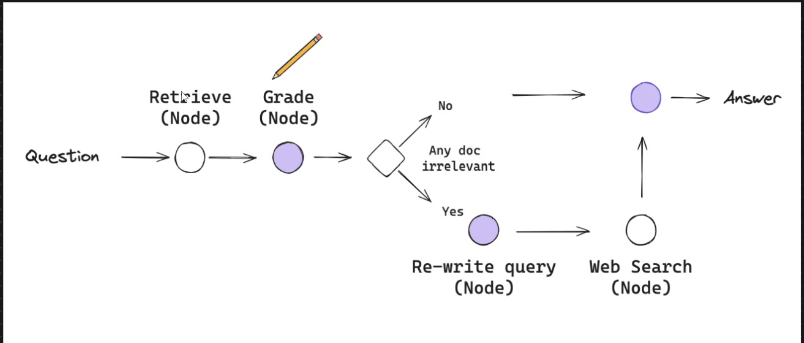

📘 What is Corrective RAG (K-RAG)?

•	✅ Corrective RAG is an advanced type of RAG.

•	✅ It improves accuracy and relevance of answers generated by the LLM.

•	✅ It adds two main mechanisms:

o	🔁 Self-reflection

o	🧪 Self-grading

🧠 Definition (in simple terms)
Corrective RAG, or K-RAG, is a method inside RAG that tries to make the answers more accurate and relevant by checking (grading) the quality of the documents retrieved from the vector database. If the retrieved documents are not good, it takes a corrective action, like rewriting the query or doing a web search.


You are building an intelligent RAG system that:

•	🧠 Retrieves information using a vector database

•	🧐 Grades the documents for relevance

•	🔁 If documents are not relevant, it rewrites the question and performs a web search

•	✅ Finally, it generates an answer
This is an implementation of Corrective RAG using LangGraph (a state machine system for chaining steps like retrieve → grade → correct → generate).


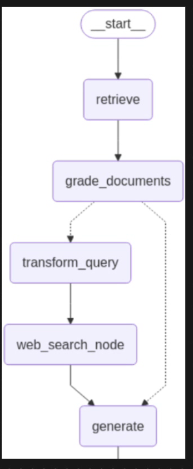

In [21]:
#🛠️ STEP 1: Load Environment Variables
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["TAVILY_API_KEY"]=os.getenv("TABELLAE_API_KEY")
# ✅ Explanation:
# •	Loads your API keys from a .env file.
# •	These are needed to connect to:
# o	OpenAI (for LLM + Embeddings)
# o	Tavily (for Web Search)
# o	Groq (if used for faster LLMs)

#📚 STEP 2: Build the Vector Index
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
# from langchain_openai import OpenAIEmbeddings
from langchain_groq import ChatGroq
# ✅ Explanation:
# You are preparing to:
# •	📄 Load documents from URLs
# •	🔪 Split them into smaller chunks
# •	📦 Store them in a FAISS vector database
# •	🧠 Use OpenAI embeddings to convert text → vectors
embd = ChatGroq(model="llama-3.3-70b-versatile")
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
]
# ✅ Explanation:
# •	You are using 3 high-quality blog posts by Lilian Weng as your knowledge base.
docs = [WebBaseLoader(url).load() for url in urls]
docs
# [[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='\n\n\n\n\n\nLLM Powered Autonomous Agents | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory\n\nTypes of Memory\n\nMaximum Inner Product Search (MIPS)\n\n\nComponent Three: Tool Use\n\nCase Studies\n\nScientific Discovery Agent\n\nGenerative Agents Simulation\n\nProof-of-Concept Examples\n\n\nChallenges\n\nCitation\n\nReferences\n\n\n\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\nOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.\nTree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.\nTask decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.\nAnother quite distinct approach, LLM+P (Liu et al. 2023), involves relying on an external classical planner to do long-horizon planning. This approach utilizes the Planning Domain Definition Language (PDDL) as an intermediate interface to describe the planning problem. In this process, LLM (1) translates the problem into “Problem PDDL”, then (2) requests a classical planner to generate a PDDL plan based on an existing “Domain PDDL”, and finally (3) translates the PDDL plan back into natural language. Essentially, the planning step is outsourced to an external tool, assuming the availability of domain-specific PDDL and a suitable planner which is common in certain robotic setups but not in many other domains.\nSelf-Reflection#\nSelf-reflection is a vital aspect that allows autonomous agents to improve iteratively by refining past action decisions and correcting previous mistakes. It plays a crucial role in real-world tasks where trial and error are inevitable.\nReAct (Yao et al. 2023) integrates reasoning and acting within LLM by extending the action space to be a combination of task-specific discrete actions and the language space. The former enables LLM to interact with the environment (e.g. use Wikipedia search API), while the latter prompting LLM to generate reasoning traces in natural language.\nThe ReAct prompt template incorporates explicit steps for LLM to think, roughly formatted as:\nThought: ...\nAction: ...\nObservation: ...\n... (Repeated many times)\n\n\nExamples of reasoning trajectories for knowledge-intensive tasks (e.g. HotpotQA, FEVER) and decision-making tasks (e.g. AlfWorld Env, WebShop). (Image source: Yao et al. 2023).\n\nIn both experiments on knowledge-intensive tasks and decision-making tasks, ReAct works better than the Act-only baseline where Thought: … step is removed.\nReflexion (Shinn & Labash 2023) is a framework to equip agents with dynamic memory and self-reflection capabilities to improve reasoning skills. Reflexion has a standard RL setup, in which the reward model provides a simple binary reward and the action space follows the setup in ReAct where the task-specific action space is augmented with language to enable complex reasoning steps. After each action $a_t$, the agent computes a heuristic $h_t$ and optionally may decide to reset the environment to start a new trial depending on the self-reflection results.\n\n\nIllustration of the Reflexion framework. (Image source: Shinn & Labash, 2023)\n\nThe heuristic function determines when the trajectory is inefficient or contains hallucination and should be stopped. Inefficient planning refers to trajectories that take too long without success. Hallucination is defined as encountering a sequence of consecutive identical actions that lead to the same observation in the environment.\nSelf-reflection is created by showing two-shot examples to LLM and each example is a pair of (failed trajectory, ideal reflection for guiding future changes in the plan). Then reflections are added into the agent’s working memory, up to three, to be used as context for querying LLM.\n\n\nExperiments on AlfWorld Env and HotpotQA. Hallucination is a more common failure than inefficient planning in AlfWorld. (Image source: Shinn & Labash, 2023)\n\nChain of Hindsight (CoH; Liu et al. 2023) encourages the model to improve on its own outputs by explicitly presenting it with a sequence of past outputs, each annotated with feedback. Human feedback data is a collection of $D_h = \\{(x, y_i , r_i , z_i)\\}_{i=1}^n$, where $x$ is the prompt, each $y_i$ is a model completion, $r_i$ is the human rating of $y_i$, and $z_i$ is the corresponding human-provided hindsight feedback. Assume the feedback tuples are ranked by reward, $r_n \\geq r_{n-1} \\geq \\dots \\geq r_1$ The process is supervised fine-tuning where the data is a sequence in the form of $\\tau_h = (x, z_i, y_i, z_j, y_j, \\dots, z_n, y_n)$, where $\\leq i \\leq j \\leq n$. The model is finetuned to only predict $y_n$ where conditioned on the sequence prefix, such that the model can self-reflect to produce better output based on the feedback sequence. The model can optionally receive multiple rounds of instructions with human annotators at test time.\nTo avoid overfitting, CoH adds a regularization term to maximize the log-likelihood of the pre-training dataset. To avoid shortcutting and copying (because there are many common words in feedback sequences), they randomly mask 0% - 5% of past tokens during training.\nThe training dataset in their experiments is a combination of WebGPT comparisons, summarization from human feedback and human preference dataset.\n\n\nAfter fine-tuning with CoH, the model can follow instructions to produce outputs with incremental improvement in a sequence. (Image source: Liu et al. 2023)\n\nThe idea of CoH is to present a history of sequentially improved outputs  in context and train the model to take on the trend to produce better outputs. Algorithm Distillation (AD; Laskin et al. 2023) applies the same idea to cross-episode trajectories in reinforcement learning tasks, where an algorithm is encapsulated in a long history-conditioned policy. Considering that an agent interacts with the environment many times and in each episode the agent gets a little better, AD concatenates this learning history and feeds that into the model. Hence we should expect the next predicted action to lead to better performance than previous trials. The goal is to learn the process of RL instead of training a task-specific policy itself.\n\n\nIllustration of how Algorithm Distillation (AD) works. (Image source: Laskin et al. 2023).\n\nThe paper hypothesizes that any algorithm that generates a set of learning histories can be distilled into a neural network by performing behavioral cloning over actions. The history data is generated by a set of source policies, each trained for a specific task. At the training stage, during each RL run, a random task is sampled and a subsequence of multi-episode history is used for training, such that the learned policy is task-agnostic.\nIn reality, the model has limited context window length, so episodes should be short enough to construct multi-episode history. Multi-episodic contexts of 2-4 episodes are necessary to learn a near-optimal in-context RL algorithm. The emergence of in-context RL requires long enough context.\nIn comparison with three baselines, including ED (expert distillation, behavior cloning with expert trajectories instead of learning history), source policy (used for generating trajectories for distillation by UCB), RL^2 (Duan et al. 2017; used as upper bound since it needs online RL), AD demonstrates in-context RL with performance getting close to RL^2 despite only using offline RL and learns much faster than other baselines. When conditioned on partial training history of the source policy, AD also improves much faster than ED baseline.\n\n\nComparison of AD, ED, source policy and RL^2 on environments that require memory and exploration. Only binary reward is assigned. The source policies are trained with A3C for "dark" environments and DQN for watermaze.(Image source: Laskin et al. 2023)\n\nComponent Two: Memory#\n(Big thank you to ChatGPT for helping me draft this section. I’ve learned a lot about the human brain and data structure for fast MIPS in my conversations with ChatGPT.)\nTypes of Memory#\nMemory can be defined as the processes used to acquire, store, retain, and later retrieve information. There are several types of memory in human brains.\n\n\nSensory Memory: This is the earliest stage of memory, providing the ability to retain impressions of sensory information (visual, auditory, etc) after the original stimuli have ended. Sensory memory typically only lasts for up to a few seconds. Subcategories include iconic memory (visual), echoic memory (auditory), and haptic memory (touch).\n\n\nShort-Term Memory (STM) or Working Memory: It stores information that we are currently aware of and needed to carry out complex cognitive tasks such as learning and reasoning. Short-term memory is believed to have the capacity of about 7 items (Miller 1956) and lasts for 20-30 seconds.\n\n\nLong-Term Memory (LTM): Long-term memory can store information for a remarkably long time, ranging from a few days to decades, with an essentially unlimited storage capacity. There are two subtypes of LTM:\n\nExplicit / declarative memory: This is memory of facts and events, and refers to those memories that can be consciously recalled, including episodic memory (events and experiences) and semantic memory (facts and concepts).\nImplicit / procedural memory: This type of memory is unconscious and involves skills and routines that are performed automatically, like riding a bike or typing on a keyboard.\n\n\n\n\n\nCategorization of human memory.\n\nWe can roughly consider the following mappings:\n\nSensory memory as learning embedding representations for raw inputs, including text, image or other modalities;\nShort-term memory as in-context learning. It is short and finite, as it is restricted by the finite context window length of Transformer.\nLong-term memory as the external vector store that the agent can attend to at query time, accessible via fast retrieval.\n\nMaximum Inner Product Search (MIPS)#\nThe external memory can alleviate the restriction of finite attention span.  A standard practice is to save the embedding representation of information into a vector store database that can support fast maximum inner-product search (MIPS). To optimize the retrieval speed, the common choice is the approximate nearest neighbors (ANN)\u200b algorithm to return approximately top k nearest neighbors to trade off a little accuracy lost for a huge speedup.\nA couple common choices of ANN algorithms for fast MIPS:\n\nLSH (Locality-Sensitive Hashing): It introduces a hashing function such that similar input items are mapped to the same buckets with high probability, where the number of buckets is much smaller than the number of inputs.\nANNOY (Approximate Nearest Neighbors Oh Yeah): The core data structure are random projection trees, a set of binary trees where each non-leaf node represents a hyperplane splitting the input space into half and each leaf stores one data point. Trees are built independently and at random, so to some extent, it mimics a hashing function. ANNOY search happens in all the trees to iteratively search through the half that is closest to the query and then aggregates the results. The idea is quite related to KD tree but a lot more scalable.\nHNSW (Hierarchical Navigable Small World): It is inspired by the idea of small world networks where most nodes can be reached by any other nodes within a small number of steps; e.g. “six degrees of separation” feature of social networks. HNSW builds hierarchical layers of these small-world graphs, where the bottom layers contain the actual data points. The layers in the middle create shortcuts to speed up search. When performing a search, HNSW starts from a random node in the top layer and navigates towards the target. When it can’t get any closer, it moves down to the next layer, until it reaches the bottom layer. Each move in the upper layers can potentially cover a large distance in the data space, and each move in the lower layers refines the search quality.\nFAISS (Facebook AI Similarity Search): It operates on the assumption that in high dimensional space, distances between nodes follow a Gaussian distribution and thus there should exist clustering of data points. FAISS applies vector quantization by partitioning the vector space into clusters and then refining the quantization within clusters. Search first looks for cluster candidates with coarse quantization and then further looks into each cluster with finer quantization.\nScaNN (Scalable Nearest Neighbors): The main innovation in ScaNN is anisotropic vector quantization. It quantizes a data point $x_i$ to $\\tilde{x}_i$ such that the inner product $\\langle q, x_i \\rangle$ is as similar to the original distance of $\\angle q, \\tilde{x}_i$ as possible, instead of picking the closet quantization centroid points.\n\n\n\nComparison of MIPS algorithms, measured in recall@10. (Image source: Google Blog, 2020)\n\nCheck more MIPS algorithms and performance comparison in ann-benchmarks.com.\nComponent Three: Tool Use#\nTool use is a remarkable and distinguishing characteristic of human beings. We create, modify and utilize external objects to do things that go beyond our physical and cognitive limits. Equipping LLMs with external tools can significantly extend the model capabilities.\n\n\nA picture of a sea otter using rock to crack open a seashell, while floating in the water. While some other animals can use tools, the complexity is not comparable with humans. (Image source: Animals using tools)\n\nMRKL (Karpas et al. 2022), short for “Modular Reasoning, Knowledge and Language”, is a neuro-symbolic architecture for autonomous agents. A MRKL system is proposed to contain a collection of “expert” modules and the general-purpose LLM works as a router to route inquiries to the best suitable expert module. These modules can be neural (e.g. deep learning models) or symbolic (e.g. math calculator, currency converter, weather API).\nThey did an experiment on fine-tuning LLM to call a calculator, using arithmetic as a test case. Their experiments showed that it was harder to solve verbal math problems than explicitly stated math problems because LLMs (7B Jurassic1-large model) failed to extract the right arguments for the basic arithmetic reliably. The results highlight when the external symbolic tools can work reliably, knowing when to and how to use the tools are crucial, determined by the LLM capability.\nBoth TALM (Tool Augmented Language Models; Parisi et al. 2022) and Toolformer (Schick et al. 2023) fine-tune a LM to learn to use external tool APIs. The dataset is expanded based on whether a newly added API call annotation can improve the quality of model outputs. See more details in the “External APIs” section of Prompt Engineering.\nChatGPT Plugins and OpenAI API  function calling are good examples of LLMs augmented with tool use capability working in practice. The collection of tool APIs can be provided by other developers (as in Plugins) or self-defined (as in function calls).\nHuggingGPT (Shen et al. 2023) is a framework to use ChatGPT as the task planner to select models available in HuggingFace platform according to the model descriptions and summarize the response based on the execution results.\n\n\nIllustration of how HuggingGPT works. (Image source: Shen et al. 2023)\n\nThe system comprises of 4 stages:\n(1) Task planning: LLM works as the brain and parses the user requests into multiple tasks. There are four attributes associated with each task: task type, ID, dependencies, and arguments. They use few-shot examples to guide LLM to do task parsing and planning.\nInstruction:\n\nThe AI assistant can parse user input to several tasks: [{"task": task, "id", task_id, "dep": dependency_task_ids, "args": {"text": text, "image": URL, "audio": URL, "video": URL}}]. The "dep" field denotes the id of the previous task which generates a new resource that the current task relies on. A special tag "-task_id" refers to the generated text image, audio and video in the dependency task with id as task_id. The task MUST be selected from the following options: {{ Available Task List }}. There is a logical relationship between tasks, please note their order. If the user input can\'t be parsed, you need to reply empty JSON. Here are several cases for your reference: {{ Demonstrations }}. The chat history is recorded as {{ Chat History }}. From this chat history, you can find the path of the user-mentioned resources for your task planning.\n\n(2) Model selection: LLM distributes the tasks to expert models, where the request is framed as a multiple-choice question. LLM is presented with a list of models to choose from. Due to the limited context length, task type based filtration is needed.\nInstruction:\n\nGiven the user request and the call command, the AI assistant helps the user to select a suitable model from a list of models to process the user request. The AI assistant merely outputs the model id of the most appropriate model. The output must be in a strict JSON format: "id": "id", "reason": "your detail reason for the choice". We have a list of models for you to choose from {{ Candidate Models }}. Please select one model from the list.\n\n(3) Task execution: Expert models execute on the specific tasks and log results.\nInstruction:\n\nWith the input and the inference results, the AI assistant needs to describe the process and results. The previous stages can be formed as - User Input: {{ User Input }}, Task Planning: {{ Tasks }}, Model Selection: {{ Model Assignment }}, Task Execution: {{ Predictions }}. You must first answer the user\'s request in a straightforward manner. Then describe the task process and show your analysis and model inference results to the user in the first person. If inference results contain a file path, must tell the user the complete file path.\n\n(4) Response generation: LLM receives the execution results and provides summarized results to users.\nTo put HuggingGPT into real world usage, a couple challenges need to solve: (1) Efficiency improvement is needed as both LLM inference rounds and interactions with other models slow down the process; (2) It relies on a long context window to communicate over complicated task content; (3) Stability improvement of LLM outputs and external model services.\nAPI-Bank (Li et al. 2023) is a benchmark for evaluating the performance of tool-augmented LLMs. It contains 53 commonly used API tools, a complete tool-augmented LLM workflow, and 264 annotated dialogues that involve 568 API calls. The selection of APIs is quite diverse, including search engines, calculator, calendar queries, smart home control, schedule management, health data management, account authentication workflow and more. Because there are a large number of APIs, LLM first has access to API search engine to find the right API to call and then uses the corresponding documentation to make a call.\n\n\nPseudo code of how LLM makes an API call in API-Bank. (Image source: Li et al. 2023)\n\nIn the API-Bank workflow, LLMs need to make a couple of decisions and at each step we can evaluate how accurate that decision is. Decisions include:\n\nWhether an API call is needed.\nIdentify the right API to call: if not good enough, LLMs need to iteratively modify the API inputs (e.g. deciding search keywords for Search Engine API).\nResponse based on the API results: the model can choose to refine and call again if results are not satisfied.\n\nThis benchmark evaluates the agent’s tool use capabilities at three levels:\n\nLevel-1 evaluates the ability to call the API. Given an API’s description, the model needs to determine whether to call a given API, call it correctly, and respond properly to API returns.\nLevel-2 examines the ability to retrieve the API. The model needs to search for possible APIs that may solve the user’s requirement and learn how to use them by reading documentation.\nLevel-3 assesses the ability to plan API beyond retrieve and call. Given unclear user requests (e.g. schedule group meetings, book flight/hotel/restaurant for a trip), the model may have to conduct multiple API calls to solve it.\n\nCase Studies#\nScientific Discovery Agent#\nChemCrow (Bran et al. 2023) is a domain-specific example in which LLM is augmented with 13 expert-designed tools to accomplish tasks across organic synthesis, drug discovery, and materials design. The workflow, implemented in LangChain, reflects what was previously described in the ReAct and MRKLs and combines CoT reasoning with tools relevant to the tasks:\n\nThe LLM is provided with a list of tool names, descriptions of their utility, and details about the expected input/output.\nIt is then instructed to answer a user-given prompt using the tools provided when necessary. The instruction suggests the model to follow the ReAct format - Thought, Action, Action Input, Observation.\n\nOne interesting observation is that while the LLM-based evaluation concluded that GPT-4 and ChemCrow perform nearly equivalently, human evaluations with experts oriented towards the completion and chemical correctness of the solutions showed that ChemCrow outperforms GPT-4 by a large margin. This indicates a potential problem with using LLM to evaluate its own performance on domains that requires deep expertise. The lack of expertise may cause LLMs not knowing its flaws and thus cannot well judge the correctness of task results.\nBoiko et al. (2023) also looked into LLM-empowered agents for scientific discovery, to handle autonomous design, planning, and performance of complex scientific experiments. This agent can use tools to browse the Internet, read documentation, execute code, call robotics experimentation APIs and leverage other LLMs.\nFor example, when requested to "develop a novel anticancer drug", the model came up with the following reasoning steps:\n\ninquired about current trends in anticancer drug discovery;\nselected a target;\nrequested a scaffold targeting these compounds;\nOnce the compound was identified, the model attempted its synthesis.\n\nThey also discussed the risks, especially with illicit drugs and bioweapons. They developed a test set containing a list of known chemical weapon agents and asked the agent to synthesize them. 4 out of 11 requests (36%) were accepted to obtain a synthesis solution and the agent attempted to consult documentation to execute the procedure. 7 out of 11 were rejected and among these 7 rejected cases, 5 happened after a Web search while 2 were rejected based on prompt only.\nGenerative Agents Simulation#\nGenerative Agents (Park, et al. 2023) is super fun experiment where 25 virtual characters, each controlled by a LLM-powered agent, are living and interacting in a sandbox environment, inspired by The Sims. Generative agents create believable simulacra of human behavior for interactive applications.\nThe design of generative agents combines LLM with memory, planning and reflection mechanisms to enable agents to behave conditioned on past experience, as well as to interact with other agents.\n\nMemory stream: is a long-term memory module (external database) that records a comprehensive list of agents’ experience in natural language.\n\nEach element is an observation, an event directly provided by the agent.\n- Inter-agent communication can trigger new natural language statements.\n\n\nRetrieval model: surfaces the context to inform the agent’s behavior, according to relevance, recency and importance.\n\nRecency: recent events have higher scores\nImportance: distinguish mundane from core memories. Ask LM directly.\nRelevance: based on how related it is to the current situation / query.\n\n\nReflection mechanism: synthesizes memories into higher level inferences over time and guides the agent’s future behavior. They are higher-level summaries of past events (<- note that this is a bit different from self-reflection above)\n\nPrompt LM with 100 most recent observations and to generate 3 most salient high-level questions given a set of observations/statements. Then ask LM to answer those questions.\n\n\nPlanning & Reacting: translate the reflections and the environment information into actions\n\nPlanning is essentially in order to optimize believability at the moment vs in time.\nPrompt template: {Intro of an agent X}. Here is X\'s plan today in broad strokes: 1)\nRelationships between agents and observations of one agent by another are all taken into consideration for planning and reacting.\nEnvironment information is present in a tree structure.\n\n\n\n\n\nThe generative agent architecture. (Image source: Park et al. 2023)\n\nThis fun simulation results in emergent social behavior, such as information diffusion, relationship memory (e.g. two agents continuing the conversation topic) and coordination of social events (e.g. host a party and invite many others).\nProof-of-Concept Examples#\nAutoGPT has drawn a lot of attention into the possibility of setting up autonomous agents with LLM as the main controller. It has quite a lot of reliability issues given the natural language interface, but nevertheless a cool proof-of-concept demo. A lot of code in AutoGPT is about format parsing.\nHere is the system message used by AutoGPT, where {{...}} are user inputs:\nYou are {{ai-name}}, {{user-provided AI bot description}}.\nYour decisions must always be made independently without seeking user assistance. Play to your strengths as an LLM and pursue simple strategies with no legal complications.\n\nGOALS:\n\n1. {{user-provided goal 1}}\n2. {{user-provided goal 2}}\n3. ...\n4. ...\n5. ...\n\nConstraints:\n1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.\n2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.\n3. No user assistance\n4. Exclusively use the commands listed in double quotes e.g. "command name"\n5. Use subprocesses for commands that will not terminate within a few minutes\n\nCommands:\n1. Google Search: "google", args: "input": "<search>"\n2. Browse Website: "browse_website", args: "url": "<url>", "question": "<what_you_want_to_find_on_website>"\n3. Start GPT Agent: "start_agent", args: "name": "<name>", "task": "<short_task_desc>", "prompt": "<prompt>"\n4. Message GPT Agent: "message_agent", args: "key": "<key>", "message": "<message>"\n5. List GPT Agents: "list_agents", args:\n6. Delete GPT Agent: "delete_agent", args: "key": "<key>"\n7. Clone Repository: "clone_repository", args: "repository_url": "<url>", "clone_path": "<directory>"\n8. Write to file: "write_to_file", args: "file": "<file>", "text": "<text>"\n9. Read file: "read_file", args: "file": "<file>"\n10. Append to file: "append_to_file", args: "file": "<file>", "text": "<text>"\n11. Delete file: "delete_file", args: "file": "<file>"\n12. Search Files: "search_files", args: "directory": "<directory>"\n13. Analyze Code: "analyze_code", args: "code": "<full_code_string>"\n14. Get Improved Code: "improve_code", args: "suggestions": "<list_of_suggestions>", "code": "<full_code_string>"\n15. Write Tests: "write_tests", args: "code": "<full_code_string>", "focus": "<list_of_focus_areas>"\n16. Execute Python File: "execute_python_file", args: "file": "<file>"\n17. Generate Image: "generate_image", args: "prompt": "<prompt>"\n18. Send Tweet: "send_tweet", args: "text": "<text>"\n19. Do Nothing: "do_nothing", args:\n20. Task Complete (Shutdown): "task_complete", args: "reason": "<reason>"\n\nResources:\n1. Internet access for searches and information gathering.\n2. Long Term memory management.\n3. GPT-3.5 powered Agents for delegation of simple tasks.\n4. File output.\n\nPerformance Evaluation:\n1. Continuously review and analyze your actions to ensure you are performing to the best of your abilities.\n2. Constructively self-criticize your big-picture behavior constantly.\n3. Reflect on past decisions and strategies to refine your approach.\n4. Every command has a cost, so be smart and efficient. Aim to complete tasks in the least number of steps.\n\nYou should only respond in JSON format as described below\nResponse Format:\n{\n    "thoughts": {\n        "text": "thought",\n        "reasoning": "reasoning",\n        "plan": "- short bulleted\\n- list that conveys\\n- long-term plan",\n        "criticism": "constructive self-criticism",\n        "speak": "thoughts summary to say to user"\n    },\n    "command": {\n        "name": "command name",\n        "args": {\n            "arg name": "value"\n        }\n    }\n}\nEnsure the response can be parsed by Python json.loads\nGPT-Engineer is another project to create a whole repository of code given a task specified in natural language. The GPT-Engineer is instructed to think over a list of smaller components to build and ask for user input to clarify questions as needed.\nHere are a sample conversation for task clarification sent to OpenAI ChatCompletion endpoint used by GPT-Engineer. The user inputs are wrapped in {{user input text}}.\n[\n  {\n    "role": "system",\n    "content": "You will read instructions and not carry them out, only seek to clarify them.\\nSpecifically you will first summarise a list of super short bullets of areas that need clarification.\\nThen you will pick one clarifying question, and wait for an answer from the user.\\n"\n  },\n  {\n    "role": "user",\n    "content": "We are writing {{a Super Mario game in python. MVC components split in separate files. Keyboard control.}}\\n"\n  },\n  {\n    "role": "assistant",\n    "content": "Summary of areas that need clarification:\\n1. Specifics of the Super Mario game (e.g. level design, characters, gameplay mechanics)\\n2. Details about the MVC components (e.g. which components are in each file)\\n3. Keyboard control implementation (e.g. which keys to use, how to handle input)\\n\\nClarifying question:\\nCan you provide more details about the Super Mario game, such as level design, characters, and gameplay mechanics?"\n  },\n  {\n    "role": "user",\n    "content": "{{There are 10 levels in total. The main character is a plumber named Mario, who can walk and jump. It is a classical platform game just like Super Mario. The main character moves from left to right, trying to get to the destination, where there are many obstacles and attacks from enemies in the process.}}\\n\\nIs anything else unclear? If yes, only answer in the form:\\n{remaining unclear areas} remaining questions.\\n{Next question}\\nIf everything is sufficiently clear, only answer \\"Nothing more to clarify.\\"."\n  },\n  {\n    "role": "assistant",\n    "content": "Remaining unclear areas: 2 remaining questions.\\nCan you provide more information about how the MVC components are split into separate files?"\n  },\n  {\n    "role": "user",\n    "content": "{{Make your own assumptions and state them explicitly before starting}}"\n  }\n]\nThen after these clarification, the agent moved into the code writing mode with a different system message.\nSystem message:\n\nYou will get instructions for code to write.\nYou will write a very long answer. Make sure that every detail of the architecture is, in the end, implemented as code.\nMake sure that every detail of the architecture is, in the end, implemented as code.\nThink step by step and reason yourself to the right decisions to make sure we get it right.\nYou will first lay out the names of the core classes, functions, methods that will be necessary, as well as a quick comment on their purpose.\nThen you will output the content of each file including ALL code.\nEach file must strictly follow a markdown code block format, where the following tokens must be replaced such that\nFILENAME is the lowercase file name including the file extension,\nLANG is the markup code block language for the code’s language, and CODE is the code:\nFILENAME\nCODE\nYou will start with the “entrypoint” file, then go to the ones that are imported by that file, and so on.\nPlease note that the code should be fully functional. No placeholders.\nFollow a language and framework appropriate best practice file naming convention.\nMake sure that files contain all imports, types etc. Make sure that code in different files are compatible with each other.\nEnsure to implement all code, if you are unsure, write a plausible implementation.\nInclude module dependency or package manager dependency definition file.\nBefore you finish, double check that all parts of the architecture is present in the files.\nUseful to know:\nYou almost always put different classes in different files.\nFor Python, you always create an appropriate requirements.txt file.\nFor NodeJS, you always create an appropriate package.json file.\nYou always add a comment briefly describing the purpose of the function definition.\nYou try to add comments explaining very complex bits of logic.\nYou always follow the best practices for the requested languages in terms of describing the code written as a defined\npackage/project.\nPython toolbelt preferences:\n\npytest\ndataclasses\n\n\nConversatin samples:\n[\n  {\n    "role": "system",\n    "content": "You will get instructions for code to write.\\nYou will write a very long answer. Make sure that every detail of the architecture is, in the end, implemented as code.\\nMake sure that every detail of the architecture is, in the end, implemented as code.\\n\\nThink step by step and reason yourself to the right decisions to make sure we get it right.\\nYou will first lay out the names of the core classes, functions, methods that will be necessary, as well as a quick comment on their purpose.\\n\\nThen you will output the content of each file including ALL code.\\nEach file must strictly follow a markdown code block format, where the following tokens must be replaced such that\\nFILENAME is the lowercase file name including the file extension,\\nLANG is the markup code block language for the code\'s language, and CODE is the code:\\n\\nFILENAME\\n```LANG\\nCODE\\n```\\n\\nYou will start with the \\"entrypoint\\" file, then go to the ones that are imported by that file, and so on.\\nPlease note that the code should be fully functional. No placeholders.\\n\\nFollow a language and framework appropriate best practice file naming convention.\\nMake sure that files contain all imports, types etc. Make sure that code in different files are compatible with each other.\\nEnsure to implement all code, if you are unsure, write a plausible implementation.\\nInclude module dependency or package manager dependency definition file.\\nBefore you finish, double check that all parts of the architecture is present in the files.\\n\\nUseful to know:\\nYou almost always put different classes in different files.\\nFor Python, you always create an appropriate requirements.txt file.\\nFor NodeJS, you always create an appropriate package.json file.\\nYou always add a comment briefly describing the purpose of the function definition.\\nYou try to add comments explaining very complex bits of logic.\\nYou always follow the best practices for the requested languages in terms of describing the code written as a defined\\npackage/project.\\n\\n\\nPython toolbelt preferences:\\n- pytest\\n- dataclasses\\n"\n  },\n #  … same conversation as earlier, ended with "Make your own assumptions and state them explicitly before starting".\n  {\n    "role": "assistant",\n    "content": "Assumptions:\\n1. Model: The model will contain the game\'s data, such as level information, character states, and enemy positions.\\n2. View: The view will handle the game\'s visuals, including rendering the game objects, backgrounds, and updating the display.\\n3. Controller: The controller will manage user input, such as keyboard controls, and update the model accordingly.\\n\\nWith these assumptions in mind, is there any specific aspect of the keyboard control implementation you would like me to clarify?"\n  },\n  {\n    "role": "user",\n    "content": "Please now remember the steps:\\n\\nThink step by step and reason yourself to the right decisions to make sure we get it right.\\nFirst lay out the names of the core classes, functions, methods that will be necessary, As well as a quick comment on their purpose.\\n\\nThen you will output the content of each file including ALL code.\\nEach file must strictly follow a markdown code block format, where the following tokens must be replaced such that\\nFILENAME is the lowercase file name including the file extension,\\nLANG is the markup code block language for the code\'s language, and CODE is the code:\\n\\nFILENAME\\n```LANG\\nCODE\\n```\\n\\nPlease note that the code should be fully functional. No placeholders.\\n\\nYou will start with the \\"entrypoint\\" file, then go to the ones that are imported by that file, and so on.\\nFollow a language and framework appropriate best practice file naming convention.\\nMake sure that files contain all imports, types etc. The code should be fully functional. Make sure that code in different files are compatible with each other.\\nBefore you finish, double check that all parts of the architecture is present in the files.\\n"\n  }\n]\nChallenges#\nAfter going through key ideas and demos of building LLM-centered agents, I start to see a couple common limitations:\n\n\nFinite context length: The restricted context capacity limits the inclusion of historical information, detailed instructions, API call context, and responses. The design of the system has to work with this limited communication bandwidth, while mechanisms like self-reflection to learn from past mistakes would benefit a lot from long or infinite context windows. Although vector stores and retrieval can provide access to a larger knowledge pool, their representation power is not as powerful as full attention.\n\n\nChallenges in long-term planning and task decomposition: Planning over a lengthy history and effectively exploring the solution space remain challenging. LLMs struggle to adjust plans when faced with unexpected errors, making them less robust compared to humans who learn from trial and error.\n\n\nReliability of natural language interface: Current agent system relies on natural language as an interface between LLMs and external components such as memory and tools. However, the reliability of model outputs is questionable, as LLMs may make formatting errors and occasionally exhibit rebellious behavior (e.g. refuse to follow an instruction). Consequently, much of the agent demo code focuses on parsing model output.\n\n\nCitation#\nCited as:\n\nWeng, Lilian. (Jun 2023). “LLM-powered Autonomous Agents”. Lil’Log. https://lilianweng.github.io/posts/2023-06-23-agent/.\n\nOr\n@article{weng2023agent,\n  title   = "LLM-powered Autonomous Agents",\n  author  = "Weng, Lilian",\n  journal = "lilianweng.github.io",\n  year    = "2023",\n  month   = "Jun",\n  url     = "https://lilianweng.github.io/posts/2023-06-23-agent/"\n}\nReferences#\n[1] Wei et al. “Chain of thought prompting elicits reasoning in large language models.” NeurIPS 2022\n[2] Yao et al. “Tree of Thoughts: Dliberate Problem Solving with Large Language Models.” arXiv preprint arXiv:2305.10601 (2023).\n[3] Liu et al. “Chain of Hindsight Aligns Language Models with Feedback\n“ arXiv preprint arXiv:2302.02676 (2023).\n[4] Liu et al. “LLM+P: Empowering Large Language Models with Optimal Planning Proficiency” arXiv preprint arXiv:2304.11477 (2023).\n[5] Yao et al. “ReAct: Synergizing reasoning and acting in language models.” ICLR 2023.\n[6] Google Blog. “Announcing ScaNN: Efficient Vector Similarity Search” July 28, 2020.\n[7] https://chat.openai.com/share/46ff149e-a4c7-4dd7-a800-fc4a642ea389\n[8] Shinn & Labash. “Reflexion: an autonomous agent with dynamic memory and self-reflection” arXiv preprint arXiv:2303.11366 (2023).\n[9] Laskin et al. “In-context Reinforcement Learning with Algorithm Distillation” ICLR 2023.\n[10] Karpas et al. “MRKL Systems A modular, neuro-symbolic architecture that combines large language models, external knowledge sources and discrete reasoning.” arXiv preprint arXiv:2205.00445 (2022).\n[11] Nakano et al. “Webgpt: Browser-assisted question-answering with human feedback.” arXiv preprint arXiv:2112.09332 (2021).\n[12] Parisi et al. “TALM: Tool Augmented Language Models”\n[13] Schick et al. “Toolformer: Language Models Can Teach Themselves to Use Tools.” arXiv preprint arXiv:2302.04761 (2023).\n[14] Weaviate Blog. Why is Vector Search so fast? Sep 13, 2022.\n[15] Li et al. “API-Bank: A Benchmark for Tool-Augmented LLMs” arXiv preprint arXiv:2304.08244 (2023).\n[16] Shen et al. “HuggingGPT: Solving AI Tasks with ChatGPT and its Friends in HuggingFace” arXiv preprint arXiv:2303.17580 (2023).\n[17] Bran et al. “ChemCrow: Augmenting large-language models with chemistry tools.” arXiv preprint arXiv:2304.05376 (2023).\n[18] Boiko et al. “Emergent autonomous scientific research capabilities of large language models.” arXiv preprint arXiv:2304.05332 (2023).\n[19] Joon Sung Park, et al. “Generative Agents: Interactive Simulacra of Human Behavior.” arXiv preprint arXiv:2304.03442 (2023).\n[20] AutoGPT. https://github.com/Significant-Gravitas/Auto-GPT\n[21] GPT-Engineer. https://github.com/AntonOsika/gpt-engineer\n\n\n\nNlp\nLanguage-Model\nAgent\nSteerability\nPrompting\n\n\n\n« \n\nAdversarial Attacks on LLMs\n\n\n »\n\nPrompt Engineering\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n© 2025 Lil\'Log\n\n        Powered by\n        Hugo &\n        PaperMod\n\n\n\n\n\n\n\n\n\n\n\n\n\n')],
#  [Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/', 'title': "Prompt Engineering | Lil'Log", 'description': 'Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.', 'language': 'en'}, page_content='\n\n\n\n\n\nPrompt Engineering | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      Prompt Engineering\n    \nDate: March 15, 2023  |  Estimated Reading Time: 21 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nBasic Prompting\n\nZero-Shot\n\nFew-shot\n\nTips for Example Selection\n\nTips for Example Ordering\n\n\n\nInstruction Prompting\n\nSelf-Consistency Sampling\n\nChain-of-Thought (CoT)\n\nTypes of CoT prompts\n\nTips and Extensions\n\n\nAutomatic Prompt Design\n\nAugmented Language Models\n\nRetrieval\n\nProgramming Language\n\nExternal APIs\n\n\nCitation\n\nUseful Resources\n\nReferences\n\n\n\n\n\nPrompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.\n[My personal spicy take] In my opinion, some prompt engineering papers are not worthy 8 pages long, since those tricks can be explained in one or a few sentences and the rest is all about benchmarking. An easy-to-use and shared benchmark infrastructure should be more beneficial to the community. Iterative prompting or external tool use would not be trivial to set up. Also non-trivial to align the whole research community to adopt it.\nBasic Prompting#\nZero-shot and few-shot learning are two most basic approaches for prompting the model, pioneered by many LLM papers and commonly used for benchmarking LLM performance.\nZero-Shot#\nZero-shot learning is to simply feed the task text to the model and ask for results.\n(All the sentiment analysis examples are from SST-2)\nText: i\'ll bet the video game is a lot more fun than the film.\nSentiment:\nFew-shot#\nFew-shot learning presents a set of high-quality demonstrations, each consisting of both input and desired output, on the target task. As the model first sees good examples, it can better understand human intention and criteria for what kinds of answers are wanted. Therefore, few-shot learning often leads to better performance than zero-shot. However, it comes at the cost of more token consumption and may hit the context length limit when input and output text are long.\nText: (lawrence bounces) all over the stage, dancing, running, sweating, mopping his face and generally displaying the wacky talent that brought him fame in the first place.\nSentiment: positive\n\nText: despite all evidence to the contrary, this clunker has somehow managed to pose as an actual feature movie, the kind that charges full admission and gets hyped on tv and purports to amuse small children and ostensible adults.\nSentiment: negative\n\nText: for the first time in years, de niro digs deep emotionally, perhaps because he\'s been stirred by the powerful work of his co-stars.\nSentiment: positive\n\nText: i\'ll bet the video game is a lot more fun than the film.\nSentiment:\nMany studies looked into how to construct in-context examples to maximize the performance and observed that choice of prompt format, training examples, and the order of the examples can lead to dramatically different performance, from near random guess to near SoTA.\nZhao et al. (2021) investigated the case of few-shot classification and proposed that several biases with LLM (they use GPT-3 in the experiments) contribute to such high variance: (1) Majority label bias exists if distribution of labels among the examples is unbalanced; (2) Recency bias refers to the tendency where the model may repeat the label at the end; (3) Common token bias indicates that LLM tends to produce common tokens more often than rare tokens. To conquer such bias, they proposed a method to calibrate the label probabilities output by the model to be uniform when the input string is N/A.\nTips for Example Selection#\n\n\nChoose examples that are semantically similar to the test example using $k$-NN clustering in the embedding space (Liu et al., 2021)\n\n\nTo select a diverse and representative set of examples, Su et al. (2022) proposed to use a graph-based approach: (1) First, construct a directed graph $G=(V, E)$ based on the embedding (e.g. by SBERT or other embedding models) cosine similarity between samples, where each node points to its $k$ nearest neighbors; (2) Start with a set of selected samples $\\mathcal{L}=\\emptyset$ and a set of remaining samples $\\mathcal{U}$. Each sample $u \\in \\mathcal{U}$ is scored by $$\n\\text{score}(u) = \\sum_{v \\in \\{v \\mid (u, v) \\in E, v\\in \\mathcal{U}\\}} s(v)\\quad\\text{where }s(v)=\\rho^{- \\vert \\{\\ell \\in \\mathcal{L} \\vert (v, \\ell)\\in E \\}\\vert},\\quad\\rho > 1\n$$ such that $s(v)$ is low if many of $v$’s neighbors are selected and thus the scoring encourages to pick diverse samples.\n\n\nRubin et al. (2022) proposed to train embeddings via contrastive learning specific to one training dataset for in-context learning sample selection.  Given each training pair $(x, y)$, the quality of one example $e_i$ (formatted input-output pair) can be measured by a conditioned probability assigned by LM: $\\text{score}(e_i) = P_\\text{LM}(y \\mid e_i, x)$. We can identify other examples with top-$k$ and bottom-$k$ scores as positive and negative sets of candidates for every training pair and use that for contrastive learning.\n\n\nSome researchers tried Q-Learning to do sample selection. (Zhang et al. 2022)\n\n\nMotivated by uncertainty-based active learning, Diao et al. (2023) suggested to identify examples with high disagreement or entropy among multiple sampling trials. Then annotate these examples to be used in few-shot prompts.\n\n\nTips for Example Ordering#\n\nA general suggestion is to keep the selection of examples diverse, relevant to the test sample and in random order to avoid majority label bias and recency bias.\nIncreasing model sizes or including more training examples does not reduce variance among different permutations of in-context examples. Same order may work well for one model but badly for another. When the validation set is limited, consider choosing the order such that the model does not produce extremely unbalanced predictions or being overconfident about its predictions. (Lu et al. 2022)\n\nInstruction Prompting#\nThe purpose of presenting few-shot examples in the prompt is to explain our intent to the model; in other words, describe the task instruction to the model in the form of demonstrations. However, few-shot can be expensive in terms of token usage and restricts the input length due to limited context length. So, why not just give the instruction directly?\nInstructed LM (e.g. InstructGPT, natural instruction) finetunes a pretrained model with high-quality tuples of (task instruction, input, ground truth output) to make LM better understand user intention and follow instruction. RLHF (Reinforcement Learning from Human Feedback) is a common method to do so. The benefit of instruction following style fine-tuning improves the model to be more aligned with human intention and greatly reduces the cost of communication.\nWhen interacting with instruction models, we should describe the task requirement in details, trying to be specific and precise and avoiding say “not do something” but rather specify what to do.\nPlease label the sentiment towards the movie of the given movie review. The sentiment label should be "positive" or "negative". \nText: i\'ll bet the video game is a lot more fun than the film. \nSentiment:\nExplaining the desired audience is another smart way to give instructions\n\nFor example to produce education materials for kids,\n\nDescribe what is quantum physics to a 6-year-old.\n\nAnd safe content,\n\n... in language that is safe for work.\nIn-context instruction learning (Ye et al. 2023) combines few-shot learning with instruction prompting. It incorporates multiple demonstration examples across different tasks in the prompt, each demonstration consisting of instruction, task input and output. Note that their experiments were only on classification tasks and the instruction prompt contains all label options.\nDefinition: Determine the speaker of the dialogue, "agent" or "customer".\nInput: I have successfully booked your tickets.\nOuput: agent\n\nDefinition: Determine which category the question asks for, "Quantity" or "Location".\nInput: What\'s the oldest building in US?\nOuput: Location\n\nDefinition: Classify the sentiment of the given movie review, "positive" or "negative".\nInput: i\'ll bet the video game is a lot more fun than the film.\nOutput:\nSelf-Consistency Sampling#\nSelf-consistency sampling (Wang et al. 2022a) is to sample multiple outputs with temperature > 0 and then selecting the best one out of these candidates.\nThe criteria for selecting the best candidate can vary from task to task. A general solution is to pick majority vote. For tasks that are easy to validate such as a programming question with unit tests, we can simply run through the interpreter and verify the correctness with unit tests.\nChain-of-Thought (CoT)#\nChain-of-thought (CoT) prompting (Wei et al. 2022) generates a sequence of short sentences to describe reasoning logics step by step, known as reasoning chains or rationales, to eventually lead to the final answer. The benefit of CoT is more pronounced for complicated reasoning tasks, while using large models (e.g. with more than 50B parameters). Simple tasks only benefit slightly from CoT prompting.\nTypes of CoT prompts#\nTwo main types of CoT prompting:\n\nFew-shot CoT. It is to prompt the model with a few demonstrations, each containing manually written (or model-generated) high-quality reasoning chains.\n\n(All the math reasoning examples are from GSM8k)\nQuestion: Tom and Elizabeth have a competition to climb a hill. Elizabeth takes 30 minutes to climb the hill. Tom takes four times as long as Elizabeth does to climb the hill. How many hours does it take Tom to climb up the hill?\nAnswer: It takes Tom 30*4 = <<30*4=120>>120 minutes to climb the hill.\nIt takes Tom 120/60 = <<120/60=2>>2 hours to climb the hill.\nSo the answer is 2.\n===\nQuestion: Jack is a soccer player. He needs to buy two pairs of socks and a pair of soccer shoes. Each pair of socks cost $9.50, and the shoes cost $92. Jack has $40. How much more money does Jack need?\nAnswer: The total cost of two pairs of socks is $9.50 x 2 = $<<9.5*2=19>>19.\nThe total cost of the socks and the shoes is $19 + $92 = $<<19+92=111>>111.\nJack need $111 - $40 = $<<111-40=71>>71 more.\nSo the answer is 71.\n===\nQuestion: Marty has 100 centimeters of ribbon that he must cut into 4 equal parts. Each of the cut parts must be divided into 5 equal parts. How long will each final cut be?\nAnswer:\n\nZero-shot CoT. Use natural language statement like Let\'s think step by step to explicitly encourage the model to first generate reasoning chains and then to prompt with Therefore, the answer is to produce answers (Kojima et al. 2022 ). Or a similar statement Let\'s work this out it a step by step to be sure we have the right answer (Zhou et al. 2022).\n\nQuestion: Marty has 100 centimeters of ribbon that he must cut into 4 equal parts. Each of the cut parts must be divided into 5 equal parts. How long will each final cut be?\nAnswer: Let\'s think step by step.\nTips and Extensions#\n\n\nSelf-consistency sampling can improve reasoning accuracy by sampling a number of diverse answers and then taking the majority vote. (Wang et al. 2022a)\n\n\nAnother approach for ensemble learning is to alter the example order or use model generated rationales to replace human-written ones to introduce randomness during multiple sample trials. Then aggregate model outputs with a majority vote to get final answer. (Wang et al. 2022b)\n\n\nIf training examples are only associated with true answers (easy to verify!) but no rationales, we can follow the STaR (Self-Taught Reasoner; Zelikman et al. 2022) method : (1) Ask LLM to generate reasoning chains and only keep those leading to correct answers; (2) Then fine-tune the model with generated rationales and repeat the process until convergence. Note that higher temperature is more likely to generate incorrect rationales with correct answers. If training examples do not have ground truth answers, maybe consider using majority votes as the “correct” answers.\n\n\nPrompts with demonstrations of higher reasoning complexity can achieve better performance, where complexity is measured by the number of reasoning steps in the chains. When separating reasoning steps, newline \\n symbol works better than step i, period . or semicolon ;. (Fu et al. 2023)\n\n\nComplexity-based consistency is to explicitly prefer complex chains among all the generations by taking majority vote among only top $k$ complex chains. (Fu et al. 2023)\n\n\nLater, Shum et al. (2023) found that in their experiments CoT prompts with only complex examples can improve the accuracy of complex questions, but perform poorly in simple questions; evidence shown on GSM8k.\n\n\nChanging Q: to Question: is found to be helpful. (Fu et al. 2023)\n\n\nYe & Durrett (2022) found that the benefit of including explanations in the prompt is small to moderate for NLP tasks that involve reasoning over text (i.e. QA and NLI) and the effects vary by models. They observed that explanations are more likely to be nonfactual than be inconsistent (i.e. whether explanation entails prediction). Nonfactual explanations most likely lead to incorrect predictions.\n\n\nSelf-Ask (Press et al. 2022) is a method to repeatedly prompt the model to ask following-up questions to construct the thought process iteratively. Follow-up questions can be answered by search engine results. Similarly, IRCoT (Interleaving Retrieval CoT; Trivedi et al. 2022) and ReAct (Reason + Act; Yao et al. 2023) combines iterative CoT prompting with queries to Wikipedia APIs to search for relevant entities and content and then add it back into the context.\n\n\n\n\nHow Self-Ask works with external search queries.(Image source: Press et al. 2022).\n\n\nTree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, essentially creating a tree structure. The search process can be BFS or DFS while each state is evaluated by a classifier (via a prompt) or majority vote.\n\n\n\nHow Self-Ask works with external search queries.(Image source: Yao et al. 2022).\n\nAutomatic Prompt Design#\nPrompt is a sequence of prefix tokens that increase the probability of getting  desired output given input. Therefore we can treat them as trainable parameters and optimize them directly on the embedding space via gradient descent, such as AutoPrompt (Shin et al., 2020, Prefix-Tuning (Li & Liang (2021)), P-tuning (Liu et al. 2021) and Prompt-Tuning (Lester et al. 2021). This section in my “Controllable Neural Text Generation” post has a good coverage of them. The trend from AutoPrompt to Prompt-Tuning is that the setup gets gradually simplified.\nAPE (Automatic Prompt Engineer; Zhou et al. 2022) is a method to search over a pool of model-generated instruction candidates and then filters the candidate set according to a chosen score function to ultimately choose the best candidate with highest score.\n\n\nPrompt LLM to generate instruction candidates based on a small set of demonstrations in the form of input-output pairs. E.g. {{Given desired input-output pairs}}\\n\\nThe instruction is.\n\n\nGiven a dataset of $\\mathcal{D}_\\text{train} = \\{(x, y)\\}$, we would like to find an instruction $\\rho$ such that $\\rho^* = \\arg\\max_\\rho \\mathbb{E}_{(x, y) \\in \\mathcal{D}_\\text{train}} [f(\\rho, x, y)]$, where $f(.)$ is a per-sample score function, such as execution accuracy $\\mathbb{1}[\\text{LM}(.\\vert \\rho, x)=y]$ or log probability: $p_\\text{LM}(y \\mid \\rho, x)$.\n\n\nUse an iterative Monte Carlo search method to improve the best candidates by proposing semantically similar variants via prompts like Generate a variation of the following instruction while keeping the semantic meaning.\\n\\nInput: ...\\n\\nOutput:...\n\n\nTo construct chain-of-thought prompts automatically, Shum et al. (2023) suggested augment-prune-select, a three-step process:\n\nAugment: Generate multiple pseudo-chains of thought given question using few-shot or zero-shot CoT prompts;\nPrune: Prune pseudo chains based on whether generated answers match ground truths.\nSelect: Apply a variance-reduced policy gradient strategy to learn the probability distribution over selected examples, while considering the probability distribution over examples as policy and the validation set accuracy as reward.\n\nZhang et al. (2023) instead adopted clustering techniques to sample questions and then generates chains. They observed that LLMs tend to make certain types of mistakes. One type of errors can be similar in the emebedding space and thus get grouped together. By only sampling one or a few from frequent-error clusters, we can prevent too many wrong demonstrations of one error type and collect a diverse set of examples.\n\nQuestion clustering: Embed questions and run $k$-means for clustering.\nDemonstration selection: Select a set of representative questions from each cluster; i.e. one demonstration from one cluster. Samples in each cluster are sorted by distance to the cluster centroid and those closer to the centroid are selected first.\nRationale generation: Use zero-shot CoT to generate reasoning chains for selected questions and construct few-shot prompt to run inference.\n\nAugmented Language Models#\nA survey on augmented language models by Mialon et al. (2023) has great coverage over multiple categories of language models augmented with reasoning skills and the ability of using external tools. Recommend it.\nRetrieval#\nOften we need to complete tasks that require latest knowledge after the model pretraining time cutoff or internal/private knowledge base. In that case, the model would not know the context if we don’t explicitly provide it in the prompt. Many methods for Open Domain Question Answering depend on first doing retrieval over a knowledge base and then incorporating the retrieved content as part of the prompt. The accuracy of such a process depends on the quality of both retrieval and generation steps.\nLazaridou et al. (2022) studied how to use Google Search for document retrieval to augment LLMs. Given a question $q$, clean text is extracted out of 20 URLs returned by Google, resulting in a set of documents. Because these documents are long, each document is split into paragraphs of 6 sentences, $\\{p\\}$. Paragraphs are ranked by TF-IDF based cosine similarity between evidence paragraphs and the query. Only the most relevant paragraph is used in the prompt to produce an answer $a$.\nFor closed-book QA, each demonstration is formatted as follows to construct few-shot prompts. Swapping the question with the evidence (longer distance between questions and answers) is found to consistently yield lower results across all datasets.\nEvidence: ...\nQuestion: ...\nAnswer: ...\nThe answer probability is computed in three ways:\n\nRAG style, $p(a_i \\mid q) = \\sum_{i=1}^n p_\\text{tf-idf} (p_i \\mid q) \\cdot p_\\text{LM}(a_i \\mid q, p_i)$, where $p_\\text{tf-idf} (p_i \\mid q)$ is the normalized cosine similarities between the TF-IDF passage and question representations.\nNoisy channel inference, $p(a_i\\mid q) = \\frac{p_\\text{LM}(q \\mid a_i, p_i) \\cdot p_\\text{LM}(a_i \\mid p_i)}{p_\\text{LM}(q \\mid p_i)}$\nProduct-of-Experts (PoE), combines all probabilities used above in addition to $p_\\text{LM}(p_i \\mid q)$.\n\nAccording to their experiments on generation and classification tasks, among three answer reranking scores - PoE > Noisy channel > RAG. Among individual probabilities, $p_\\text{LM}(a \\mid q, p_i)$ and $p_\\text{LM}(q \\mid p_i, a)$ are found to be most informative. $p_\\text{LM}(q \\mid p_i, a)$ captures how well the question can be explained by LM given evidence paragraph and answer and can reliably be used for reranking answer candidates.\nOne observation with SituatedQA dataset for questions grounded in different dates is that despite LM (pretraining cutoff is year 2020) has access to latest information via Google Search, its performance on post-2020 questions are still a lot worse than on pre-2020 questions. This suggests the existence of some discrepencies or conflicting parametric between contextual information and model internal knowledge.\nInterestingly it is found to be beneficial even with only “internal retrieval”, that is, to generate knowledge about a topic before answering the question (Liu et al. 2022). First we can use  the following template to extract knowledge:\nGenerate some knowledge about the input. Examples:\n\nInput: What type of water formation is formed by clouds?\nKnowledge: Clouds are made of water vapor.\n\nInput: {question}\nKnowledge:\nAnd then with model-generated knowledge, prompt the LM further to get the answer.\nProgramming Language#\nBoth PAL (Program-aided language models); Gao et al. 2022) and PoT (Program of Thoughts prompting; Chen et al. 2022) ask LLM to generate programming language statements to resolve natural language reasoning problems, hence offloading the solution step to a runtime such as a Python interpreter. Such setup decouples complex computation and reasoning. It relies on a LM with good enough coding skills.\n\n\nComparing CoT and PoT. (Image source: Chen et al. 2022).\n\nExternal APIs#\nTALM (Tool Augmented Language Models; Parisi et al. 2022) is a language model augmented with text-to-text API calls. LM is guided to generate |tool-call and tool input text conditioned on task input text to construct API call requests. When |result shows up, the specified tool API is called and the returned result gets appended to the text sequence. The final output is generated following |output token.\n\n\nThe format of API calls in TALM. (Image source: Parisi et al. 2022).\n\nTALM adopts a self-play approach to iteratively bootstrap the dataset of tool use examples and finetune LM with it. This self-play, defined as a model interacting with a tool API, iteratively expands the dataset based on whether a newly added tool API can improve the model outputs. Same idea is adopted in Toolformer too, described in more details below. The pipeline loosely mimics a RL process where LM is the policy network and it is trained by policy gradient with a binary reward signal.\n\n\nSelf-play iterations help boost the model performance.(Image source: Parisi et al. 2022).\n\nToolformer (Schick et al. 2023) is a LM that can use external tools via simple APIs, which is built in a self-supervised manner and only requires a handful of demonstrations for each API. The toolbox of Toolformer includes:\n\nCalculator to help LM with the lack of precise math skills;\nQ&A system to help with unfaithful content and hallucination;\nSearch engine to provide up-to-date information after pretraining cut off time;\nTranslation system to improve performance on low resource language;\nCalendar to make LM be aware of time progression.\n\n\n\nIllustration of how to build Toolformer.(Image source: Schick et al. 2023).\n\nToolformer is trained as follows:\n\n\nPrompting to annotate potential API calls. Ask a pre-trained LM to annotate a dataset via few-shot learning with API call usage examples. Formatting example:\n\n\nHow dataset is annotated to do API calls.(Image source: Schick et al. 2023).\n\n\n\n- Each API call is represented as a tuple of (API name, corresponding input), $c=(a_c, i_c)$ and its corresponding result is denoted as $r$. The API call sequences with and without results are labeled as follows, respectively:\n\n    <div>\n    $$\n    \\begin{aligned}\n    e(c) &= \\langle\\texttt{API}\\rangle a_c(i_c) \\langle\\texttt{/API}\\rangle \\\\\n    e(c, r) &= \\langle\\texttt{API}\\rangle a_c(i_c) \\to r \\langle\\texttt{/API}\\rangle\n    \\end{aligned}\n    $$\n    </div>\n\n- Sample API calls based on the probabilities $p_\\text{LM}(\\langle\\texttt{API}\\rangle \\mid \\text{prompt}(\\mathbf{x}), \\mathbf{x}_{1:i})$ and select top $k$ candidate positions for doing API calls at position $i$ if the probability is larger than a threshold.\n\n- Then we sample potential API calls from the LM given the sequence $[\\text{prompt}(\\mathbf{x}), x_1, \\dots, x_{i-1}, \\langle\\texttt{API}\\rangle]$ as prefix and $\\langle\\texttt{/API}\\rangle$ as suffix.\n\n\n\nFilter annotations based on whether API calls help model predict future tokens. Use a self-supervised loss to decide which API calls are actually helpful.\n\n\nExecute each API call $c_i$ to get corresponding result $r_i$.\n\n\nCompute weighted cross entropy loss for the LM over tokens $x_i, \\dots, x_n$ when the model is prefixed with the prompt. Two versions are computed, one with API result and the other with empty sequence $\\varepsilon$.\n\n  $$\n  \\begin{aligned}\n  L^+_i &= L_i(e(c_i, r_i)) \\\\\n  L^-_i &= \\min(L_i(\\varepsilon), L_i(e(c_i, \\varepsilon))) \\\\\n  \\end{aligned}\n  $$\n  \nOnly API calls with $L^-_i - L^+_i$ larger than a threshold are kept, meaning that adding this API call and its results help the model predict future tokens.\n\n\n\n\nFine-tune LM on this annotated dataset. The new training sequences are constructed as $\\mathbf{x}^* = x_{1:i-1}, e(c_i, r_i), x_{i:n}$ . The training data is a combination of the original dataset (e.g. a subset of CCNet, as in the paper) and its augmented version.\n\n\nAt inference time, decoding runs until the model produces “$\\to$ " token, indicating that it is expecting response from an API call next.\nToolformer currently does not support tool use in a chain (i.e. using the output of one tool as an input for another tool) or in an interactive way (i.e. adopt API response after human selection). Both are interesting future directions to expand the model for.\nCitation#\nCited as:\n\nWeng, Lilian. (Mar 2023). Prompt Engineering. Lil’Log. https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/.\n\nOr\n@article{weng2023prompt,\n  title   = "Prompt Engineering",\n  author  = "Weng, Lilian",\n  journal = "lilianweng.github.io",\n  year    = "2023",\n  month   = "Mar",\n  url     = "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/"\n}\nUseful Resources#\n\nOpenAI Cookbook has many in-depth examples for how to utilize LLM efficiently.\nLangChain, a library for combining language models with other components to build applications.\nPrompt Engineering Guide repo contains a pretty comprehensive collection of education materials on prompt engineering.\nlearnprompting.org\nPromptPerfect\nSemantic Kernel\n\nReferences#\n[1] Zhao et al. “Calibrate Before Use: Improving Few-shot Performance of Language Models.” ICML 2021\n[2] Liu et al. “What Makes Good In-Context Examples for GPT-3?” arXiv preprint arXiv:2101.06804 (2021).\n[3] Lu et al. “Fantastically Ordered Prompts and Where to Find Them: Overcoming Few-Shot Prompt Order Sensitivity.” ACL 2022\n[4] Ye et al. “In-Context Instruction Learning.” arXiv preprint arXiv:2302.14691 (2023).\n[5] Su et al. “Selective annotation makes language models better few-shot learners.” arXiv preprint arXiv:2209.01975 (2022).\n[6] Rubin et al. “Learning to retrieve prompts for in-context learning.” NAACL-HLT 2022\n[7] Wei et al. “Chain of thought prompting elicits reasoning in large language models.” NeurIPS 2022\n[8] Wang et al. “Self-Consistency Improves Chain of Thought Reasoning in Language Models.” ICLR 2023.\n[9] Diao et al. “Active Prompting with Chain-of-Thought for Large Language Models.” arXiv preprint arXiv:2302.12246 (2023).\n[10] Zelikman et al. “STaR: Bootstrapping Reasoning With Reasoning.” arXiv preprint arXiv:2203.14465 (2022).\n[11] Ye & Durrett. “The unreliability of explanations in few-shot in-context learning.” arXiv preprint arXiv:2205.03401 (2022).\n[12] Trivedi et al. “Interleaving retrieval with chain-of-thought reasoning for knowledge-intensive multi-step questions.” arXiv preprint arXiv:2212.10509 (2022).\n[13] Press et al. “Measuring and narrowing the compositionality gap in language models.” arXiv preprint arXiv:2210.03350 (2022).\n[14] Yao et al. “ReAct: Synergizing reasoning and acting in language models.” ICLR 2023.\n[15] Fu et al. “Complexity-based prompting for multi-step reasoning.” arXiv preprint arXiv:2210.00720 (2022).\n[16] Wang et al. “Rationale-augmented ensembles in language models.” arXiv preprint arXiv:2207.00747 (2022).\n[17] Zhang et al. “Automatic chain of thought prompting in large language models.” arXiv preprint arXiv:2210.03493 (2022).\n[18] Shum et al. “Automatic Prompt Augmentation and Selection with Chain-of-Thought from Labeled Data.” arXiv preprint arXiv:2302.12822 (2023).\n[19] Zhou et al. “Large Language Models Are Human-Level Prompt Engineers.” ICLR 2023.\n[20] Lazaridou et al. “Internet augmented language models through few-shot prompting for open-domain question answering.” arXiv preprint arXiv:2203.05115 (2022).\n[21] Chen et al. “Program of Thoughts Prompting: Disentangling Computation from Reasoning for Numerical Reasoning Tasks.” arXiv preprint arXiv:2211.12588 (2022).\n[22] Gao et al. “PAL: Program-aided language models.” arXiv preprint arXiv:2211.10435 (2022).\n[23] Parisi et al. “TALM: Tool Augmented Language Models” arXiv preprint arXiv:2205.12255 (2022).\n[24] Schick et al. “Toolformer: Language Models Can Teach Themselves to Use Tools.” arXiv preprint arXiv:2302.04761 (2023).\n[25] Mialon et al. “Augmented Language Models: a Survey” arXiv preprint arXiv:2302.07842 (2023).\n[26] Yao et al. “Tree of Thoughts: Deliberate Problem Solving with Large Language Models.” arXiv preprint arXiv:2305.10601 (2023).\n\n\n\nNlp\nLanguage-Model\nAlignment\nSteerability\nPrompting\n\n\n\n« \n\nLLM Powered Autonomous Agents\n\n\n »\n\nThe Transformer Family Version 2.0\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n© 2025 Lil\'Log\n\n        Powered by\n        Hugo &\n        PaperMod\n\n\n\n\n\n\n\n\n\n\n\n\n\n')],
#  [Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/', 'title': "Adversarial Attacks on LLMs | Lil'Log", 'description': 'The use of large language models in the real world has strongly accelerated by the launch of ChatGPT. We (including my team at OpenAI, shoutout to them) have invested a lot of effort to build default safe behavior into the model during the alignment process (e.g. via RLHF). However, adversarial attacks or jailbreak prompts could potentially trigger the model to output something undesired.\nA large body of ground work on adversarial attacks is on images, and differently it operates in the continuous, high-dimensional space. Attacks for discrete data like text have been considered to be a lot more challenging, due to lack of direct gradient signals. My past post on Controllable Text Generation is quite relevant to this topic, as attacking LLMs is essentially to control the model to output a certain type of (unsafe) content.', 'language': 'en'}, page_content='\n\n\n\n\n\nAdversarial Attacks on LLMs | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      Adversarial Attacks on LLMs\n    \nDate: October 25, 2023  |  Estimated Reading Time: 33 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nBasics\n\nThreat Model\n\nClassification\n\nText Generation\n\nWhite-box vs Black-box\n\n\n\nTypes of Adversarial Attacks\n\nToken Manipulation\n\nGradient based Attacks\n\nJailbreak Prompting\n\nHumans in the Loop Red-teaming\n\nModel Red-teaming\n\n\nPeek into Mitigation\n\nSaddle Point Problem\n\nSome work on LLM Robustness\n\n\nCitation\n\nReferences\n\n\n\n\n\nThe use of large language models in the real world has strongly accelerated by the launch of ChatGPT. We (including my team at OpenAI, shoutout to them) have invested a lot of effort to build default safe behavior into the model during the alignment process (e.g. via RLHF). However, adversarial attacks or jailbreak prompts could potentially trigger the model to output something undesired.\nA large body of ground work on adversarial attacks is on images, and differently it operates in the continuous, high-dimensional space. Attacks for discrete data like text have been considered to be a lot more challenging, due to lack of direct gradient signals. My past post on Controllable Text Generation is quite relevant to this topic, as attacking LLMs is essentially to control the model to output a certain type of (unsafe) content.\nThere is also a branch of work on attacking LLMs to extract pre-training data, private knowledge (Carlini et al, 2020) or attacking model training process via data poisoning (Carlini et al. 2023). We would not cover those topics in this post.\nBasics#\nThreat Model#\nAdversarial attacks are inputs that trigger the model to output something undesired. Much early literature focused on classification tasks, while recent effort starts to investigate more into outputs of generative models. In the context of large language models In this post we assume the attacks only happen at inference time, meaning that model weights are fixed.\n\n\nAn overview of threats to LLM-based applications. (Image source: Greshake et al. 2023)\n\nClassification#\nAdversarial attacks on classifiers have attracted more attention in the research community in the past, many in the image domain. LLMs can be used for classification too. Given an input $\\mathbf{x}$ and a classifier $f(.)$, we would like to find an adversarial version of the input, denoted as $\\mathbf{x}_\\text{adv}$, with imperceptible difference from $\\mathbf{x}$, such that $f(\\mathbf{x}) \\neq f(\\mathbf{x}_\\text{adv})$.\nText Generation#\nGiven an input $\\mathbf{x}$ and a generative model $p(.)$, we have the model output a sample $\\mathbf{y} \\sim p(.\\vert\\mathbf{x})$ . An adversarial attack would identify such $p(\\mathbf{x})$ that $\\mathbf{y}$ would violate the built-in safe behavior of the model $p$; E.g. output unsafe content on illegal topics, leak private information or model training data. For generative tasks, it is not easy to judge the success of an attack, which demands a super high-quality classifier to judge whether $\\mathbf{y}$ is unsafe or human review.\nWhite-box vs Black-box#\nWhite-box attacks assume that attackers have full access to the model weights, architecture and training pipeline, such that attackers can obtain gradient signals. We don’t assume attackers have access to the full training data. This is only possible for open-sourced models.\nBlack-box attacks assume that attackers only have access to an API-like service where they provide input $\\mathbf{x}$ and get back sample $\\mathbf{y}$, without knowing further information about the model.\nTypes of Adversarial Attacks#\nThere are various means to find adversarial inputs to trigger LLMs to output something undesired. We present five approaches here.\n\n\n\nAttack\nType\nDescription\n\n\n\n\nToken manipulation\nBlack-box\nAlter a small fraction of tokens in the text input such that it triggers model failure but still remain its original semantic meanings.\n\n\nGradient based attack\nWhite-box\nRely on gradient signals to learn an effective attack.\n\n\nJailbreak prompting\nBlack-box\nOften heuristic based prompting to “jailbreak” built-in model safety.\n\n\nHuman red-teaming\nBlack-box\nHuman attacks the model, with or without assist from other models.\n\n\nModel red-teaming\nBlack-box\nModel attacks the model, where the attacker model can be fine-tuned.\n\n\n\nToken Manipulation#\nGiven a piece of text input containing a sequence of tokens, we can apply simple token operations like replacement with synonyms to trigger the model to make the incorrect predictions. Token manipulation based attacks work in black box settings. The Python framework, TextAttack (Morris et al. 2020), implemented many word and token manipulation attack methods to create adversarial examples for NLP models. Most work in this area experimented with classification and entailment prediction.\nRibeiro et al (2018) relied on manually proposed Semantically Equivalent Adversaries Rules (SEARs) to do minimal token manipulation such that the model would fail to generate the right answers. Example rules include (What NOUN→Which NOUN), (WP is → WP’s’), (was→is), etc. The semantic equivalence after adversarial operation is checked via back-translation. Those rules are proposed via a pretty manual, heuristic process and the type of model “bugs” SEARs are probing for are only limited on sensitivity to minimal token variation, which should not be an issue with increased base LLM capability.\nIn comparison, EDA (Easy Data Augmentation; Wei & Zou 2019) defines a set of simple and more general operations to augment text: synonym replacement, random insertion, random swap or random deletion. EDA augmentation is shown to improve the classification accuracy on several benchmarks.\nTextFooler (Jin et al. 2019) and BERT-Attack (Li et al. 2020) follows the same process of first identifying the most important and vulnerable words that alter the model prediction the most and then replace those words in some way.\nGiven a classifier $f$ and an input text string $\\mathbf{x}$, the importance score of each word can be measured by:\n\n$$\nI(w_i) = \\begin{cases}\nf_y(\\mathbf{x}) - f_y(\\mathbf{x}_{\\setminus w_i}) & \\text{if }f(\\mathbf{x}) = f(\\mathbf{x}_{\\setminus w_i}) = y\\\\\n(f_y(\\mathbf{x}) - f_y(\\mathbf{x}_{\\setminus w_i})) + ((f_{\\bar{y}}(\\mathbf{x}) - f_{\\bar{y}}(\\mathbf{x}_{\\setminus w_i}))) & \\text{if }f(\\mathbf{x}) = y, f(\\mathbf{x}_{\\setminus w_i}) = \\bar{y}, y \\neq \\bar{y}\n\\end{cases}\n$$\n\nwhere $f_y$ is the predicted logits for label $y$ and $x_{\\setminus w_i}$ is the input text excluding the target word $w_i$. Words with high importance are good candidates to be replaced, but stop words should be skipped to avoid grammar destruction.\nTextFooler replaces those words with top synonyms based on word embedding cosine similarity and then further filters by checking that the replacement word still has the same POS tagging and the sentence level similarity is above a threshold. BERT-Attack instead replaces words with semantically similar words via BERT given that context-aware prediction is a very natural use case for masked language models. Adversarial examples discovered this way have some transferability between models, varying by models and tasks.\nGradient based Attacks#\nIn the white-box setting, we have full access to the model parameters and architecture. Therefore we can rely on gradient descent to programmatically learn the most effective attacks. Gradient based attacks only work in the white-box setting, like for open source LLMs.\nGBDA (“Gradient-based Distributional Attack”; Guo et al. 2021) uses Gumbel-Softmax approximation trick to make adversarial loss optimization differentiable, where BERTScore and perplexity are used to enforce perceptibility and fluency. Given an input of tokens $\\mathbf{x}=[x_1, x_2 \\dots x_n]$ where one token $x_i$ can be sampled from a categorical distribution $P_\\Theta$, where  $\\Theta \\in \\mathbb{R}^{n \\times V}$ and $V$ is the token vocabulary size. It is highly over-parameterized, considering that  $V$ is usually around $O(10,000)$  and most adversarial examples only need a few token replacements. We have:\n$$\nx_i \\sim P_{\\Theta_i} = \\text{Categorical}(\\pi_i) = \\text{Categorical}(\\text{Softmax}(\\Theta_i))\n$$\nwhere $\\pi_i \\in \\mathbb{R}^V$ is a vector of token probabilities for the $i$-th token. The adversarial objective function to minimize is to produce incorrect label different from the correct label $y$ for a classifier $f$: $\\min_{\\Theta \\in \\mathbb{R}^{n \\times V}} \\mathbb{E}_{\\mathbf{x} \\sim P_{\\Theta}} \\mathcal{L}_\\text{adv}(\\mathbf{X}, y; f)$. However, on the surface, this is not differentiable because of the categorical distribution. Using Gumbel-softmax approximation (Jang et al. 2016) we approximate the categorical distribution from the Gumbel distribution $\\tilde{P}_\\Theta$ by $\\tilde{\\boldsymbol{\\pi}}$:\n\n$$\n\\tilde{\\pi}_i^{(j)} = \\frac{\\exp(\\frac{\\Theta_{ij} + g_{ij}}{\\tau})}{\\sum_{v=1}^V \\exp(\\frac{\\Theta_{iv} + g_{iv}}{\\tau})}\n$$\n\nwhere $g_{ij} \\sim \\text{Gumbel}(0, 1)$; the temperature $\\tau > 0$ controls the smoothness of the distribution.\nGumbel distribution is used to model the extreme value, maximum or minimum, of a number of samples, irrespective of the sample distribution. The additional Gumbel noise brings in the stochastic decisioning that mimic the sampling process from the categorical distribution.\n\n\nThe probability density plot of $\\text{Gumbel}(0, 1)$. (Image created by ChatGPT) \n\nA low temperature $\\tau \\to 0$ pushes the convergence to categorical distribution, since sampling from softmax with temperature 0 is deterministic. The “sampling” portion only depends on the value of $g_{ij}$, which is mostly centered around 0.\n\n\nWhen the temperature is $\\tau \\to 0$, it reflects the original categorical distribution. When $\\tau \\to \\infty$, it becomes a uniform distribution. The expectations and samples from Gumbel softmax distribution matched well. (Image source: Jang et al. 2016)\n\nLet $\\mathbf{e}_j$ be the embedding representation of token $j$. We can approximate $\\mathbf{x}$ with $\\bar{e}(\\tilde{\\boldsymbol{\\pi}})$, a weighted average of the embedding vector corresponding to the token probabilities: $\\bar{e}(\\pi_i) = \\sum_{j=1}^V \\pi_i^{(j)} \\mathbf{e}_j$. Note that when $\\pi_i$ is a one-hot vector corresponding to the token $x_i$, we would have $\\bar{e}(\\pi_i) = \\mathbf{e}_{z_i}$. Combining the embedding representation with the Gumbel-softmax approximation, we have a differentiable objective to minimize: $\\min_{\\Theta \\in \\mathbb{R}^{n \\times V}} \\mathbb{E}_{\\tilde{\\boldsymbol{\\pi}} \\sim \\tilde{P}_{\\Theta}} \\mathcal{L}_\\text{adv}(\\bar{e}(\\tilde{\\boldsymbol{\\pi}}), y; f)$.\nMeanwhile, it is also easy to apply differentiable soft constraints with white-box attacks. GBDA experimented with (1) a soft fluency constraint using NLL (negative log-likelihood) and (2) BERTScore (“a similarity score for evaluating text generation that captures the semantic similarity between pairwise tokens in contextualized embeddings of a transformer model.”; Zhang et al. 2019) to measure similarity between two text inputs to ensure the perturbed version does not diverge from the original version too much. Combining all constraints, the final objective function is as follows, where $\\lambda_\\text{lm}, \\lambda_\\text{sim} > 0$ are preset hyperparameters to control the strength of soft constraints:\n\n$$\n\\mathcal{L}(\\Theta)= \\mathbb{E}_{\\tilde{\\pi}\\sim\\tilde{P}_\\Theta} [\\mathcal{L}_\\text{adv}(\\mathbf{e}(\\tilde{\\boldsymbol{\\pi}}), y; h) + \\lambda_\\text{lm} \\mathcal{L}_\\text{NLL}(\\tilde{\\boldsymbol{\\pi}}) + \\lambda_\\text{sim} (1 - R_\\text{BERT}(\\mathbf{x}, \\tilde{\\boldsymbol{\\pi}}))]\n$$\n\nGumbel-softmax tricks are hard to be extended to token deletion or addition and thus it is restricted to only token replacement operations, not deletion or addition.\nHotFlip (Ebrahimi et al. 2018) treats text operations as inputs in the vector space and measures the derivative of loss with regard to these vectors. Here let’s assume the input vector is a matrix of character-level one-hot encodings, $\\mathbf{x} \\in {0, 1}^{m \\times n \\times V}$ and $\\mathbf{x}_{ij} \\in {0, 1}^V$, where $m$ is the maximum number of words, $n$ is the maximum number of characters per word and $V$ is the alphabet size. Given the original input vector $\\mathbf{x}$, we construct a new vector $\\mathbf{x}_{ij, a\\to b}$ with the $j$-th character of the $i$-th word changing from $a \\to b$, and thus we have $x_{ij}^{(a)} = 1$ but $x_{ij, a\\to b}^{(a)} = 0, x_{ij, a\\to b}^{(b)} = 1$.\nThe change in loss according to first-order Taylor expansion is:\n\n$$\n\\nabla_{\\mathbf{x}_{i,j,a \\to b} - \\mathbf{x}} \\mathcal{L}_\\text{adv}(\\mathbf{x}, y) = \\nabla_x \\mathcal{L}_\\text{adv}(\\mathbf{x}, y)^\\top ( \\mathbf{x}_{i,j,a \\to b} - \\mathbf{x})\n$$\n\nThis objective is optimized to select the vector to minimize the adversarial loss using only one backward propagation.\n\n$$\n\\min_{i, j, b} \\nabla_{\\mathbf{x}_{i,j,a \\to b} - \\mathbf{x}} \\mathcal{L}_\\text{adv}(\\mathbf{x}, y) = \\min_{i,j,b} \\frac{\\partial\\mathcal{L}_\\text{adv}}{\\partial \\mathbf{x}_{ij}}^{(b)} - \\frac{\\partial\\mathcal{L}_\\text{adv}}{\\partial \\mathbf{x}_{ij}}^{(a)}\n$$\n\nTo apply multiple flips, we can run a beam search of $r$ steps of the beam width $b$, taking $O(rb)$ forward steps. HotFlip can be extended to token deletion or addition by representing that with multiple flip operations in the form of position shifts.\nWallace et al. (2019) proposed a gradient-guided search over tokens to find short sequences (E.g. 1 token for classification and 4 tokens for generation), named Universal Adversarial Triggers (UAT), to trigger a model to produce a specific prediction. UATs are input-agnostic, meaning that these trigger tokens can be concatenated  as prefix (or suffix) to any input from a dataset to take effect. Given any text input sequence from a data distribution $\\mathbf{x} \\in \\mathcal{D}$, attackers can optimize the triggering tokens $\\mathbf{t}$ leading to a target class $\\tilde{y}$ ($\\neq y$, different from the ground truth) :\n\n$$\n\\arg\\min_{\\mathbf{t}} \\mathbb{E}_{\\mathbf{x}\\sim\\mathcal{D}} [\\mathcal{L}_\\text{adv}(\\tilde{y}, f([\\mathbf{t}; \\mathbf{x}]))]\n$$\n\nThen let’s apply HotFlip to search for the most effective token based on the change in loss approximated by first-order Taylor expansion. We would convert the triggering tokens $\\mathbf{t}$ into their one-hot embedding representations, each vector of dimension size $d$, form $\\mathbf{e}$ and update the embedding of every trigger tokens to minimize the first-order Taylor expansion:\n\n$$\n\\arg\\min_{\\mathbf{e}\'_i \\in \\mathcal{V}} [\\mathbf{e}\'_i - \\mathbf{e}_i]^\\top \\nabla_{\\mathbf{e}_i} \\mathcal{L}_\\text{adv}\n$$\n\nwhere $\\mathcal{V}$ is the embedding matrix of all the tokens. $\\nabla_{\\mathbf{e}_i} \\mathcal{L}_\\text{adv}$ is the average gradient of the task loss over a batch around the current embedding of the $i$-th token in the adversarial triggering sequence $\\mathbf{t}$. We can brute-force the optimal $\\mathbf{e}’_i$ by a big dot product of size embedding of the entire vocabulary  $\\vert \\mathcal{V} \\vert$  $\\times$ the embedding dimension $d$. Matrix multiplication of this size is cheap and can be run in parallel.\nAutoPrompt (Shin et al., 2020) utilizes the same gradient-based search strategy to find the most effective prompt template for a diverse set of tasks.\nThe above token search method can be augmented with beam search. When looking for the optimal token embedding $\\mathbf{e}’_i$, we can pick top-$k$ candidates instead of a single one, searching from left to right and score each beam by $\\mathcal{L}_\\text{adv}$ on the current data batch.\n\n\nIllustration of how Universal Adversarial Triggers (UAT) works. (Image source: Wallace et al. 2019)\n\nThe design of the loss $\\mathcal{L}_\\text{adv}$  for UAT is task-specific. Classification or reading comprehension relies on cross entropy. In their experiment, conditional text generation is configured to maximize the likelihood of a language model $p$ generating similar content to a set of bad outputs $\\mathcal{Y}_\\text{bad}$ given any user input:\n\n$$\n\\mathcal{L}_\\text{adv} = \\mathbb{E}_{\\mathbf{y} \\sim \\mathcal{Y}_\\text{bad}, \\mathbf{x} \\sim \\mathcal{X}} \\sum_{i=1}^{\\vert \\mathcal{Y}_\\text{bad} \\vert} \\log\\big(1 - \\log(1 - p(y_i \\vert \\mathbf{t}, \\mathbf{x}, y_1, \\dots, y_{i-1}))\\big)\n$$\n\nIt is impossible to exhaust the entire space of $\\mathcal{X}, \\mathcal{Y}_\\text{bad}$ in practice, but the paper got decent results by representing each set with a small number of examples. For example, their experiments used only 30 manually written racist and non-racist tweets as approximations for $\\mathcal{Y}_\\text{bad}$ respectively. They later found that a small number of examples for $\\mathcal{Y}_\\text{bad}$ and ignoring $\\mathcal{X}$ (i.e. no $\\mathbf{x}$ in the formula above) give good enough results.\n\n\nSamples of Universal Adversarial Triggers (UAT) on different types of language tasks. (Image source: Wallace et al. 2019)\n\nWhy UATs work is an interesting question. Because they are input-agnostic and can transfer between models with different embeddings, tokenization and architecture, UATs probably exploit biases effectively in the training data that gets baked into the global model behavior.\nOne drawback with UAT (Universal Adversarial Trigger) attacks is that it is easy to detect them because the learned triggers are often nonsensical. Mehrabi et al. (2022) studied two variations of UAT that encourage learned toxic triggers to be imperceptible in the context of multi-turn conversations. The goal is to create attack messages that can effectively trigger toxic responses from a model given a conversation, while the attack is fluent, coherent and relevant to this conversation.\nThey explored two variations of UAT:\n\n\nVariation #1: UAT-LM (Universal Adversarial Trigger with Language Model Loss) adds a constraint on language model logprob on the trigger tokens, $\\sum_{j=1}^{\\vert\\mathbf{t}\\vert} \\log p(\\textbf{t}_j \\mid \\textbf{t}_{1:j−1}; \\theta)$, to encourage the model to learn sensical token combination.\n\n\nVariation #2: UTSC (Unigram Trigger with Selection Criteria) follows a few steps to generate attack messages by (1) first generating a set of unigram UAT tokens, (2) and then passing these unigram triggers and conversation history to the language model to generate different attack utterances. Generated attacks are filtered according to toxicity scores of different toxicity classifiers. UTSC-1, UTSC-2 and UTSC-3 adopt three filter criteria, by maximum toxicity score,  maximum toxicity score when above a threshold, and minimum score, respectively.\n\n\n\n\nIllustration of how UTSC (unigram trigger with selection criteria) works. (Image source: Mehrabi et al. 2022)\n\nUAT-LM and UTSC-1 are performing comparable to UAT baseline, but perplexity of UAT attack phrases are absurdly high (~ 10**7; according to GPT-2), much higher than UAT-LM (~10**4) and UTSC-1 (~160). High perplexity makes an attack more vulnerable to be detected and mitigated. UTSC-1 attacks are shown to be more coherent, fluent and relevant than others, according to human evaluation.\n\n\nAttack success rate measured by different toxicity classifiers on the defender model\'s response to generated attacks. The "Safety classifier" is from Xu et al. 2020. (Image source: [Mehrabi et al. 2022)\n\nZou et al. (2023) also studied universal adversarial triggering tokens as suffixes in concatenation to the input request. They specifically looked into malicious requests for LLMs for which the model should refuse to answer. In fact, refusal on disallowed content categories such as criminal advice is one important safety mitigation built into GPT-4 (OpenAI 2023). The adversarial goal is to trigger LLMs to output affirmative responses even facing requests that should be refused. That is, giv...(truncated)
   
docs_list = [item for sublist in docs for item in sublist]
docs_list 
# [Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='\n\n\n\n\n\nLLM Powered Autonomous Agents | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory\n\nTypes of Memory\n\nMaximum Inner Product Search (MIPS)\n\n\nComponent Three: Tool Use\n\nCase Studies\n\nScientific Discovery Agent\n\nGenerative Agents Simulation\n\nProof-of-Concept Examples\n\n\nChallenges\n\nCitation\n\nReferences\n\n\n\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\nOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.\nTree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.\nTask decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.\nAnother quite distinct approach, LLM+P (Liu et al. 2023), involves relying on an external classical planner to do long-horizon planning. This approach utilizes the Planning Domain Definition Language (PDDL) as an intermediate interface to describe the planning problem. In this process, LLM (1) translates the problem into “Problem PDDL”, then (2) requests a classical planner to generate a PDDL plan based on an existing “Domain PDDL”, and finally (3) translates the PDDL plan back into natural language. Essentially, the planning step is outsourced to an external tool, assuming the availability of domain-specific PDDL and a suitable planner which is common in certain robotic setups but not in many other domains.\nSelf-Reflection#\nSelf-reflection is a vital aspect that allows autonomous agents to improve iteratively by refining past action decisions and correcting previous mistakes. It plays a crucial role in real-world tasks where trial and error are inevitable.\nReAct (Yao et al. 2023) integrates reasoning and acting within LLM by extending the action space to be a combination of task-specific discrete actions and the language space. The former enables LLM to interact with the environment (e.g. use Wikipedia search API), while the latter prompting LLM to generate reasoning traces in natural language.\nThe ReAct prompt template incorporates explicit steps for LLM to think, roughly formatted as:\nThought: ...\nAction: ...\nObservation: ...\n... (Repeated many times)\n\n\nExamples of reasoning trajectories for knowledge-intensive tasks (e.g. HotpotQA, FEVER) and decision-making tasks (e.g. AlfWorld Env, WebShop). (Image source: Yao et al. 2023).\n\nIn both experiments on knowledge-intensive tasks and decision-making tasks, ReAct works better than the Act-only baseline where Thought: … step is removed.\nReflexion (Shinn & Labash 2023) is a framework to equip agents with dynamic memory and self-reflection capabilities to improve reasoning skills. Reflexion has a standard RL setup, in which the reward model provides a simple binary reward and the action space follows the setup in ReAct where the task-specific action space is augmented with language to enable complex reasoning steps. After each action $a_t$, the agent computes a heuristic $h_t$ and optionally may decide to reset the environment to start a new trial depending on the self-reflection results.\n\n\nIllustration of the Reflexion framework. (Image source: Shinn & Labash, 2023)\n\nThe heuristic function determines when the trajectory is inefficient or contains hallucination and should be stopped. Inefficient planning refers to trajectories that take too long without success. Hallucination is defined as encountering a sequence of consecutive identical actions that lead to the same observation in the environment.\nSelf-reflection is created by showing two-shot examples to LLM and each example is a pair of (failed trajectory, ideal reflection for guiding future changes in the plan). Then reflections are added into the agent’s working memory, up to three, to be used as context for querying LLM.\n\n\nExperiments on AlfWorld Env and HotpotQA. Hallucination is a more common failure than inefficient planning in AlfWorld. (Image source: Shinn & Labash, 2023)\n\nChain of Hindsight (CoH; Liu et al. 2023) encourages the model to improve on its own outputs by explicitly presenting it with a sequence of past outputs, each annotated with feedback. Human feedback data is a collection of $D_h = \\{(x, y_i , r_i , z_i)\\}_{i=1}^n$, where $x$ is the prompt, each $y_i$ is a model completion, $r_i$ is the human rating of $y_i$, and $z_i$ is the corresponding human-provided hindsight feedback. Assume the feedback tuples are ranked by reward, $r_n \\geq r_{n-1} \\geq \\dots \\geq r_1$ The process is supervised fine-tuning where the data is a sequence in the form of $\\tau_h = (x, z_i, y_i, z_j, y_j, \\dots, z_n, y_n)$, where $\\leq i \\leq j \\leq n$. The model is finetuned to only predict $y_n$ where conditioned on the sequence prefix, such that the model can self-reflect to produce better output based on the feedback sequence. The model can optionally receive multiple rounds of instructions with human annotators at test time.\nTo avoid overfitting, CoH adds a regularization term to maximize the log-likelihood of the pre-training dataset. To avoid shortcutting and copying (because there are many common words in feedback sequences), they randomly mask 0% - 5% of past tokens during training.\nThe training dataset in their experiments is a combination of WebGPT comparisons, summarization from human feedback and human preference dataset.\n\n\nAfter fine-tuning with CoH, the model can follow instructions to produce outputs with incremental improvement in a sequence. (Image source: Liu et al. 2023)\n\nThe idea of CoH is to present a history of sequentially improved outputs  in context and train the model to take on the trend to produce better outputs. Algorithm Distillation (AD; Laskin et al. 2023) applies the same idea to cross-episode trajectories in reinforcement learning tasks, where an algorithm is encapsulated in a long history-conditioned policy. Considering that an agent interacts with the environment many times and in each episode the agent gets a little better, AD concatenates this learning history and feeds that into the model. Hence we should expect the next predicted action to lead to better performance than previous trials. The goal is to learn the process of RL instead of training a task-specific policy itself.\n\n\nIllustration of how Algorithm Distillation (AD) works. (Image source: Laskin et al. 2023).\n\nThe paper hypothesizes that any algorithm that generates a set of learning histories can be distilled into a neural network by performing behavioral cloning over actions. The history data is generated by a set of source policies, each trained for a specific task. At the training stage, during each RL run, a random task is sampled and a subsequence of multi-episode history is used for training, such that the learned policy is task-agnostic.\nIn reality, the model has limited context window length, so episodes should be short enough to construct multi-episode history. Multi-episodic contexts of 2-4 episodes are necessary to learn a near-optimal in-context RL algorithm. The emergence of in-context RL requires long enough context.\nIn comparison with three baselines, including ED (expert distillation, behavior cloning with expert trajectories instead of learning history), source policy (used for generating trajectories for distillation by UCB), RL^2 (Duan et al. 2017; used as upper bound since it needs online RL), AD demonstrates in-context RL with performance getting close to RL^2 despite only using offline RL and learns much faster than other baselines. When conditioned on partial training history of the source policy, AD also improves much faster than ED baseline.\n\n\nComparison of AD, ED, source policy and RL^2 on environments that require memory and exploration. Only binary reward is assigned. The source policies are trained with A3C for "dark" environments and DQN for watermaze.(Image source: Laskin et al. 2023)\n\nComponent Two: Memory#\n(Big thank you to ChatGPT for helping me draft this section. I’ve learned a lot about the human brain and data structure for fast MIPS in my conversations with ChatGPT.)\nTypes of Memory#\nMemory can be defined as the processes used to acquire, store, retain, and later retrieve information. There are several types of memory in human brains.\n\n\nSensory Memory: This is the earliest stage of memory, providing the ability to retain impressions of sensory information (visual, auditory, etc) after the original stimuli have ended. Sensory memory typically only lasts for up to a few seconds. Subcategories include iconic memory (visual), echoic memory (auditory), and haptic memory (touch).\n\n\nShort-Term Memory (STM) or Working Memory: It stores information that we are currently aware of and needed to carry out complex cognitive tasks such as learning and reasoning. Short-term memory is believed to have the capacity of about 7 items (Miller 1956) and lasts for 20-30 seconds.\n\n\nLong-Term Memory (LTM): Long-term memory can store information for a remarkably long time, ranging from a few days to decades, with an essentially unlimited storage capacity. There are two subtypes of LTM:\n\nExplicit / declarative memory: This is memory of facts and events, and refers to those memories that can be consciously recalled, including episodic memory (events and experiences) and semantic memory (facts and concepts).\nImplicit / procedural memory: This type of memory is unconscious and involves skills and routines that are performed automatically, like riding a bike or typing on a keyboard.\n\n\n\n\n\nCategorization of human memory.\n\nWe can roughly consider the following mappings:\n\nSensory memory as learning embedding representations for raw inputs, including text, image or other modalities;\nShort-term memory as in-context learning. It is short and finite, as it is restricted by the finite context window length of Transformer.\nLong-term memory as the external vector store that the agent can attend to at query time, accessible via fast retrieval.\n\nMaximum Inner Product Search (MIPS)#\nThe external memory can alleviate the restriction of finite attention span.  A standard practice is to save the embedding representation of information into a vector store database that can support fast maximum inner-product search (MIPS). To optimize the retrieval speed, the common choice is the approximate nearest neighbors (ANN)\u200b algorithm to return approximately top k nearest neighbors to trade off a little accuracy lost for a huge speedup.\nA couple common choices of ANN algorithms for fast MIPS:\n\nLSH (Locality-Sensitive Hashing): It introduces a hashing function such that similar input items are mapped to the same buckets with high probability, where the number of buckets is much smaller than the number of inputs.\nANNOY (Approximate Nearest Neighbors Oh Yeah): The core data structure are random projection trees, a set of binary trees where each non-leaf node represents a hyperplane splitting the input space into half and each leaf stores one data point. Trees are built independently and at random, so to some extent, it mimics a hashing function. ANNOY search happens in all the trees to iteratively search through the half that is closest to the query and then aggregates the results. The idea is quite related to KD tree but a lot more scalable.\nHNSW (Hierarchical Navigable Small World): It is inspired by the idea of small world networks where most nodes can be reached by any other nodes within a small number of steps; e.g. “six degrees of separation” feature of social networks. HNSW builds hierarchical layers of these small-world graphs, where the bottom layers contain the actual data points. The layers in the middle create shortcuts to speed up search. When performing a search, HNSW starts from a random node in the top layer and navigates towards the target. When it can’t get any closer, it moves down to the next layer, until it reaches the bottom layer. Each move in the upper layers can potentially cover a large distance in the data space, and each move in the lower layers refines the search quality.\nFAISS (Facebook AI Similarity Search): It operates on the assumption that in high dimensional space, distances between nodes follow a Gaussian distribution and thus there should exist clustering of data points. FAISS applies vector quantization by partitioning the vector space into clusters and then refining the quantization within clusters. Search first looks for cluster candidates with coarse quantization and then further looks into each cluster with finer quantization.\nScaNN (Scalable Nearest Neighbors): The main innovation in ScaNN is anisotropic vector quantization. It quantizes a data point $x_i$ to $\\tilde{x}_i$ such that the inner product $\\langle q, x_i \\rangle$ is as similar to the original distance of $\\angle q, \\tilde{x}_i$ as possible, instead of picking the closet quantization centroid points.\n\n\n\nComparison of MIPS algorithms, measured in recall@10. (Image source: Google Blog, 2020)\n\nCheck more MIPS algorithms and performance comparison in ann-benchmarks.com.\nComponent Three: Tool Use#\nTool use is a remarkable and distinguishing characteristic of human beings. We create, modify and utilize external objects to do things that go beyond our physical and cognitive limits. Equipping LLMs with external tools can significantly extend the model capabilities.\n\n\nA picture of a sea otter using rock to crack open a seashell, while floating in the water. While some other animals can use tools, the complexity is not comparable with humans. (Image source: Animals using tools)\n\nMRKL (Karpas et al. 2022), short for “Modular Reasoning, Knowledge and Language”, is a neuro-symbolic architecture for autonomous agents. A MRKL system is proposed to contain a collection of “expert” modules and the general-purpose LLM works as a router to route inquiries to the best suitable expert module. These modules can be neural (e.g. deep learning models) or symbolic (e.g. math calculator, currency converter, weather API).\nThey did an experiment on fine-tuning LLM to call a calculator, using arithmetic as a test case. Their experiments showed that it was harder to solve verbal math problems than explicitly stated math problems because LLMs (7B Jurassic1-large model) failed to extract the right arguments for the basic arithmetic reliably. The results highlight when the external symbolic tools can work reliably, knowing when to and how to use the tools are crucial, determined by the LLM capability.\nBoth TALM (Tool Augmented Language Models; Parisi et al. 2022) and Toolformer (Schick et al. 2023) fine-tune a LM to learn to use external tool APIs. The dataset is expanded based on whether a newly added API call annotation can improve the quality of model outputs. See more details in the “External APIs” section of Prompt Engineering.\nChatGPT Plugins and OpenAI API  function calling are good examples of LLMs augmented with tool use capability working in practice. The collection of tool APIs can be provided by other developers (as in Plugins) or self-defined (as in function calls).\nHuggingGPT (Shen et al. 2023) is a framework to use ChatGPT as the task planner to select models available in HuggingFace platform according to the model descriptions and summarize the response based on the execution results.\n\n\nIllustration of how HuggingGPT works. (Image source: Shen et al. 2023)\n\nThe system comprises of 4 stages:\n(1) Task planning: LLM works as the brain and parses the user requests into multiple tasks. There are four attributes associated with each task: task type, ID, dependencies, and arguments. They use few-shot examples to guide LLM to do task parsing and planning.\nInstruction:\n\nThe AI assistant can parse user input to several tasks: [{"task": task, "id", task_id, "dep": dependency_task_ids, "args": {"text": text, "image": URL, "audio": URL, "video": URL}}]. The "dep" field denotes the id of the previous task which generates a new resource that the current task relies on. A special tag "-task_id" refers to the generated text image, audio and video in the dependency task with id as task_id. The task MUST be selected from the following options: {{ Available Task List }}. There is a logical relationship between tasks, please note their order. If the user input can\'t be parsed, you need to reply empty JSON. Here are several cases for your reference: {{ Demonstrations }}. The chat history is recorded as {{ Chat History }}. From this chat history, you can find the path of the user-mentioned resources for your task planning.\n\n(2) Model selection: LLM distributes the tasks to expert models, where the request is framed as a multiple-choice question. LLM is presented with a list of models to choose from. Due to the limited context length, task type based filtration is needed.\nInstruction:\n\nGiven the user request and the call command, the AI assistant helps the user to select a suitable model from a list of models to process the user request. The AI assistant merely outputs the model id of the most appropriate model. The output must be in a strict JSON format: "id": "id", "reason": "your detail reason for the choice". We have a list of models for you to choose from {{ Candidate Models }}. Please select one model from the list.\n\n(3) Task execution: Expert models execute on the specific tasks and log results.\nInstruction:\n\nWith the input and the inference results, the AI assistant needs to describe the process and results. The previous stages can be formed as - User Input: {{ User Input }}, Task Planning: {{ Tasks }}, Model Selection: {{ Model Assignment }}, Task Execution: {{ Predictions }}. You must first answer the user\'s request in a straightforward manner. Then describe the task process and show your analysis and model inference results to the user in the first person. If inference results contain a file path, must tell the user the complete file path.\n\n(4) Response generation: LLM receives the execution results and provides summarized results to users.\nTo put HuggingGPT into real world usage, a couple challenges need to solve: (1) Efficiency improvement is needed as both LLM inference rounds and interactions with other models slow down the process; (2) It relies on a long context window to communicate over complicated task content; (3) Stability improvement of LLM outputs and external model services.\nAPI-Bank (Li et al. 2023) is a benchmark for evaluating the performance of tool-augmented LLMs. It contains 53 commonly used API tools, a complete tool-augmented LLM workflow, and 264 annotated dialogues that involve 568 API calls. The selection of APIs is quite diverse, including search engines, calculator, calendar queries, smart home control, schedule management, health data management, account authentication workflow and more. Because there are a large number of APIs, LLM first has access to API search engine to find the right API to call and then uses the corresponding documentation to make a call.\n\n\nPseudo code of how LLM makes an API call in API-Bank. (Image source: Li et al. 2023)\n\nIn the API-Bank workflow, LLMs need to make a couple of decisions and at each step we can evaluate how accurate that decision is. Decisions include:\n\nWhether an API call is needed.\nIdentify the right API to call: if not good enough, LLMs need to iteratively modify the API inputs (e.g. deciding search keywords for Search Engine API).\nResponse based on the API results: the model can choose to refine and call again if results are not satisfied.\n\nThis benchmark evaluates the agent’s tool use capabilities at three levels:\n\nLevel-1 evaluates the ability to call the API. Given an API’s description, the model needs to determine whether to call a given API, call it correctly, and respond properly to API returns.\nLevel-2 examines the ability to retrieve the API. The model needs to search for possible APIs that may solve the user’s requirement and learn how to use them by reading documentation.\nLevel-3 assesses the ability to plan API beyond retrieve and call. Given unclear user requests (e.g. schedule group meetings, book flight/hotel/restaurant for a trip), the model may have to conduct multiple API calls to solve it.\n\nCase Studies#\nScientific Discovery Agent#\nChemCrow (Bran et al. 2023) is a domain-specific example in which LLM is augmented with 13 expert-designed tools to accomplish tasks across organic synthesis, drug discovery, and materials design. The workflow, implemented in LangChain, reflects what was previously described in the ReAct and MRKLs and combines CoT reasoning with tools relevant to the tasks:\n\nThe LLM is provided with a list of tool names, descriptions of their utility, and details about the expected input/output.\nIt is then instructed to answer a user-given prompt using the tools provided when necessary. The instruction suggests the model to follow the ReAct format - Thought, Action, Action Input, Observation.\n\nOne interesting observation is that while the LLM-based evaluation concluded that GPT-4 and ChemCrow perform nearly equivalently, human evaluations with experts oriented towards the completion and chemical correctness of the solutions showed that ChemCrow outperforms GPT-4 by a large margin. This indicates a potential problem with using LLM to evaluate its own performance on domains that requires deep expertise. The lack of expertise may cause LLMs not knowing its flaws and thus cannot well judge the correctness of task results.\nBoiko et al. (2023) also looked into LLM-empowered agents for scientific discovery, to handle autonomous design, planning, and performance of complex scientific experiments. This agent can use tools to browse the Internet, read documentation, execute code, call robotics experimentation APIs and leverage other LLMs.\nFor example, when requested to "develop a novel anticancer drug", the model came up with the following reasoning steps:\n\ninquired about current trends in anticancer drug discovery;\nselected a target;\nrequested a scaffold targeting these compounds;\nOnce the compound was identified, the model attempted its synthesis.\n\nThey also discussed the risks, especially with illicit drugs and bioweapons. They developed a test set containing a list of known chemical weapon agents and asked the agent to synthesize them. 4 out of 11 requests (36%) were accepted to obtain a synthesis solution and the agent attempted to consult documentation to execute the procedure. 7 out of 11 were rejected and among these 7 rejected cases, 5 happened after a Web search while 2 were rejected based on prompt only.\nGenerative Agents Simulation#\nGenerative Agents (Park, et al. 2023) is super fun experiment where 25 virtual characters, each controlled by a LLM-powered agent, are living and interacting in a sandbox environment, inspired by The Sims. Generative agents create believable simulacra of human behavior for interactive applications.\nThe design of generative agents combines LLM with memory, planning and reflection mechanisms to enable agents to behave conditioned on past experience, as well as to interact with other agents.\n\nMemory stream: is a long-term memory module (external database) that records a comprehensive list of agents’ experience in natural language.\n\nEach element is an observation, an event directly provided by the agent.\n- Inter-agent communication can trigger new natural language statements.\n\n\nRetrieval model: surfaces the context to inform the agent’s behavior, according to relevance, recency and importance.\n\nRecency: recent events have higher scores\nImportance: distinguish mundane from core memories. Ask LM directly.\nRelevance: based on how related it is to the current situation / query.\n\n\nReflection mechanism: synthesizes memories into higher level inferences over time and guides the agent’s future behavior. They are higher-level summaries of past events (<- note that this is a bit different from self-reflection above)\n\nPrompt LM with 100 most recent observations and to generate 3 most salient high-level questions given a set of observations/statements. Then ask LM to answer those questions.\n\n\nPlanning & Reacting: translate the reflections and the environment information into actions\n\nPlanning is essentially in order to optimize believability at the moment vs in time.\nPrompt template: {Intro of an agent X}. Here is X\'s plan today in broad strokes: 1)\nRelationships between agents and observations of one agent by another are all taken into consideration for planning and reacting.\nEnvironment information is present in a tree structure.\n\n\n\n\n\nThe generative agent architecture. (Image source: Park et al. 2023)\n\nThis fun simulation results in emergent social behavior, such as information diffusion, relationship memory (e.g. two agents continuing the conversation topic) and coordination of social events (e.g. host a party and invite many others).\nProof-of-Concept Examples#\nAutoGPT has drawn a lot of attention into the possibility of setting up autonomous agents with LLM as the main controller. It has quite a lot of reliability issues given the natural language interface, but nevertheless a cool proof-of-concept demo. A lot of code in AutoGPT is about format parsing.\nHere is the system message used by AutoGPT, where {{...}} are user inputs:\nYou are {{ai-name}}, {{user-provided AI bot description}}.\nYour decisions must always be made independently without seeking user assistance. Play to your strengths as an LLM and pursue simple strategies with no legal complications.\n\nGOALS:\n\n1. {{user-provided goal 1}}\n2. {{user-provided goal 2}}\n3. ...\n4. ...\n5. ...\n\nConstraints:\n1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.\n2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.\n3. No user assistance\n4. Exclusively use the commands listed in double quotes e.g. "command name"\n5. Use subprocesses for commands that will not terminate within a few minutes\n\nCommands:\n1. Google Search: "google", args: "input": "<search>"\n2. Browse Website: "browse_website", args: "url": "<url>", "question": "<what_you_want_to_find_on_website>"\n3. Start GPT Agent: "start_agent", args: "name": "<name>", "task": "<short_task_desc>", "prompt": "<prompt>"\n4. Message GPT Agent: "message_agent", args: "key": "<key>", "message": "<message>"\n5. List GPT Agents: "list_agents", args:\n6. Delete GPT Agent: "delete_agent", args: "key": "<key>"\n7. Clone Repository: "clone_repository", args: "repository_url": "<url>", "clone_path": "<directory>"\n8. Write to file: "write_to_file", args: "file": "<file>", "text": "<text>"\n9. Read file: "read_file", args: "file": "<file>"\n10. Append to file: "append_to_file", args: "file": "<file>", "text": "<text>"\n11. Delete file: "delete_file", args: "file": "<file>"\n12. Search Files: "search_files", args: "directory": "<directory>"\n13. Analyze Code: "analyze_code", args: "code": "<full_code_string>"\n14. Get Improved Code: "improve_code", args: "suggestions": "<list_of_suggestions>", "code": "<full_code_string>"\n15. Write Tests: "write_tests", args: "code": "<full_code_string>", "focus": "<list_of_focus_areas>"\n16. Execute Python File: "execute_python_file", args: "file": "<file>"\n17. Generate Image: "generate_image", args: "prompt": "<prompt>"\n18. Send Tweet: "send_tweet", args: "text": "<text>"\n19. Do Nothing: "do_nothing", args:\n20. Task Complete (Shutdown): "task_complete", args: "reason": "<reason>"\n\nResources:\n1. Internet access for searches and information gathering.\n2. Long Term memory management.\n3. GPT-3.5 powered Agents for delegation of simple tasks.\n4. File output.\n\nPerformance Evaluation:\n1. Continuously review and analyze your actions to ensure you are performing to the best of your abilities.\n2. Constructively self-criticize your big-picture behavior constantly.\n3. Reflect on past decisions and strategies to refine your approach.\n4. Every command has a cost, so be smart and efficient. Aim to complete tasks in the least number of steps.\n\nYou should only respond in JSON format as described below\nResponse Format:\n{\n    "thoughts": {\n        "text": "thought",\n        "reasoning": "reasoning",\n        "plan": "- short bulleted\\n- list that conveys\\n- long-term plan",\n        "criticism": "constructive self-criticism",\n        "speak": "thoughts summary to say to user"\n    },\n    "command": {\n        "name": "command name",\n        "args": {\n            "arg name": "value"\n        }\n    }\n}\nEnsure the response can be parsed by Python json.loads\nGPT-Engineer is another project to create a whole repository of code given a task specified in natural language. The GPT-Engineer is instructed to think over a list of smaller components to build and ask for user input to clarify questions as needed.\nHere are a sample conversation for task clarification sent to OpenAI ChatCompletion endpoint used by GPT-Engineer. The user inputs are wrapped in {{user input text}}.\n[\n  {\n    "role": "system",\n    "content": "You will read instructions and not carry them out, only seek to clarify them.\\nSpecifically you will first summarise a list of super short bullets of areas that need clarification.\\nThen you will pick one clarifying question, and wait for an answer from the user.\\n"\n  },\n  {\n    "role": "user",\n    "content": "We are writing {{a Super Mario game in python. MVC components split in separate files. Keyboard control.}}\\n"\n  },\n  {\n    "role": "assistant",\n    "content": "Summary of areas that need clarification:\\n1. Specifics of the Super Mario game (e.g. level design, characters, gameplay mechanics)\\n2. Details about the MVC components (e.g. which components are in each file)\\n3. Keyboard control implementation (e.g. which keys to use, how to handle input)\\n\\nClarifying question:\\nCan you provide more details about the Super Mario game, such as level design, characters, and gameplay mechanics?"\n  },\n  {\n    "role": "user",\n    "content": "{{There are 10 levels in total. The main character is a plumber named Mario, who can walk and jump. It is a classical platform game just like Super Mario. The main character moves from left to right, trying to get to the destination, where there are many obstacles and attacks from enemies in the process.}}\\n\\nIs anything else unclear? If yes, only answer in the form:\\n{remaining unclear areas} remaining questions.\\n{Next question}\\nIf everything is sufficiently clear, only answer \\"Nothing more to clarify.\\"."\n  },\n  {\n    "role": "assistant",\n    "content": "Remaining unclear areas: 2 remaining questions.\\nCan you provide more information about how the MVC components are split into separate files?"\n  },\n  {\n    "role": "user",\n    "content": "{{Make your own assumptions and state them explicitly before starting}}"\n  }\n]\nThen after these clarification, the agent moved into the code writing mode with a different system message.\nSystem message:\n\nYou will get instructions for code to write.\nYou will write a very long answer. Make sure that every detail of the architecture is, in the end, implemented as code.\nMake sure that every detail of the architecture is, in the end, implemented as code.\nThink step by step and reason yourself to the right decisions to make sure we get it right.\nYou will first lay out the names of the core classes, functions, methods that will be necessary, as well as a quick comment on their purpose.\nThen you will output the content of each file including ALL code.\nEach file must strictly follow a markdown code block format, where the following tokens must be replaced such that\nFILENAME is the lowercase file name including the file extension,\nLANG is the markup code block language for the code’s language, and CODE is the code:\nFILENAME\nCODE\nYou will start with the “entrypoint” file, then go to the ones that are imported by that file, and so on.\nPlease note that the code should be fully functional. No placeholders.\nFollow a language and framework appropriate best practice file naming convention.\nMake sure that files contain all imports, types etc. Make sure that code in different files are compatible with each other.\nEnsure to implement all code, if you are unsure, write a plausible implementation.\nInclude module dependency or package manager dependency definition file.\nBefore you finish, double check that all parts of the architecture is present in the files.\nUseful to know:\nYou almost always put different classes in different files.\nFor Python, you always create an appropriate requirements.txt file.\nFor NodeJS, you always create an appropriate package.json file.\nYou always add a comment briefly describing the purpose of the function definition.\nYou try to add comments explaining very complex bits of logic.\nYou always follow the best practices for the requested languages in terms of describing the code written as a defined\npackage/project.\nPython toolbelt preferences:\n\npytest\ndataclasses\n\n\nConversatin samples:\n[\n  {\n    "role": "system",\n    "content": "You will get instructions for code to write.\\nYou will write a very long answer. Make sure that every detail of the architecture is, in the end, implemented as code.\\nMake sure that every detail of the architecture is, in the end, implemented as code.\\n\\nThink step by step and reason yourself to the right decisions to make sure we get it right.\\nYou will first lay out the names of the core classes, functions, methods that will be necessary, as well as a quick comment on their purpose.\\n\\nThen you will output the content of each file including ALL code.\\nEach file must strictly follow a markdown code block format, where the following tokens must be replaced such that\\nFILENAME is the lowercase file name including the file extension,\\nLANG is the markup code block language for the code\'s language, and CODE is the code:\\n\\nFILENAME\\n```LANG\\nCODE\\n```\\n\\nYou will start with the \\"entrypoint\\" file, then go to the ones that are imported by that file, and so on.\\nPlease note that the code should be fully functional. No placeholders.\\n\\nFollow a language and framework appropriate best practice file naming convention.\\nMake sure that files contain all imports, types etc. Make sure that code in different files are compatible with each other.\\nEnsure to implement all code, if you are unsure, write a plausible implementation.\\nInclude module dependency or package manager dependency definition file.\\nBefore you finish, double check that all parts of the architecture is present in the files.\\n\\nUseful to know:\\nYou almost always put different classes in different files.\\nFor Python, you always create an appropriate requirements.txt file.\\nFor NodeJS, you always create an appropriate package.json file.\\nYou always add a comment briefly describing the purpose of the function definition.\\nYou try to add comments explaining very complex bits of logic.\\nYou always follow the best practices for the requested languages in terms of describing the code written as a defined\\npackage/project.\\n\\n\\nPython toolbelt preferences:\\n- pytest\\n- dataclasses\\n"\n  },\n #  … same conversation as earlier, ended with "Make your own assumptions and state them explicitly before starting".\n  {\n    "role": "assistant",\n    "content": "Assumptions:\\n1. Model: The model will contain the game\'s data, such as level information, character states, and enemy positions.\\n2. View: The view will handle the game\'s visuals, including rendering the game objects, backgrounds, and updating the display.\\n3. Controller: The controller will manage user input, such as keyboard controls, and update the model accordingly.\\n\\nWith these assumptions in mind, is there any specific aspect of the keyboard control implementation you would like me to clarify?"\n  },\n  {\n    "role": "user",\n    "content": "Please now remember the steps:\\n\\nThink step by step and reason yourself to the right decisions to make sure we get it right.\\nFirst lay out the names of the core classes, functions, methods that will be necessary, As well as a quick comment on their purpose.\\n\\nThen you will output the content of each file including ALL code.\\nEach file must strictly follow a markdown code block format, where the following tokens must be replaced such that\\nFILENAME is the lowercase file name including the file extension,\\nLANG is the markup code block language for the code\'s language, and CODE is the code:\\n\\nFILENAME\\n```LANG\\nCODE\\n```\\n\\nPlease note that the code should be fully functional. No placeholders.\\n\\nYou will start with the \\"entrypoint\\" file, then go to the ones that are imported by that file, and so on.\\nFollow a language and framework appropriate best practice file naming convention.\\nMake sure that files contain all imports, types etc. The code should be fully functional. Make sure that code in different files are compatible with each other.\\nBefore you finish, double check that all parts of the architecture is present in the files.\\n"\n  }\n]\nChallenges#\nAfter going through key ideas and demos of building LLM-centered agents, I start to see a couple common limitations:\n\n\nFinite context length: The restricted context capacity limits the inclusion of historical information, detailed instructions, API call context, and responses. The design of the system has to work with this limited communication bandwidth, while mechanisms like self-reflection to learn from past mistakes would benefit a lot from long or infinite context windows. Although vector stores and retrieval can provide access to a larger knowledge pool, their representation power is not as powerful as full attention.\n\n\nChallenges in long-term planning and task decomposition: Planning over a lengthy history and effectively exploring the solution space remain challenging. LLMs struggle to adjust plans when faced with unexpected errors, making them less robust compared to humans who learn from trial and error.\n\n\nReliability of natural language interface: Current agent system relies on natural language as an interface between LLMs and external components such as memory and tools. However, the reliability of model outputs is questionable, as LLMs may make formatting errors and occasionally exhibit rebellious behavior (e.g. refuse to follow an instruction). Consequently, much of the agent demo code focuses on parsing model output.\n\n\nCitation#\nCited as:\n\nWeng, Lilian. (Jun 2023). “LLM-powered Autonomous Agents”. Lil’Log. https://lilianweng.github.io/posts/2023-06-23-agent/.\n\nOr\n@article{weng2023agent,\n  title   = "LLM-powered Autonomous Agents",\n  author  = "Weng, Lilian",\n  journal = "lilianweng.github.io",\n  year    = "2023",\n  month   = "Jun",\n  url     = "https://lilianweng.github.io/posts/2023-06-23-agent/"\n}\nReferences#\n[1] Wei et al. “Chain of thought prompting elicits reasoning in large language models.” NeurIPS 2022\n[2] Yao et al. “Tree of Thoughts: Dliberate Problem Solving with Large Language Models.” arXiv preprint arXiv:2305.10601 (2023).\n[3] Liu et al. “Chain of Hindsight Aligns Language Models with Feedback\n“ arXiv preprint arXiv:2302.02676 (2023).\n[4] Liu et al. “LLM+P: Empowering Large Language Models with Optimal Planning Proficiency” arXiv preprint arXiv:2304.11477 (2023).\n[5] Yao et al. “ReAct: Synergizing reasoning and acting in language models.” ICLR 2023.\n[6] Google Blog. “Announcing ScaNN: Efficient Vector Similarity Search” July 28, 2020.\n[7] https://chat.openai.com/share/46ff149e-a4c7-4dd7-a800-fc4a642ea389\n[8] Shinn & Labash. “Reflexion: an autonomous agent with dynamic memory and self-reflection” arXiv preprint arXiv:2303.11366 (2023).\n[9] Laskin et al. “In-context Reinforcement Learning with Algorithm Distillation” ICLR 2023.\n[10] Karpas et al. “MRKL Systems A modular, neuro-symbolic architecture that combines large language models, external knowledge sources and discrete reasoning.” arXiv preprint arXiv:2205.00445 (2022).\n[11] Nakano et al. “Webgpt: Browser-assisted question-answering with human feedback.” arXiv preprint arXiv:2112.09332 (2021).\n[12] Parisi et al. “TALM: Tool Augmented Language Models”\n[13] Schick et al. “Toolformer: Language Models Can Teach Themselves to Use Tools.” arXiv preprint arXiv:2302.04761 (2023).\n[14] Weaviate Blog. Why is Vector Search so fast? Sep 13, 2022.\n[15] Li et al. “API-Bank: A Benchmark for Tool-Augmented LLMs” arXiv preprint arXiv:2304.08244 (2023).\n[16] Shen et al. “HuggingGPT: Solving AI Tasks with ChatGPT and its Friends in HuggingFace” arXiv preprint arXiv:2303.17580 (2023).\n[17] Bran et al. “ChemCrow: Augmenting large-language models with chemistry tools.” arXiv preprint arXiv:2304.05376 (2023).\n[18] Boiko et al. “Emergent autonomous scientific research capabilities of large language models.” arXiv preprint arXiv:2304.05332 (2023).\n[19] Joon Sung Park, et al. “Generative Agents: Interactive Simulacra of Human Behavior.” arXiv preprint arXiv:2304.03442 (2023).\n[20] AutoGPT. https://github.com/Significant-Gravitas/Auto-GPT\n[21] GPT-Engineer. https://github.com/AntonOsika/gpt-engineer\n\n\n\nNlp\nLanguage-Model\nAgent\nSteerability\nPrompting\n\n\n\n« \n\nAdversarial Attacks on LLMs\n\n\n »\n\nPrompt Engineering\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n© 2025 Lil\'Log\n\n        Powered by\n        Hugo &\n        PaperMod\n\n\n\n\n\n\n\n\n\n\n\n\n\n'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/', 'title': "Prompt Engineering | Lil'Log", 'description': 'Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.', 'language': 'en'}, page_content='\n\n\n\n\n\nPrompt Engineering | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      Prompt Engineering\n    \nDate: March 15, 2023  |  Estimated Reading Time: 21 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nBasic Prompting\n\nZero-Shot\n\nFew-shot\n\nTips for Example Selection\n\nTips for Example Ordering\n\n\n\nInstruction Prompting\n\nSelf-Consistency Sampling\n\nChain-of-Thought (CoT)\n\nTypes of CoT prompts\n\nTips and Extensions\n\n\nAutomatic Prompt Design\n\nAugmented Language Models\n\nRetrieval\n\nProgramming Language\n\nExternal APIs\n\n\nCitation\n\nUseful Resources\n\nReferences\n\n\n\n\n\nPrompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.\n[My personal spicy take] In my opinion, some prompt engineering papers are not worthy 8 pages long, since those tricks can be explained in one or a few sentences and the rest is all about benchmarking. An easy-to-use and shared benchmark infrastructure should be more beneficial to the community. Iterative prompting or external tool use would not be trivial to set up. Also non-trivial to align the whole research community to adopt it.\nBasic Prompting#\nZero-shot and few-shot learning are two most basic approaches for prompting the model, pioneered by many LLM papers and commonly used for benchmarking LLM performance.\nZero-Shot#\nZero-shot learning is to simply feed the task text to the model and ask for results.\n(All the sentiment analysis examples are from SST-2)\nText: i\'ll bet the video game is a lot more fun than the film.\nSentiment:\nFew-shot#\nFew-shot learning presents a set of high-quality demonstrations, each consisting of both input and desired output, on the target task. As the model first sees good examples, it can better understand human intention and criteria for what kinds of answers are wanted. Therefore, few-shot learning often leads to better performance than zero-shot. However, it comes at the cost of more token consumption and may hit the context length limit when input and output text are long.\nText: (lawrence bounces) all over the stage, dancing, running, sweating, mopping his face and generally displaying the wacky talent that brought him fame in the first place.\nSentiment: positive\n\nText: despite all evidence to the contrary, this clunker has somehow managed to pose as an actual feature movie, the kind that charges full admission and gets hyped on tv and purports to amuse small children and ostensible adults.\nSentiment: negative\n\nText: for the first time in years, de niro digs deep emotionally, perhaps because he\'s been stirred by the powerful work of his co-stars.\nSentiment: positive\n\nText: i\'ll bet the video game is a lot more fun than the film.\nSentiment:\nMany studies looked into how to construct in-context examples to maximize the performance and observed that choice of prompt format, training examples, and the order of the examples can lead to dramatically different performance, from near random guess to near SoTA.\nZhao et al. (2021) investigated the case of few-shot classification and proposed that several biases with LLM (they use GPT-3 in the experiments) contribute to such high variance: (1) Majority label bias exists if distribution of labels among the examples is unbalanced; (2) Recency bias refers to the tendency where the model may repeat the label at the end; (3) Common token bias indicates that LLM tends to produce common tokens more often than rare tokens. To conquer such bias, they proposed a method to calibrate the label probabilities output by the model to be uniform when the input string is N/A.\nTips for Example Selection#\n\n\nChoose examples that are semantically similar to the test example using $k$-NN clustering in the embedding space (Liu et al., 2021)\n\n\nTo select a diverse and representative set of examples, Su et al. (2022) proposed to use a graph-based approach: (1) First, construct a directed graph $G=(V, E)$ based on the embedding (e.g. by SBERT or other embedding models) cosine similarity between samples, where each node points to its $k$ nearest neighbors; (2) Start with a set of selected samples $\\mathcal{L}=\\emptyset$ and a set of remaining samples $\\mathcal{U}$. Each sample $u \\in \\mathcal{U}$ is scored by $$\n\\text{score}(u) = \\sum_{v \\in \\{v \\mid (u, v) \\in E, v\\in \\mathcal{U}\\}} s(v)\\quad\\text{where }s(v)=\\rho^{- \\vert \\{\\ell \\in \\mathcal{L} \\vert (v, \\ell)\\in E \\}\\vert},\\quad\\rho > 1\n$$ such that $s(v)$ is low if many of $v$’s neighbors are selected and thus the scoring encourages to pick diverse samples.\n\n\nRubin et al. (2022) proposed to train embeddings via contrastive learning specific to one training dataset for in-context learning sample selection.  Given each training pair $(x, y)$, the quality of one example $e_i$ (formatted input-output pair) can be measured by a conditioned probability assigned by LM: $\\text{score}(e_i) = P_\\text{LM}(y \\mid e_i, x)$. We can identify other examples with top-$k$ and bottom-$k$ scores as positive and negative sets of candidates for every training pair and use that for contrastive learning.\n\n\nSome researchers tried Q-Learning to do sample selection. (Zhang et al. 2022)\n\n\nMotivated by uncertainty-based active learning, Diao et al. (2023) suggested to identify examples with high disagreement or entropy among multiple sampling trials. Then annotate these examples to be used in few-shot prompts.\n\n\nTips for Example Ordering#\n\nA general suggestion is to keep the selection of examples diverse, relevant to the test sample and in random order to avoid majority label bias and recency bias.\nIncreasing model sizes or including more training examples does not reduce variance among different permutations of in-context examples. Same order may work well for one model but badly for another. When the validation set is limited, consider choosing the order such that the model does not produce extremely unbalanced predictions or being overconfident about its predictions. (Lu et al. 2022)\n\nInstruction Prompting#\nThe purpose of presenting few-shot examples in the prompt is to explain our intent to the model; in other words, describe the task instruction to the model in the form of demonstrations. However, few-shot can be expensive in terms of token usage and restricts the input length due to limited context length. So, why not just give the instruction directly?\nInstructed LM (e.g. InstructGPT, natural instruction) finetunes a pretrained model with high-quality tuples of (task instruction, input, ground truth output) to make LM better understand user intention and follow instruction. RLHF (Reinforcement Learning from Human Feedback) is a common method to do so. The benefit of instruction following style fine-tuning improves the model to be more aligned with human intention and greatly reduces the cost of communication.\nWhen interacting with instruction models, we should describe the task requirement in details, trying to be specific and precise and avoiding say “not do something” but rather specify what to do.\nPlease label the sentiment towards the movie of the given movie review. The sentiment label should be "positive" or "negative". \nText: i\'ll bet the video game is a lot more fun than the film. \nSentiment:\nExplaining the desired audience is another smart way to give instructions\n\nFor example to produce education materials for kids,\n\nDescribe what is quantum physics to a 6-year-old.\n\nAnd safe content,\n\n... in language that is safe for work.\nIn-context instruction learning (Ye et al. 2023) combines few-shot learning with instruction prompting. It incorporates multiple demonstration examples across different tasks in the prompt, each demonstration consisting of instruction, task input and output. Note that their experiments were only on classification tasks and the instruction prompt contains all label options.\nDefinition: Determine the speaker of the dialogue, "agent" or "customer".\nInput: I have successfully booked your tickets.\nOuput: agent\n\nDefinition: Determine which category the question asks for, "Quantity" or "Location".\nInput: What\'s the oldest building in US?\nOuput: Location\n\nDefinition: Classify the sentiment of the given movie review, "positive" or "negative".\nInput: i\'ll bet the video game is a lot more fun than the film.\nOutput:\nSelf-Consistency Sampling#\nSelf-consistency sampling (Wang et al. 2022a) is to sample multiple outputs with temperature > 0 and then selecting the best one out of these candidates.\nThe criteria for selecting the best candidate can vary from task to task. A general solution is to pick majority vote. For tasks that are easy to validate such as a programming question with unit tests, we can simply run through the interpreter and verify the correctness with unit tests.\nChain-of-Thought (CoT)#\nChain-of-thought (CoT) prompting (Wei et al. 2022) generates a sequence of short sentences to describe reasoning logics step by step, known as reasoning chains or rationales, to eventually lead to the final answer. The benefit of CoT is more pronounced for complicated reasoning tasks, while using large models (e.g. with more than 50B parameters). Simple tasks only benefit slightly from CoT prompting.\nTypes of CoT prompts#\nTwo main types of CoT prompting:\n\nFew-shot CoT. It is to prompt the model with a few demonstrations, each containing manually written (or model-generated) high-quality reasoning chains.\n\n(All the math reasoning examples are from GSM8k)\nQuestion: Tom and Elizabeth have a competition to climb a hill. Elizabeth takes 30 minutes to climb the hill. Tom takes four times as long as Elizabeth does to climb the hill. How many hours does it take Tom to climb up the hill?\nAnswer: It takes Tom 30*4 = <<30*4=120>>120 minutes to climb the hill.\nIt takes Tom 120/60 = <<120/60=2>>2 hours to climb the hill.\nSo the answer is 2.\n===\nQuestion: Jack is a soccer player. He needs to buy two pairs of socks and a pair of soccer shoes. Each pair of socks cost $9.50, and the shoes cost $92. Jack has $40. How much more money does Jack need?\nAnswer: The total cost of two pairs of socks is $9.50 x 2 = $<<9.5*2=19>>19.\nThe total cost of the socks and the shoes is $19 + $92 = $<<19+92=111>>111.\nJack need $111 - $40 = $<<111-40=71>>71 more.\nSo the answer is 71.\n===\nQuestion: Marty has 100 centimeters of ribbon that he must cut into 4 equal parts. Each of the cut parts must be divided into 5 equal parts. How long will each final cut be?\nAnswer:\n\nZero-shot CoT. Use natural language statement like Let\'s think step by step to explicitly encourage the model to first generate reasoning chains and then to prompt with Therefore, the answer is to produce answers (Kojima et al. 2022 ). Or a similar statement Let\'s work this out it a step by step to be sure we have the right answer (Zhou et al. 2022).\n\nQuestion: Marty has 100 centimeters of ribbon that he must cut into 4 equal parts. Each of the cut parts must be divided into 5 equal parts. How long will each final cut be?\nAnswer: Let\'s think step by step.\nTips and Extensions#\n\n\nSelf-consistency sampling can improve reasoning accuracy by sampling a number of diverse answers and then taking the majority vote. (Wang et al. 2022a)\n\n\nAnother approach for ensemble learning is to alter the example order or use model generated rationales to replace human-written ones to introduce randomness during multiple sample trials. Then aggregate model outputs with a majority vote to get final answer. (Wang et al. 2022b)\n\n\nIf training examples are only associated with true answers (easy to verify!) but no rationales, we can follow the STaR (Self-Taught Reasoner; Zelikman et al. 2022) method : (1) Ask LLM to generate reasoning chains and only keep those leading to correct answers; (2) Then fine-tune the model with generated rationales and repeat the process until convergence. Note that higher temperature is more likely to generate incorrect rationales with correct answers. If training examples do not have ground truth answers, maybe consider using majority votes as the “correct” answers.\n\n\nPrompts with demonstrations of higher reasoning complexity can achieve better performance, where complexity is measured by the number of reasoning steps in the chains. When separating reasoning steps, newline \\n symbol works better than step i, period . or semicolon ;. (Fu et al. 2023)\n\n\nComplexity-based consistency is to explicitly prefer complex chains among all the generations by taking majority vote among only top $k$ complex chains. (Fu et al. 2023)\n\n\nLater, Shum et al. (2023) found that in their experiments CoT prompts with only complex examples can improve the accuracy of complex questions, but perform poorly in simple questions; evidence shown on GSM8k.\n\n\nChanging Q: to Question: is found to be helpful. (Fu et al. 2023)\n\n\nYe & Durrett (2022) found that the benefit of including explanations in the prompt is small to moderate for NLP tasks that involve reasoning over text (i.e. QA and NLI) and the effects vary by models. They observed that explanations are more likely to be nonfactual than be inconsistent (i.e. whether explanation entails prediction). Nonfactual explanations most likely lead to incorrect predictions.\n\n\nSelf-Ask (Press et al. 2022) is a method to repeatedly prompt the model to ask following-up questions to construct the thought process iteratively. Follow-up questions can be answered by search engine results. Similarly, IRCoT (Interleaving Retrieval CoT; Trivedi et al. 2022) and ReAct (Reason + Act; Yao et al. 2023) combines iterative CoT prompting with queries to Wikipedia APIs to search for relevant entities and content and then add it back into the context.\n\n\n\n\nHow Self-Ask works with external search queries.(Image source: Press et al. 2022).\n\n\nTree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, essentially creating a tree structure. The search process can be BFS or DFS while each state is evaluated by a classifier (via a prompt) or majority vote.\n\n\n\nHow Self-Ask works with external search queries.(Image source: Yao et al. 2022).\n\nAutomatic Prompt Design#\nPrompt is a sequence of prefix tokens that increase the probability of getting  desired output given input. Therefore we can treat them as trainable parameters and optimize them directly on the embedding space via gradient descent, such as AutoPrompt (Shin et al., 2020, Prefix-Tuning (Li & Liang (2021)), P-tuning (Liu et al. 2021) and Prompt-Tuning (Lester et al. 2021). This section in my “Controllable Neural Text Generation” post has a good coverage of them. The trend from AutoPrompt to Prompt-Tuning is that the setup gets gradually simplified.\nAPE (Automatic Prompt Engineer; Zhou et al. 2022) is a method to search over a pool of model-generated instruction candidates and then filters the candidate set according to a chosen score function to ultimately choose the best candidate with highest score.\n\n\nPrompt LLM to generate instruction candidates based on a small set of demonstrations in the form of input-output pairs. E.g. {{Given desired input-output pairs}}\\n\\nThe instruction is.\n\n\nGiven a dataset of $\\mathcal{D}_\\text{train} = \\{(x, y)\\}$, we would like to find an instruction $\\rho$ such that $\\rho^* = \\arg\\max_\\rho \\mathbb{E}_{(x, y) \\in \\mathcal{D}_\\text{train}} [f(\\rho, x, y)]$, where $f(.)$ is a per-sample score function, such as execution accuracy $\\mathbb{1}[\\text{LM}(.\\vert \\rho, x)=y]$ or log probability: $p_\\text{LM}(y \\mid \\rho, x)$.\n\n\nUse an iterative Monte Carlo search method to improve the best candidates by proposing semantically similar variants via prompts like Generate a variation of the following instruction while keeping the semantic meaning.\\n\\nInput: ...\\n\\nOutput:...\n\n\nTo construct chain-of-thought prompts automatically, Shum et al. (2023) suggested augment-prune-select, a three-step process:\n\nAugment: Generate multiple pseudo-chains of thought given question using few-shot or zero-shot CoT prompts;\nPrune: Prune pseudo chains based on whether generated answers match ground truths.\nSelect: Apply a variance-reduced policy gradient strategy to learn the probability distribution over selected examples, while considering the probability distribution over examples as policy and the validation set accuracy as reward.\n\nZhang et al. (2023) instead adopted clustering techniques to sample questions and then generates chains. They observed that LLMs tend to make certain types of mistakes. One type of errors can be similar in the emebedding space and thus get grouped together. By only sampling one or a few from frequent-error clusters, we can prevent too many wrong demonstrations of one error type and collect a diverse set of examples.\n\nQuestion clustering: Embed questions and run $k$-means for clustering.\nDemonstration selection: Select a set of representative questions from each cluster; i.e. one demonstration from one cluster. Samples in each cluster are sorted by distance to the cluster centroid and those closer to the centroid are selected first.\nRationale generation: Use zero-shot CoT to generate reasoning chains for selected questions and construct few-shot prompt to run inference.\n\nAugmented Language Models#\nA survey on augmented language models by Mialon et al. (2023) has great coverage over multiple categories of language models augmented with reasoning skills and the ability of using external tools. Recommend it.\nRetrieval#\nOften we need to complete tasks that require latest knowledge after the model pretraining time cutoff or internal/private knowledge base. In that case, the model would not know the context if we don’t explicitly provide it in the prompt. Many methods for Open Domain Question Answering depend on first doing retrieval over a knowledge base and then incorporating the retrieved content as part of the prompt. The accuracy of such a process depends on the quality of both retrieval and generation steps.\nLazaridou et al. (2022) studied how to use Google Search for document retrieval to augment LLMs. Given a question $q$, clean text is extracted out of 20 URLs returned by Google, resulting in a set of documents. Because these documents are long, each document is split into paragraphs of 6 sentences, $\\{p\\}$. Paragraphs are ranked by TF-IDF based cosine similarity between evidence paragraphs and the query. Only the most relevant paragraph is used in the prompt to produce an answer $a$.\nFor closed-book QA, each demonstration is formatted as follows to construct few-shot prompts. Swapping the question with the evidence (longer distance between questions and answers) is found to consistently yield lower results across all datasets.\nEvidence: ...\nQuestion: ...\nAnswer: ...\nThe answer probability is computed in three ways:\n\nRAG style, $p(a_i \\mid q) = \\sum_{i=1}^n p_\\text{tf-idf} (p_i \\mid q) \\cdot p_\\text{LM}(a_i \\mid q, p_i)$, where $p_\\text{tf-idf} (p_i \\mid q)$ is the normalized cosine similarities between the TF-IDF passage and question representations.\nNoisy channel inference, $p(a_i\\mid q) = \\frac{p_\\text{LM}(q \\mid a_i, p_i) \\cdot p_\\text{LM}(a_i \\mid p_i)}{p_\\text{LM}(q \\mid p_i)}$\nProduct-of-Experts (PoE), combines all probabilities used above in addition to $p_\\text{LM}(p_i \\mid q)$.\n\nAccording to their experiments on generation and classification tasks, among three answer reranking scores - PoE > Noisy channel > RAG. Among individual probabilities, $p_\\text{LM}(a \\mid q, p_i)$ and $p_\\text{LM}(q \\mid p_i, a)$ are found to be most informative. $p_\\text{LM}(q \\mid p_i, a)$ captures how well the question can be explained by LM given evidence paragraph and answer and can reliably be used for reranking answer candidates.\nOne observation with SituatedQA dataset for questions grounded in different dates is that despite LM (pretraining cutoff is year 2020) has access to latest information via Google Search, its performance on post-2020 questions are still a lot worse than on pre-2020 questions. This suggests the existence of some discrepencies or conflicting parametric between contextual information and model internal knowledge.\nInterestingly it is found to be beneficial even with only “internal retrieval”, that is, to generate knowledge about a topic before answering the question (Liu et al. 2022). First we can use  the following template to extract knowledge:\nGenerate some knowledge about the input. Examples:\n\nInput: What type of water formation is formed by clouds?\nKnowledge: Clouds are made of water vapor.\n\nInput: {question}\nKnowledge:\nAnd then with model-generated knowledge, prompt the LM further to get the answer.\nProgramming Language#\nBoth PAL (Program-aided language models); Gao et al. 2022) and PoT (Program of Thoughts prompting; Chen et al. 2022) ask LLM to generate programming language statements to resolve natural language reasoning problems, hence offloading the solution step to a runtime such as a Python interpreter. Such setup decouples complex computation and reasoning. It relies on a LM with good enough coding skills.\n\n\nComparing CoT and PoT. (Image source: Chen et al. 2022).\n\nExternal APIs#\nTALM (Tool Augmented Language Models; Parisi et al. 2022) is a language model augmented with text-to-text API calls. LM is guided to generate |tool-call and tool input text conditioned on task input text to construct API call requests. When |result shows up, the specified tool API is called and the returned result gets appended to the text sequence. The final output is generated following |output token.\n\n\nThe format of API calls in TALM. (Image source: Parisi et al. 2022).\n\nTALM adopts a self-play approach to iteratively bootstrap the dataset of tool use examples and finetune LM with it. This self-play, defined as a model interacting with a tool API, iteratively expands the dataset based on whether a newly added tool API can improve the model outputs. Same idea is adopted in Toolformer too, described in more details below. The pipeline loosely mimics a RL process where LM is the policy network and it is trained by policy gradient with a binary reward signal.\n\n\nSelf-play iterations help boost the model performance.(Image source: Parisi et al. 2022).\n\nToolformer (Schick et al. 2023) is a LM that can use external tools via simple APIs, which is built in a self-supervised manner and only requires a handful of demonstrations for each API. The toolbox of Toolformer includes:\n\nCalculator to help LM with the lack of precise math skills;\nQ&A system to help with unfaithful content and hallucination;\nSearch engine to provide up-to-date information after pretraining cut off time;\nTranslation system to improve performance on low resource language;\nCalendar to make LM be aware of time progression.\n\n\n\nIllustration of how to build Toolformer.(Image source: Schick et al. 2023).\n\nToolformer is trained as follows:\n\n\nPrompting to annotate potential API calls. Ask a pre-trained LM to annotate a dataset via few-shot learning with API call usage examples. Formatting example:\n\n\nHow dataset is annotated to do API calls.(Image source: Schick et al. 2023).\n\n\n\n- Each API call is represented as a tuple of (API name, corresponding input), $c=(a_c, i_c)$ and its corresponding result is denoted as $r$. The API call sequences with and without results are labeled as follows, respectively:\n\n    <div>\n    $$\n    \\begin{aligned}\n    e(c) &= \\langle\\texttt{API}\\rangle a_c(i_c) \\langle\\texttt{/API}\\rangle \\\\\n    e(c, r) &= \\langle\\texttt{API}\\rangle a_c(i_c) \\to r \\langle\\texttt{/API}\\rangle\n    \\end{aligned}\n    $$\n    </div>\n\n- Sample API calls based on the probabilities $p_\\text{LM}(\\langle\\texttt{API}\\rangle \\mid \\text{prompt}(\\mathbf{x}), \\mathbf{x}_{1:i})$ and select top $k$ candidate positions for doing API calls at position $i$ if the probability is larger than a threshold.\n\n- Then we sample potential API calls from the LM given the sequence $[\\text{prompt}(\\mathbf{x}), x_1, \\dots, x_{i-1}, \\langle\\texttt{API}\\rangle]$ as prefix and $\\langle\\texttt{/API}\\rangle$ as suffix.\n\n\n\nFilter annotations based on whether API calls help model predict future tokens. Use a self-supervised loss to decide which API calls are actually helpful.\n\n\nExecute each API call $c_i$ to get corresponding result $r_i$.\n\n\nCompute weighted cross entropy loss for the LM over tokens $x_i, \\dots, x_n$ when the model is prefixed with the prompt. Two versions are computed, one with API result and the other with empty sequence $\\varepsilon$.\n\n  $$\n  \\begin{aligned}\n  L^+_i &= L_i(e(c_i, r_i)) \\\\\n  L^-_i &= \\min(L_i(\\varepsilon), L_i(e(c_i, \\varepsilon))) \\\\\n  \\end{aligned}\n  $$\n  \nOnly API calls with $L^-_i - L^+_i$ larger than a threshold are kept, meaning that adding this API call and its results help the model predict future tokens.\n\n\n\n\nFine-tune LM on this annotated dataset. The new training sequences are constructed as $\\mathbf{x}^* = x_{1:i-1}, e(c_i, r_i), x_{i:n}$ . The training data is a combination of the original dataset (e.g. a subset of CCNet, as in the paper) and its augmented version.\n\n\nAt inference time, decoding runs until the model produces “$\\to$ " token, indicating that it is expecting response from an API call next.\nToolformer currently does not support tool use in a chain (i.e. using the output of one tool as an input for another tool) or in an interactive way (i.e. adopt API response after human selection). Both are interesting future directions to expand the model for.\nCitation#\nCited as:\n\nWeng, Lilian. (Mar 2023). Prompt Engineering. Lil’Log. https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/.\n\nOr\n@article{weng2023prompt,\n  title   = "Prompt Engineering",\n  author  = "Weng, Lilian",\n  journal = "lilianweng.github.io",\n  year    = "2023",\n  month   = "Mar",\n  url     = "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/"\n}\nUseful Resources#\n\nOpenAI Cookbook has many in-depth examples for how to utilize LLM efficiently.\nLangChain, a library for combining language models with other components to build applications.\nPrompt Engineering Guide repo contains a pretty comprehensive collection of education materials on prompt engineering.\nlearnprompting.org\nPromptPerfect\nSemantic Kernel\n\nReferences#\n[1] Zhao et al. “Calibrate Before Use: Improving Few-shot Performance of Language Models.” ICML 2021\n[2] Liu et al. “What Makes Good In-Context Examples for GPT-3?” arXiv preprint arXiv:2101.06804 (2021).\n[3] Lu et al. “Fantastically Ordered Prompts and Where to Find Them: Overcoming Few-Shot Prompt Order Sensitivity.” ACL 2022\n[4] Ye et al. “In-Context Instruction Learning.” arXiv preprint arXiv:2302.14691 (2023).\n[5] Su et al. “Selective annotation makes language models better few-shot learners.” arXiv preprint arXiv:2209.01975 (2022).\n[6] Rubin et al. “Learning to retrieve prompts for in-context learning.” NAACL-HLT 2022\n[7] Wei et al. “Chain of thought prompting elicits reasoning in large language models.” NeurIPS 2022\n[8] Wang et al. “Self-Consistency Improves Chain of Thought Reasoning in Language Models.” ICLR 2023.\n[9] Diao et al. “Active Prompting with Chain-of-Thought for Large Language Models.” arXiv preprint arXiv:2302.12246 (2023).\n[10] Zelikman et al. “STaR: Bootstrapping Reasoning With Reasoning.” arXiv preprint arXiv:2203.14465 (2022).\n[11] Ye & Durrett. “The unreliability of explanations in few-shot in-context learning.” arXiv preprint arXiv:2205.03401 (2022).\n[12] Trivedi et al. “Interleaving retrieval with chain-of-thought reasoning for knowledge-intensive multi-step questions.” arXiv preprint arXiv:2212.10509 (2022).\n[13] Press et al. “Measuring and narrowing the compositionality gap in language models.” arXiv preprint arXiv:2210.03350 (2022).\n[14] Yao et al. “ReAct: Synergizing reasoning and acting in language models.” ICLR 2023.\n[15] Fu et al. “Complexity-based prompting for multi-step reasoning.” arXiv preprint arXiv:2210.00720 (2022).\n[16] Wang et al. “Rationale-augmented ensembles in language models.” arXiv preprint arXiv:2207.00747 (2022).\n[17] Zhang et al. “Automatic chain of thought prompting in large language models.” arXiv preprint arXiv:2210.03493 (2022).\n[18] Shum et al. “Automatic Prompt Augmentation and Selection with Chain-of-Thought from Labeled Data.” arXiv preprint arXiv:2302.12822 (2023).\n[19] Zhou et al. “Large Language Models Are Human-Level Prompt Engineers.” ICLR 2023.\n[20] Lazaridou et al. “Internet augmented language models through few-shot prompting for open-domain question answering.” arXiv preprint arXiv:2203.05115 (2022).\n[21] Chen et al. “Program of Thoughts Prompting: Disentangling Computation from Reasoning for Numerical Reasoning Tasks.” arXiv preprint arXiv:2211.12588 (2022).\n[22] Gao et al. “PAL: Program-aided language models.” arXiv preprint arXiv:2211.10435 (2022).\n[23] Parisi et al. “TALM: Tool Augmented Language Models” arXiv preprint arXiv:2205.12255 (2022).\n[24] Schick et al. “Toolformer: Language Models Can Teach Themselves to Use Tools.” arXiv preprint arXiv:2302.04761 (2023).\n[25] Mialon et al. “Augmented Language Models: a Survey” arXiv preprint arXiv:2302.07842 (2023).\n[26] Yao et al. “Tree of Thoughts: Deliberate Problem Solving with Large Language Models.” arXiv preprint arXiv:2305.10601 (2023).\n\n\n\nNlp\nLanguage-Model\nAlignment\nSteerability\nPrompting\n\n\n\n« \n\nLLM Powered Autonomous Agents\n\n\n »\n\nThe Transformer Family Version 2.0\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n© 2025 Lil\'Log\n\n        Powered by\n        Hugo &\n        PaperMod\n\n\n\n\n\n\n\n\n\n\n\n\n\n'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/', 'title': "Adversarial Attacks on LLMs | Lil'Log", 'description': 'The use of large language models in the real world has strongly accelerated by the launch of ChatGPT. We (including my team at OpenAI, shoutout to them) have invested a lot of effort to build default safe behavior into the model during the alignment process (e.g. via RLHF). However, adversarial attacks or jailbreak prompts could potentially trigger the model to output something undesired.\nA large body of ground work on adversarial attacks is on images, and differently it operates in the continuous, high-dimensional space. Attacks for discrete data like text have been considered to be a lot more challenging, due to lack of direct gradient signals. My past post on Controllable Text Generation is quite relevant to this topic, as attacking LLMs is essentially to control the model to output a certain type of (unsafe) content.', 'language': 'en'}, page_content='\n\n\n\n\n\nAdversarial Attacks on LLMs | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      Adversarial Attacks on LLMs\n    \nDate: October 25, 2023  |  Estimated Reading Time: 33 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nBasics\n\nThreat Model\n\nClassification\n\nText Generation\n\nWhite-box vs Black-box\n\n\n\nTypes of Adversarial Attacks\n\nToken Manipulation\n\nGradient based Attacks\n\nJailbreak Prompting\n\nHumans in the Loop Red-teaming\n\nModel Red-teaming\n\n\nPeek into Mitigation\n\nSaddle Point Problem\n\nSome work on LLM Robustness\n\n\nCitation\n\nReferences\n\n\n\n\n\nThe use of large language models in the real world has strongly accelerated by the launch of ChatGPT. We (including my team at OpenAI, shoutout to them) have invested a lot of effort to build default safe behavior into the model during the alignment process (e.g. via RLHF). However, adversarial attacks or jailbreak prompts could potentially trigger the model to output something undesired.\nA large body of ground work on adversarial attacks is on images, and differently it operates in the continuous, high-dimensional space. Attacks for discrete data like text have been considered to be a lot more challenging, due to lack of direct gradient signals. My past post on Controllable Text Generation is quite relevant to this topic, as attacking LLMs is essentially to control the model to output a certain type of (unsafe) content.\nThere is also a branch of work on attacking LLMs to extract pre-training data, private knowledge (Carlini et al, 2020) or attacking model training process via data poisoning (Carlini et al. 2023). We would not cover those topics in this post.\nBasics#\nThreat Model#\nAdversarial attacks are inputs that trigger the model to output something undesired. Much early literature focused on classification tasks, while recent effort starts to investigate more into outputs of generative models. In the context of large language models In this post we assume the attacks only happen at inference time, meaning that model weights are fixed.\n\n\nAn overview of threats to LLM-based applications. (Image source: Greshake et al. 2023)\n\nClassification#\nAdversarial attacks on classifiers have attracted more attention in the research community in the past, many in the image domain. LLMs can be used for classification too. Given an input $\\mathbf{x}$ and a classifier $f(.)$, we would like to find an adversarial version of the input, denoted as $\\mathbf{x}_\\text{adv}$, with imperceptible difference from $\\mathbf{x}$, such that $f(\\mathbf{x}) \\neq f(\\mathbf{x}_\\text{adv})$.\nText Generation#\nGiven an input $\\mathbf{x}$ and a generative model $p(.)$, we have the model output a sample $\\mathbf{y} \\sim p(.\\vert\\mathbf{x})$ . An adversarial attack would identify such $p(\\mathbf{x})$ that $\\mathbf{y}$ would violate the built-in safe behavior of the model $p$; E.g. output unsafe content on illegal topics, leak private information or model training data. For generative tasks, it is not easy to judge the success of an attack, which demands a super high-quality classifier to judge whether $\\mathbf{y}$ is unsafe or human review.\nWhite-box vs Black-box#\nWhite-box attacks assume that attackers have full access to the model weights, architecture and training pipeline, such that attackers can obtain gradient signals. We don’t assume attackers have access to the full training data. This is only possible for open-sourced models.\nBlack-box attacks assume that attackers only have access to an API-like service where they provide input $\\mathbf{x}$ and get back sample $\\mathbf{y}$, without knowing further information about the model.\nTypes of Adversarial Attacks#\nThere are various means to find adversarial inputs to trigger LLMs to output something undesired. We present five approaches here.\n\n\n\nAttack\nType\nDescription\n\n\n\n\nToken manipulation\nBlack-box\nAlter a small fraction of tokens in the text input such that it triggers model failure but still remain its original semantic meanings.\n\n\nGradient based attack\nWhite-box\nRely on gradient signals to learn an effective attack.\n\n\nJailbreak prompting\nBlack-box\nOften heuristic based prompting to “jailbreak” built-in model safety.\n\n\nHuman red-teaming\nBlack-box\nHuman attacks the model, with or without assist from other models.\n\n\nModel red-teaming\nBlack-box\nModel attacks the model, where the attacker model can be fine-tuned.\n\n\n\nToken Manipulation#\nGiven a piece of text input containing a sequence of tokens, we can apply simple token operations like replacement with synonyms to trigger the model to make the incorrect predictions. Token manipulation based attacks work in black box settings. The Python framework, TextAttack (Morris et al. 2020), implemented many word and token manipulation attack methods to create adversarial examples for NLP models. Most work in this area experimented with classification and entailment prediction.\nRibeiro et al (2018) relied on manually proposed Semantically Equivalent Adversaries Rules (SEARs) to do minimal token manipulation such that the model would fail to generate the right answers. Example rules include (What NOUN→Which NOUN), (WP is → WP’s’), (was→is), etc. The semantic equivalence after adversarial operation is checked via back-translation. Those rules are proposed via a pretty manual, heuristic process and the type of model “bugs” SEARs are probing for are only limited on sensitivity to minimal token variation, which should not be an issue with increased base LLM capability.\nIn comparison, EDA (Easy Data Augmentation; Wei & Zou 2019) defines a set of simple and more general operations to augment text: synonym replacement, random insertion, random swap or random deletion. EDA augmentation is shown to improve the classification accuracy on several benchmarks.\nTextFooler (Jin et al. 2019) and BERT-Attack (Li et al. 2020) follows the same process of first identifying the most important and vulnerable words that alter the model prediction the most and then replace those words in some way.\nGiven a classifier $f$ and an input text string $\\mathbf{x}$, the importance score of each word can be measured by:\n\n$$\nI(w_i) = \\begin{cases}\nf_y(\\mathbf{x}) - f_y(\\mathbf{x}_{\\setminus w_i}) & \\text{if }f(\\mathbf{x}) = f(\\mathbf{x}_{\\setminus w_i}) = y\\\\\n(f_y(\\mathbf{x}) - f_y(\\mathbf{x}_{\\setminus w_i})) + ((f_{\\bar{y}}(\\mathbf{x}) - f_{\\bar{y}}(\\mathbf{x}_{\\setminus w_i}))) & \\text{if }f(\\mathbf{x}) = y, f(\\mathbf{x}_{\\setminus w_i}) = \\bar{y}, y \\neq \\bar{y}\n\\end{cases}\n$$\n\nwhere $f_y$ is the predicted logits for label $y$ and $x_{\\setminus w_i}$ is the input text excluding the target word $w_i$. Words with high importance are good candidates to be replaced, but stop words should be skipped to avoid grammar destruction.\nTextFooler replaces those words with top synonyms based on word embedding cosine similarity and then further filters by checking that the replacement word still has the same POS tagging and the sentence level similarity is above a threshold. BERT-Attack instead replaces words with semantically similar words via BERT given that context-aware prediction is a very natural use case for masked language models. Adversarial examples discovered this way have some transferability between models, varying by models and tasks.\nGradient based Attacks#\nIn the white-box setting, we have full access to the model parameters and architecture. Therefore we can rely on gradient descent to programmatically learn the most effective attacks. Gradient based attacks only work in the white-box setting, like for open source LLMs.\nGBDA (“Gradient-based Distributional Attack”; Guo et al. 2021) uses Gumbel-Softmax approximation trick to make adversarial loss optimization differentiable, where BERTScore and perplexity are used to enforce perceptibility and fluency. Given an input of tokens $\\mathbf{x}=[x_1, x_2 \\dots x_n]$ where one token $x_i$ can be sampled from a categorical distribution $P_\\Theta$, where  $\\Theta \\in \\mathbb{R}^{n \\times V}$ and $V$ is the token vocabulary size. It is highly over-parameterized, considering that  $V$ is usually around $O(10,000)$  and most adversarial examples only need a few token replacements. We have:\n$$\nx_i \\sim P_{\\Theta_i} = \\text{Categorical}(\\pi_i) = \\text{Categorical}(\\text{Softmax}(\\Theta_i))\n$$\nwhere $\\pi_i \\in \\mathbb{R}^V$ is a vector of token probabilities for the $i$-th token. The adversarial objective function to minimize is to produce incorrect label different from the correct label $y$ for a classifier $f$: $\\min_{\\Theta \\in \\mathbb{R}^{n \\times V}} \\mathbb{E}_{\\mathbf{x} \\sim P_{\\Theta}} \\mathcal{L}_\\text{adv}(\\mathbf{X}, y; f)$. However, on the surface, this is not differentiable because of the categorical distribution. Using Gumbel-softmax approximation (Jang et al. 2016) we approximate the categorical distribution from the Gumbel distribution $\\tilde{P}_\\Theta$ by $\\tilde{\\boldsymbol{\\pi}}$:\n\n$$\n\\tilde{\\pi}_i^{(j)} = \\frac{\\exp(\\frac{\\Theta_{ij} + g_{ij}}{\\tau})}{\\sum_{v=1}^V \\exp(\\frac{\\Theta_{iv} + g_{iv}}{\\tau})}\n$$\n\nwhere $g_{ij} \\sim \\text{Gumbel}(0, 1)$; the temperature $\\tau > 0$ controls the smoothness of the distribution.\nGumbel distribution is used to model the extreme value, maximum or minimum, of a number of samples, irrespective of the sample distribution. The additional Gumbel noise brings in the stochastic decisioning that mimic the sampling process from the categorical distribution.\n\n\nThe probability density plot of $\\text{Gumbel}(0, 1)$. (Image created by ChatGPT) \n\nA low temperature $\\tau \\to 0$ pushes the convergence to categorical distribution, since sampling from softmax with temperature 0 is deterministic. The “sampling” portion only depends on the value of $g_{ij}$, which is mostly centered around 0.\n\n\nWhen the temperature is $\\tau \\to 0$, it reflects the original categorical distribution. When $\\tau \\to \\infty$, it becomes a uniform distribution. The expectations and samples from Gumbel softmax distribution matched well. (Image source: Jang et al. 2016)\n\nLet $\\mathbf{e}_j$ be the embedding representation of token $j$. We can approximate $\\mathbf{x}$ with $\\bar{e}(\\tilde{\\boldsymbol{\\pi}})$, a weighted average of the embedding vector corresponding to the token probabilities: $\\bar{e}(\\pi_i) = \\sum_{j=1}^V \\pi_i^{(j)} \\mathbf{e}_j$. Note that when $\\pi_i$ is a one-hot vector corresponding to the token $x_i$, we would have $\\bar{e}(\\pi_i) = \\mathbf{e}_{z_i}$. Combining the embedding representation with the Gumbel-softmax approximation, we have a differentiable objective to minimize: $\\min_{\\Theta \\in \\mathbb{R}^{n \\times V}} \\mathbb{E}_{\\tilde{\\boldsymbol{\\pi}} \\sim \\tilde{P}_{\\Theta}} \\mathcal{L}_\\text{adv}(\\bar{e}(\\tilde{\\boldsymbol{\\pi}}), y; f)$.\nMeanwhile, it is also easy to apply differentiable soft constraints with white-box attacks. GBDA experimented with (1) a soft fluency constraint using NLL (negative log-likelihood) and (2) BERTScore (“a similarity score for evaluating text generation that captures the semantic similarity between pairwise tokens in contextualized embeddings of a transformer model.”; Zhang et al. 2019) to measure similarity between two text inputs to ensure the perturbed version does not diverge from the original version too much. Combining all constraints, the final objective function is as follows, where $\\lambda_\\text{lm}, \\lambda_\\text{sim} > 0$ are preset hyperparameters to control the strength of soft constraints:\n\n$$\n\\mathcal{L}(\\Theta)= \\mathbb{E}_{\\tilde{\\pi}\\sim\\tilde{P}_\\Theta} [\\mathcal{L}_\\text{adv}(\\mathbf{e}(\\tilde{\\boldsymbol{\\pi}}), y; h) + \\lambda_\\text{lm} \\mathcal{L}_\\text{NLL}(\\tilde{\\boldsymbol{\\pi}}) + \\lambda_\\text{sim} (1 - R_\\text{BERT}(\\mathbf{x}, \\tilde{\\boldsymbol{\\pi}}))]\n$$\n\nGumbel-softmax tricks are hard to be extended to token deletion or addition and thus it is restricted to only token replacement operations, not deletion or addition.\nHotFlip (Ebrahimi et al. 2018) treats text operations as inputs in the vector space and measures the derivative of loss with regard to these vectors. Here let’s assume the input vector is a matrix of character-level one-hot encodings, $\\mathbf{x} \\in {0, 1}^{m \\times n \\times V}$ and $\\mathbf{x}_{ij} \\in {0, 1}^V$, where $m$ is the maximum number of words, $n$ is the maximum number of characters per word and $V$ is the alphabet size. Given the original input vector $\\mathbf{x}$, we construct a new vector $\\mathbf{x}_{ij, a\\to b}$ with the $j$-th character of the $i$-th word changing from $a \\to b$, and thus we have $x_{ij}^{(a)} = 1$ but $x_{ij, a\\to b}^{(a)} = 0, x_{ij, a\\to b}^{(b)} = 1$.\nThe change in loss according to first-order Taylor expansion is:\n\n$$\n\\nabla_{\\mathbf{x}_{i,j,a \\to b} - \\mathbf{x}} \\mathcal{L}_\\text{adv}(\\mathbf{x}, y) = \\nabla_x \\mathcal{L}_\\text{adv}(\\mathbf{x}, y)^\\top ( \\mathbf{x}_{i,j,a \\to b} - \\mathbf{x})\n$$\n\nThis objective is optimized to select the vector to minimize the adversarial loss using only one backward propagation.\n\n$$\n\\min_{i, j, b} \\nabla_{\\mathbf{x}_{i,j,a \\to b} - \\mathbf{x}} \\mathcal{L}_\\text{adv}(\\mathbf{x}, y) = \\min_{i,j,b} \\frac{\\partial\\mathcal{L}_\\text{adv}}{\\partial \\mathbf{x}_{ij}}^{(b)} - \\frac{\\partial\\mathcal{L}_\\text{adv}}{\\partial \\mathbf{x}_{ij}}^{(a)}\n$$\n\nTo apply multiple flips, we can run a beam search of $r$ steps of the beam width $b$, taking $O(rb)$ forward steps. HotFlip can be extended to token deletion or addition by representing that with multiple flip operations in the form of position shifts.\nWallace et al. (2019) proposed a gradient-guided search over tokens to find short sequences (E.g. 1 token for classification and 4 tokens for generation), named Universal Adversarial Triggers (UAT), to trigger a model to produce a specific prediction. UATs are input-agnostic, meaning that these trigger tokens can be concatenated  as prefix (or suffix) to any input from a dataset to take effect. Given any text input sequence from a data distribution $\\mathbf{x} \\in \\mathcal{D}$, attackers can optimize the triggering tokens $\\mathbf{t}$ leading to a target class $\\tilde{y}$ ($\\neq y$, different from the ground truth) :\n\n$$\n\\arg\\min_{\\mathbf{t}} \\mathbb{E}_{\\mathbf{x}\\sim\\mathcal{D}} [\\mathcal{L}_\\text{adv}(\\tilde{y}, f([\\mathbf{t}; \\mathbf{x}]))]\n$$\n\nThen let’s apply HotFlip to search for the most effective token based on the change in loss approximated by first-order Taylor expansion. We would convert the triggering tokens $\\mathbf{t}$ into their one-hot embedding representations, each vector of dimension size $d$, form $\\mathbf{e}$ and update the embedding of every trigger tokens to minimize the first-order Taylor expansion:\n\n$$\n\\arg\\min_{\\mathbf{e}\'_i \\in \\mathcal{V}} [\\mathbf{e}\'_i - \\mathbf{e}_i]^\\top \\nabla_{\\mathbf{e}_i} \\mathcal{L}_\\text{adv}\n$$\n\nwhere $\\mathcal{V}$ is the embedding matrix of all the tokens. $\\nabla_{\\mathbf{e}_i} \\mathcal{L}_\\text{adv}$ is the average gradient of the task loss over a batch around the current embedding of the $i$-th token in the adversarial triggering sequence $\\mathbf{t}$. We can brute-force the optimal $\\mathbf{e}’_i$ by a big dot product of size embedding of the entire vocabulary  $\\vert \\mathcal{V} \\vert$  $\\times$ the embedding dimension $d$. Matrix multiplication of this size is cheap and can be run in parallel.\nAutoPrompt (Shin et al., 2020) utilizes the same gradient-based search strategy to find the most effective prompt template for a diverse set of tasks.\nThe above token search method can be augmented with beam search. When looking for the optimal token embedding $\\mathbf{e}’_i$, we can pick top-$k$ candidates instead of a single one, searching from left to right and score each beam by $\\mathcal{L}_\\text{adv}$ on the current data batch.\n\n\nIllustration of how Universal Adversarial Triggers (UAT) works. (Image source: Wallace et al. 2019)\n\nThe design of the loss $\\mathcal{L}_\\text{adv}$  for UAT is task-specific. Classification or reading comprehension relies on cross entropy. In their experiment, conditional text generation is configured to maximize the likelihood of a language model $p$ generating similar content to a set of bad outputs $\\mathcal{Y}_\\text{bad}$ given any user input:\n\n$$\n\\mathcal{L}_\\text{adv} = \\mathbb{E}_{\\mathbf{y} \\sim \\mathcal{Y}_\\text{bad}, \\mathbf{x} \\sim \\mathcal{X}} \\sum_{i=1}^{\\vert \\mathcal{Y}_\\text{bad} \\vert} \\log\\big(1 - \\log(1 - p(y_i \\vert \\mathbf{t}, \\mathbf{x}, y_1, \\dots, y_{i-1}))\\big)\n$$\n\nIt is impossible to exhaust the entire space of $\\mathcal{X}, \\mathcal{Y}_\\text{bad}$ in practice, but the paper got decent results by representing each set with a small number of examples. For example, their experiments used only 30 manually written racist and non-racist tweets as approximations for $\\mathcal{Y}_\\text{bad}$ respectively. They later found that a small number of examples for $\\mathcal{Y}_\\text{bad}$ and ignoring $\\mathcal{X}$ (i.e. no $\\mathbf{x}$ in the formula above) give good enough results.\n\n\nSamples of Universal Adversarial Triggers (UAT) on different types of language tasks. (Image source: Wallace et al. 2019)\n\nWhy UATs work is an interesting question. Because they are input-agnostic and can transfer between models with different embeddings, tokenization and architecture, UATs probably exploit biases effectively in the training data that gets baked into the global model behavior.\nOne drawback with UAT (Universal Adversarial Trigger) attacks is that it is easy to detect them because the learned triggers are often nonsensical. Mehrabi et al. (2022) studied two variations of UAT that encourage learned toxic triggers to be imperceptible in the context of multi-turn conversations. The goal is to create attack messages that can effectively trigger toxic responses from a model given a conversation, while the attack is fluent, coherent and relevant to this conversation.\nThey explored two variations of UAT:\n\n\nVariation #1: UAT-LM (Universal Adversarial Trigger with Language Model Loss) adds a constraint on language model logprob on the trigger tokens, $\\sum_{j=1}^{\\vert\\mathbf{t}\\vert} \\log p(\\textbf{t}_j \\mid \\textbf{t}_{1:j−1}; \\theta)$, to encourage the model to learn sensical token combination.\n\n\nVariation #2: UTSC (Unigram Trigger with Selection Criteria) follows a few steps to generate attack messages by (1) first generating a set of unigram UAT tokens, (2) and then passing these unigram triggers and conversation history to the language model to generate different attack utterances. Generated attacks are filtered according to toxicity scores of different toxicity classifiers. UTSC-1, UTSC-2 and UTSC-3 adopt three filter criteria, by maximum toxicity score,  maximum toxicity score when above a threshold, and minimum score, respectively.\n\n\n\n\nIllustration of how UTSC (unigram trigger with selection criteria) works. (Image source: Mehrabi et al. 2022)\n\nUAT-LM and UTSC-1 are performing comparable to UAT baseline, but perplexity of UAT attack phrases are absurdly high (~ 10**7; according to GPT-2), much higher than UAT-LM (~10**4) and UTSC-1 (~160). High perplexity makes an attack more vulnerable to be detected and mitigated. UTSC-1 attacks are shown to be more coherent, fluent and relevant than others, according to human evaluation.\n\n\nAttack success rate measured by different toxicity classifiers on the defender model\'s response to generated attacks. The "Safety classifier" is from Xu et al. 2020. (Image source: [Mehrabi et al. 2022)\n\nZou et al. (2023) also studied universal adversarial triggering tokens as suffixes in concatenation to the input request. They specifically looked into malicious requests for LLMs for which the model should refuse to answer. In fact, refusal on disallowed content categories such as criminal advice is one important safety mitigation built into GPT-4 (OpenAI 2023). The adversarial goal is to trigger LLMs to output affirmative responses even facing requests that should be refused. That is, given a ...(truncated)
 
#•	Loads the content from each URL into docs_list.
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=500, chunk_overlap=0
)
doc_splits = text_splitter.split_documents(docs_list)
doc_splits    
# [Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content="LLM Powered Autonomous Agents | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory\n\nTypes of Memory\n\nMaximum Inner Product Search (MIPS)\n\n\nComponent Three: Tool Use\n\nCase Studies\n\nScientific Discovery Agent\n\nGenerative Agents Simulation\n\nProof-of-Concept Examples\n\n\nChallenges\n\nCitation\n\nReferences\n\n\n\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use"),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='The agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\nOverview of a LLM-powered autonomous agent system.'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='Component One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.\nTree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.\nTask decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.\nAnother quite distinct approach, LLM+P (Liu et al. 2023), involves relying on an external classical planner to do long-horizon planning. This approach utilizes the Planning Domain Definition Language (PDDL) as an intermediate interface to describe the planning problem. In this process, LLM (1) translates the problem into “Problem PDDL”, then (2) requests a classical planner to generate a PDDL plan based on an existing “Domain PDDL”, and finally (3) translates the PDDL plan back into natural language. Essentially, the planning step is outsourced to an external tool, assuming the availability of domain-specific PDDL and a suitable planner which is common in certain robotic setups but not in many other domains.\nSelf-Reflection#\nSelf-reflection is a vital aspect that allows autonomous agents to improve iteratively by refining past action decisions and correcting previous mistakes. It plays a crucial role in real-world tasks where trial and error are inevitable.'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='ReAct (Yao et al. 2023) integrates reasoning and acting within LLM by extending the action space to be a combination of task-specific discrete actions and the language space. The former enables LLM to interact with the environment (e.g. use Wikipedia search API), while the latter prompting LLM to generate reasoning traces in natural language.\nThe ReAct prompt template incorporates explicit steps for LLM to think, roughly formatted as:\nThought: ...\nAction: ...\nObservation: ...\n... (Repeated many times)'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='Examples of reasoning trajectories for knowledge-intensive tasks (e.g. HotpotQA, FEVER) and decision-making tasks (e.g. AlfWorld Env, WebShop). (Image source: Yao et al. 2023).\n\nIn both experiments on knowledge-intensive tasks and decision-making tasks, ReAct works better than the Act-only baseline where Thought: … step is removed.\nReflexion (Shinn & Labash 2023) is a framework to equip agents with dynamic memory and self-reflection capabilities to improve reasoning skills. Reflexion has a standard RL setup, in which the reward model provides a simple binary reward and the action space follows the setup in ReAct where the task-specific action space is augmented with language to enable complex reasoning steps. After each action $a_t$, the agent computes a heuristic $h_t$ and optionally may decide to reset the environment to start a new trial depending on the self-reflection results.\n\n\nIllustration of the Reflexion framework. (Image source: Shinn & Labash, 2023)\n\nThe heuristic function determines when the trajectory is inefficient or contains hallucination and should be stopped. Inefficient planning refers to trajectories that take too long without success. Hallucination is defined as encountering a sequence of consecutive identical actions that lead to the same observation in the environment.\nSelf-reflection is created by showing two-shot examples to LLM and each example is a pair of (failed trajectory, ideal reflection for guiding future changes in the plan). Then reflections are added into the agent’s working memory, up to three, to be used as context for querying LLM.\n\n\nExperiments on AlfWorld Env and HotpotQA. Hallucination is a more common failure than inefficient planning in AlfWorld. (Image source: Shinn & Labash, 2023)'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='Chain of Hindsight (CoH; Liu et al. 2023) encourages the model to improve on its own outputs by explicitly presenting it with a sequence of past outputs, each annotated with feedback. Human feedback data is a collection of $D_h = \\{(x, y_i , r_i , z_i)\\}_{i=1}^n$, where $x$ is the prompt, each $y_i$ is a model completion, $r_i$ is the human rating of $y_i$, and $z_i$ is the corresponding human-provided hindsight feedback. Assume the feedback tuples are ranked by reward, $r_n \\geq r_{n-1} \\geq \\dots \\geq r_1$ The process is supervised fine-tuning where the data is a sequence in the form of $\\tau_h = (x, z_i, y_i, z_j, y_j, \\dots, z_n, y_n)$, where $\\leq i \\leq j \\leq n$. The model is finetuned to only predict $y_n$ where conditioned on the sequence prefix, such that the model can self-reflect to produce better output based on the feedback sequence. The model can optionally receive multiple rounds of instructions with human annotators at test time.\nTo avoid overfitting, CoH adds a regularization term to maximize the log-likelihood of the pre-training dataset. To avoid shortcutting and copying (because there are many common words in feedback sequences), they randomly mask 0% - 5% of past tokens during training.\nThe training dataset in their experiments is a combination of WebGPT comparisons, summarization from human feedback and human preference dataset.\n\n\nAfter fine-tuning with CoH, the model can follow instructions to produce outputs with incremental improvement in a sequence. (Image source: Liu et al. 2023)'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='The idea of CoH is to present a history of sequentially improved outputs  in context and train the model to take on the trend to produce better outputs. Algorithm Distillation (AD; Laskin et al. 2023) applies the same idea to cross-episode trajectories in reinforcement learning tasks, where an algorithm is encapsulated in a long history-conditioned policy. Considering that an agent interacts with the environment many times and in each episode the agent gets a little better, AD concatenates this learning history and feeds that into the model. Hence we should expect the next predicted action to lead to better performance than previous trials. The goal is to learn the process of RL instead of training a task-specific policy itself.\n\n\nIllustration of how Algorithm Distillation (AD) works. (Image source: Laskin et al. 2023).\n\nThe paper hypothesizes that any algorithm that generates a set of learning histories can be distilled into a neural network by performing behavioral cloning over actions. The history data is generated by a set of source policies, each trained for a specific task. At the training stage, during each RL run, a random task is sampled and a subsequence of multi-episode history is used for training, such that the learned policy is task-agnostic.\nIn reality, the model has limited context window length, so episodes should be short enough to construct multi-episode history. Multi-episodic contexts of 2-4 episodes are necessary to learn a near-optimal in-context RL algorithm. The emergence of in-context RL requires long enough context.\nIn comparison with three baselines, including ED (expert distillation, behavior cloning with expert trajectories instead of learning history), source policy (used for generating trajectories for distillation by UCB), RL^2 (Duan et al. 2017; used as upper bound since it needs online RL), AD demonstrates in-context RL with performance getting close to RL^2 despite only using offline RL and learns much faster than other baselines. When conditioned on partial training history of the source policy, AD also improves much faster than ED baseline.'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='Comparison of AD, ED, source policy and RL^2 on environments that require memory and exploration. Only binary reward is assigned. The source policies are trained with A3C for "dark" environments and DQN for watermaze.(Image source: Laskin et al. 2023)\n\nComponent Two: Memory#\n(Big thank you to ChatGPT for helping me draft this section. I’ve learned a lot about the human brain and data structure for fast MIPS in my conversations with ChatGPT.)\nTypes of Memory#\nMemory can be defined as the processes used to acquire, store, retain, and later retrieve information. There are several types of memory in human brains.\n\n\nSensory Memory: This is the earliest stage of memory, providing the ability to retain impressions of sensory information (visual, auditory, etc) after the original stimuli have ended. Sensory memory typically only lasts for up to a few seconds. Subcategories include iconic memory (visual), echoic memory (auditory), and haptic memory (touch).\n\n\nShort-Term Memory (STM) or Working Memory: It stores information that we are currently aware of and needed to carry out complex cognitive tasks such as learning and reasoning. Short-term memory is believed to have the capacity of about 7 items (Miller 1956) and lasts for 20-30 seconds.\n\n\nLong-Term Memory (LTM): Long-term memory can store information for a remarkably long time, ranging from a few days to decades, with an essentially unlimited storage capacity. There are two subtypes of LTM:\n\nExplicit / declarative memory: This is memory of facts and events, and refers to those memories that can be consciously recalled, including episodic memory (events and experiences) and semantic memory (facts and concepts).\nImplicit / procedural memory: This type of memory is unconscious and involves skills and routines that are performed automatically, like riding a bike or typing on a keyboard.\n\n\n\n\n\nCategorization of human memory.\n\nWe can roughly consider the following mappings:'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='Sensory memory as learning embedding representations for raw inputs, including text, image or other modalities;\nShort-term memory as in-context learning. It is short and finite, as it is restricted by the finite context window length of Transformer.\nLong-term memory as the external vector store that the agent can attend to at query time, accessible via fast retrieval.\n\nMaximum Inner Product Search (MIPS)#\nThe external memory can alleviate the restriction of finite attention span.  A standard practice is to save the embedding representation of information into a vector store database that can support fast maximum inner-product search (MIPS). To optimize the retrieval speed, the common choice is the approximate nearest neighbors (ANN)\u200b algorithm to return approximately top k nearest neighbors to trade off a little accuracy lost for a huge speedup.\nA couple common choices of ANN algorithms for fast MIPS:'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='LSH (Locality-Sensitive Hashing): It introduces a hashing function such that similar input items are mapped to the same buckets with high probability, where the number of buckets is much smaller than the number of inputs.\nANNOY (Approximate Nearest Neighbors Oh Yeah): The core data structure are random projection trees, a set of binary trees where each non-leaf node represents a hyperplane splitting the input space into half and each leaf stores one data point. Trees are built independently and at random, so to some extent, it mimics a hashing function. ANNOY search happens in all the trees to iteratively search through the half that is closest to the query and then aggregates the results. The idea is quite related to KD tree but a lot more scalable.\nHNSW (Hierarchical Navigable Small World): It is inspired by the idea of small world networks where most nodes can be reached by any other nodes within a small number of steps; e.g. “six degrees of separation” feature of social networks. HNSW builds hierarchical layers of these small-world graphs, where the bottom layers contain the actual data points. The layers in the middle create shortcuts to speed up search. When performing a search, HNSW starts from a random node in the top layer and navigates towards the target. When it can’t get any closer, it moves down to the next layer, until it reaches the bottom layer. Each move in the upper layers can potentially cover a large distance in the data space, and each move in the lower layers refines the search quality.\nFAISS (Facebook AI Similarity Search): It operates on the assumption that in high dimensional space, distances between nodes follow a Gaussian distribution and thus there should exist clustering of data points. FAISS applies vector quantization by partitioning the vector space into clusters and then refining the quantization within clusters. Search first looks for cluster candidates with coarse quantization and then further looks into each cluster with finer quantization.'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='ScaNN (Scalable Nearest Neighbors): The main innovation in ScaNN is anisotropic vector quantization. It quantizes a data point $x_i$ to $\\tilde{x}_i$ such that the inner product $\\langle q, x_i \\rangle$ is as similar to the original distance of $\\angle q, \\tilde{x}_i$ as possible, instead of picking the closet quantization centroid points.'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='Comparison of MIPS algorithms, measured in recall@10. (Image source: Google Blog, 2020)\n\nCheck more MIPS algorithms and performance comparison in ann-benchmarks.com.\nComponent Three: Tool Use#\nTool use is a remarkable and distinguishing characteristic of human beings. We create, modify and utilize external objects to do things that go beyond our physical and cognitive limits. Equipping LLMs with external tools can significantly extend the model capabilities.\n\n\nA picture of a sea otter using rock to crack open a seashell, while floating in the water. While some other animals can use tools, the complexity is not comparable with humans. (Image source: Animals using tools)'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='MRKL (Karpas et al. 2022), short for “Modular Reasoning, Knowledge and Language”, is a neuro-symbolic architecture for autonomous agents. A MRKL system is proposed to contain a collection of “expert” modules and the general-purpose LLM works as a router to route inquiries to the best suitable expert module. These modules can be neural (e.g. deep learning models) or symbolic (e.g. math calculator, currency converter, weather API).\nThey did an experiment on fine-tuning LLM to call a calculator, using arithmetic as a test case. Their experiments showed that it was harder to solve verbal math problems than explicitly stated math problems because LLMs (7B Jurassic1-large model) failed to extract the right arguments for the basic arithmetic reliably. The results highlight when the external symbolic tools can work reliably, knowing when to and how to use the tools are crucial, determined by the LLM capability.\nBoth TALM (Tool Augmented Language Models; Parisi et al. 2022) and Toolformer (Schick et al. 2023) fine-tune a LM to learn to use external tool APIs. The dataset is expanded based on whether a newly added API call annotation can improve the quality of model outputs. See more details in the “External APIs” section of Prompt Engineering.\nChatGPT Plugins and OpenAI API  function calling are good examples of LLMs augmented with tool use capability working in practice. The collection of tool APIs can be provided by other developers (as in Plugins) or self-defined (as in function calls).\nHuggingGPT (Shen et al. 2023) is a framework to use ChatGPT as the task planner to select models available in HuggingFace platform according to the model descriptions and summarize the response based on the execution results.\n\n\nIllustration of how HuggingGPT works. (Image source: Shen et al. 2023)\n\nThe system comprises of 4 stages:\n(1) Task planning: LLM works as the brain and parses the user requests into multiple tasks. There are four attributes associated with each task: task type, ID, dependencies, and arguments. They use few-shot examples to guide LLM to do task parsing and planning.\nInstruction:'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='The AI assistant can parse user input to several tasks: [{"task": task, "id", task_id, "dep": dependency_task_ids, "args": {"text": text, "image": URL, "audio": URL, "video": URL}}]. The "dep" field denotes the id of the previous task which generates a new resource that the current task relies on. A special tag "-task_id" refers to the generated text image, audio and video in the dependency task with id as task_id. The task MUST be selected from the following options: {{ Available Task List }}. There is a logical relationship between tasks, please note their order. If the user input can\'t be parsed, you need to reply empty JSON. Here are several cases for your reference: {{ Demonstrations }}. The chat history is recorded as {{ Chat History }}. From this chat history, you can find the path of the user-mentioned resources for your task planning.\n\n(2) Model selection: LLM distributes the tasks to expert models, where the request is framed as a multiple-choice question. LLM is presented with a list of models to choose from. Due to the limited context length, task type based filtration is needed.\nInstruction:\n\nGiven the user request and the call command, the AI assistant helps the user to select a suitable model from a list of models to process the user request. The AI assistant merely outputs the model id of the most appropriate model. The output must be in a strict JSON format: "id": "id", "reason": "your detail reason for the choice". We have a list of models for you to choose from {{ Candidate Models }}. Please select one model from the list.\n\n(3) Task execution: Expert models execute on the specific tasks and log results.\nInstruction:\n\nWith the input and the inference results, the AI assistant needs to describe the process and results. The previous stages can be formed as - User Input: {{ User Input }}, Task Planning: {{ Tasks }}, Model Selection: {{ Model Assignment }}, Task Execution: {{ Predictions }}. You must first answer the user\'s request in a straightforward manner. Then describe the task process and show your analysis and model inference results to the user in the first person. If inference results contain a file path, must tell the user the complete file path.'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='(4) Response generation: LLM receives the execution results and provides summarized results to users.\nTo put HuggingGPT into real world usage, a couple challenges need to solve: (1) Efficiency improvement is needed as both LLM inference rounds and interactions with other models slow down the process; (2) It relies on a long context window to communicate over complicated task content; (3) Stability improvement of LLM outputs and external model services.\nAPI-Bank (Li et al. 2023) is a benchmark for evaluating the performance of tool-augmented LLMs. It contains 53 commonly used API tools, a complete tool-augmented LLM workflow, and 264 annotated dialogues that involve 568 API calls. The selection of APIs is quite diverse, including search engines, calculator, calendar queries, smart home control, schedule management, health data management, account authentication workflow and more. Because there are a large number of APIs, LLM first has access to API search engine to find the right API to call and then uses the corresponding documentation to make a call.\n\n\nPseudo code of how LLM makes an API call in API-Bank. (Image source: Li et al. 2023)\n\nIn the API-Bank workflow, LLMs need to make a couple of decisions and at each step we can evaluate how accurate that decision is. Decisions include:\n\nWhether an API call is needed.\nIdentify the right API to call: if not good enough, LLMs need to iteratively modify the API inputs (e.g. deciding search keywords for Search Engine API).\nResponse based on the API results: the model can choose to refine and call again if results are not satisfied.\n\nThis benchmark evaluates the agent’s tool use capabilities at three levels:'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='Level-1 evaluates the ability to call the API. Given an API’s description, the model needs to determine whether to call a given API, call it correctly, and respond properly to API returns.\nLevel-2 examines the ability to retrieve the API. The model needs to search for possible APIs that may solve the user’s requirement and learn how to use them by reading documentation.\nLevel-3 assesses the ability to plan API beyond retrieve and call. Given unclear user requests (e.g. schedule group meetings, book flight/hotel/restaurant for a trip), the model may have to conduct multiple API calls to solve it.\n\nCase Studies#\nScientific Discovery Agent#\nChemCrow (Bran et al. 2023) is a domain-specific example in which LLM is augmented with 13 expert-designed tools to accomplish tasks across organic synthesis, drug discovery, and materials design. The workflow, implemented in LangChain, reflects what was previously described in the ReAct and MRKLs and combines CoT reasoning with tools relevant to the tasks:\n\nThe LLM is provided with a list of tool names, descriptions of their utility, and details about the expected input/output.\nIt is then instructed to answer a user-given prompt using the tools provided when necessary. The instruction suggests the model to follow the ReAct format - Thought, Action, Action Input, Observation.\n\nOne interesting observation is that while the LLM-based evaluation concluded that GPT-4 and ChemCrow perform nearly equivalently, human evaluations with experts oriented towards the completion and chemical correctness of the solutions showed that ChemCrow outperforms GPT-4 by a large margin. This indicates a potential problem with using LLM to evaluate its own performance on domains that requires deep expertise. The lack of expertise may cause LLMs not knowing its flaws and thus cannot well judge the correctness of task results.\nBoiko et al. (2023) also looked into LLM-empowered agents for scientific discovery, to handle autonomous design, planning, and performance of complex scientific experiments. This agent can use tools to browse the Internet, read documentation, execute code, call robotics experimentation APIs and leverage other LLMs.\nFor example, when requested to "develop a novel anticancer drug", the model came up with the following reasoning steps:'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='inquired about current trends in anticancer drug discovery;\nselected a target;\nrequested a scaffold targeting these compounds;\nOnce the compound was identified, the model attempted its synthesis.\n\nThey also discussed the risks, especially with illicit drugs and bioweapons. They developed a test set containing a list of known chemical weapon agents and asked the agent to synthesize them. 4 out of 11 requests (36%) were accepted to obtain a synthesis solution and the agent attempted to consult documentation to execute the procedure. 7 out of 11 were rejected and among these 7 rejected cases, 5 happened after a Web search while 2 were rejected based on prompt only.\nGenerative Agents Simulation#\nGenerative Agents (Park, et al. 2023) is super fun experiment where 25 virtual characters, each controlled by a LLM-powered agent, are living and interacting in a sandbox environment, inspired by The Sims. Generative agents create believable simulacra of human behavior for interactive applications.\nThe design of generative agents combines LLM with memory, planning and reflection mechanisms to enable agents to behave conditioned on past experience, as well as to interact with other agents.\n\nMemory stream: is a long-term memory module (external database) that records a comprehensive list of agents’ experience in natural language.\n\nEach element is an observation, an event directly provided by the agent.\n- Inter-agent communication can trigger new natural language statements.\n\n\nRetrieval model: surfaces the context to inform the agent’s behavior, according to relevance, recency and importance.\n\nRecency: recent events have higher scores\nImportance: distinguish mundane from core memories. Ask LM directly.\nRelevance: based on how related it is to the current situation / query.\n\n\nReflection mechanism: synthesizes memories into higher level inferences over time and guides the agent’s future behavior. They are higher-level summaries of past events (<- note that this is a bit different from self-reflection above)\n\nPrompt LM with 100 most recent observations and to generate 3 most salient high-level questions given a set of observations/statements. Then ask LM to answer those questions.\n\n\nPlanning & Reacting: translate the reflections and the environment information into actions'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='Planning is essentially in order to optimize believability at the moment vs in time.\nPrompt template: {Intro of an agent X}. Here is X\'s plan today in broad strokes: 1)\nRelationships between agents and observations of one agent by another are all taken into consideration for planning and reacting.\nEnvironment information is present in a tree structure.\n\n\n\n\n\nThe generative agent architecture. (Image source: Park et al. 2023)\n\nThis fun simulation results in emergent social behavior, such as information diffusion, relationship memory (e.g. two agents continuing the conversation topic) and coordination of social events (e.g. host a party and invite many others).\nProof-of-Concept Examples#\nAutoGPT has drawn a lot of attention into the possibility of setting up autonomous agents with LLM as the main controller. It has quite a lot of reliability issues given the natural language interface, but nevertheless a cool proof-of-concept demo. A lot of code in AutoGPT is about format parsing.\nHere is the system message used by AutoGPT, where {{...}} are user inputs:\nYou are {{ai-name}}, {{user-provided AI bot description}}.\nYour decisions must always be made independently without seeking user assistance. Play to your strengths as an LLM and pursue simple strategies with no legal complications.\n\nGOALS:\n\n1. {{user-provided goal 1}}\n2. {{user-provided goal 2}}\n3. ...\n4. ...\n5. ...\n\nConstraints:\n1. ~4000 word limit for short term memory. Your short term memory is short, so immediately save important information to files.\n2. If you are unsure how you previously did something or want to recall past events, thinking about similar events will help you remember.\n3. No user assistance\n4. Exclusively use the commands listed in double quotes e.g. "command name"\n5. Use subprocesses for commands that will not terminate within a few minutes'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='Commands:\n1. Google Search: "google", args: "input": "<search>"\n2. Browse Website: "browse_website", args: "url": "<url>", "question": "<what_you_want_to_find_on_website>"\n3. Start GPT Agent: "start_agent", args: "name": "<name>", "task": "<short_task_desc>", "prompt": "<prompt>"\n4. Message GPT Agent: "message_agent", args: "key": "<key>", "message": "<message>"\n5. List GPT Agents: "list_agents", args:\n6. Delete GPT Agent: "delete_agent", args: "key": "<key>"\n7. Clone Repository: "clone_repository", args: "repository_url": "<url>", "clone_path": "<directory>"\n8. Write to file: "write_to_file", args: "file": "<file>", "text": "<text>"\n9. Read file: "read_file", args: "file": "<file>"\n10. Append to file: "append_to_file", args: "file": "<file>", "text": "<text>"\n11. Delete file: "delete_file", args: "file": "<file>"\n12. Search Files: "search_files", args: "directory": "<directory>"\n13. Analyze Code: "analyze_code", args: "code": "<full_code_string>"\n14. Get Improved Code: "improve_code", args: "suggestions": "<list_of_suggestions>", "code": "<full_code_string>"\n15. Write Tests: "write_tests", args: "code": "<full_code_string>", "focus": "<list_of_focus_areas>"\n16. Execute Python File: "execute_python_file", args: "file": "<file>"\n17. Generate Image: "generate_image", args: "prompt": "<prompt>"\n18. Send Tweet: "send_tweet", args: "text": "<text>"\n19. Do Nothing: "do_nothing", args:'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='20. Task Complete (Shutdown): "task_complete", args: "reason": "<reason>"'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='Resources:\n1. Internet access for searches and information gathering.\n2. Long Term memory management.\n3. GPT-3.5 powered Agents for delegation of simple tasks.\n4. File output.\n\nPerformance Evaluation:\n1. Continuously review and analyze your actions to ensure you are performing to the best of your abilities.\n2. Constructively self-criticize your big-picture behavior constantly.\n3. Reflect on past decisions and strategies to refine your approach.\n4. Every command has a cost, so be smart and efficient. Aim to complete tasks in the least number of steps.'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='You should only respond in JSON format as described below\nResponse Format:\n{\n    "thoughts": {\n        "text": "thought",\n        "reasoning": "reasoning",\n        "plan": "- short bulleted\\n- list that conveys\\n- long-term plan",\n        "criticism": "constructive self-criticism",\n        "speak": "thoughts summary to say to user"\n    },\n    "command": {\n        "name": "command name",\n        "args": {\n            "arg name": "value"\n        }\n    }\n}\nEnsure the response can be parsed by Python json.loads\nGPT-Engineer is another project to create a whole repository of code given a task specified in natural language. The GPT-Engineer is instructed to think over a list of smaller components to build and ask for user input to clarify questions as needed.\nHere are a sample conversation for task clarification sent to OpenAI ChatCompletion endpoint used by GPT-Engineer. The user inputs are wrapped in {{user input text}}.\n[\n  {\n    "role": "system",\n    "content": "You will read instructions and not carry them out, only seek to clarify them.\\nSpecifically you will first summarise a list of super short bullets of areas that need clarification.\\nThen you will pick one clarifying question, and wait for an answer from the user.\\n"\n  },\n  {\n    "role": "user",\n    "content": "We are writing {{a Super Mario game in python. MVC components split in separate files. Keyboard control.}}\\n"\n  },\n  {\n    "role": "assistant",'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='"content": "Summary of areas that need clarification:\\n1. Specifics of the Super Mario game (e.g. level design, characters, gameplay mechanics)\\n2. Details about the MVC components (e.g. which components are in each file)\\n3. Keyboard control implementation (e.g. which keys to use, how to handle input)\\n\\nClarifying question:\\nCan you provide more details about the Super Mario game, such as level design, characters, and gameplay mechanics?"\n  },\n  {\n    "role": "user",\n    "content": "{{There are 10 levels in total. The main character is a plumber named Mario, who can walk and jump. It is a classical platform game just like Super Mario. The main character moves from left to right, trying to get to the destination, where there are many obstacles and attacks from enemies in the process.}}\\n\\nIs anything else unclear? If yes, only answer in the form:\\n{remaining unclear areas} remaining questions.\\n{Next question}\\nIf everything is sufficiently clear, only answer \\"Nothing more to clarify.\\"."\n  },\n  {\n    "role": "assistant",\n    "content": "Remaining unclear areas: 2 remaining questions.\\nCan you provide more information about how the MVC components are split into separate files?"\n  },\n  {\n    "role": "user",\n    "content": "{{Make your own assumptions and state them explicitly before starting}}"\n  }\n]\nThen after these clarification, the agent moved into the code writing mode with a different system message.\nSystem message:'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='You will get instructions for code to write.\nYou will write a very long answer. Make sure that every detail of the architecture is, in the end, implemented as code.\nMake sure that every detail of the architecture is, in the end, implemented as code.\nThink step by step and reason yourself to the right decisions to make sure we get it right.\nYou will first lay out the names of the core classes, functions, methods that will be necessary, as well as a quick comment on their purpose.\nThen you will output the content of each file including ALL code.\nEach file must strictly follow a markdown code block format, where the following tokens must be replaced such that\nFILENAME is the lowercase file name including the file extension,\nLANG is the markup code block language for the code’s language, and CODE is the code:\nFILENAME\nCODE\nYou will start with the “entrypoint” file, then go to the ones that are imported by that file, and so on.\nPlease note that the code should be fully functional. No placeholders.\nFollow a language and framework appropriate best practice file naming convention.\nMake sure that files contain all imports, types etc. Make sure that code in different files are compatible with each other.\nEnsure to implement all code, if you are unsure, write a plausible implementation.\nInclude module dependency or package manager dependency definition file.\nBefore you finish, double check that all parts of the architecture is present in the files.\nUseful to know:\nYou almost always put different classes in different files.\nFor Python, you always create an appropriate requirements.txt file.\nFor NodeJS, you always create an appropriate package.json file.\nYou always add a comment briefly describing the purpose of the function definition.\nYou try to add comments explaining very complex bits of logic.\nYou always follow the best practices for the requested languages in terms of describing the code written as a defined\npackage/project.\nPython toolbelt preferences:\n\npytest\ndataclasses'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='Conversatin samples:\n[\n  {\n    "role": "system",'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='"content": "You will get instructions for code to write.\\nYou will write a very long answer. Make sure that every detail of the architecture is, in the end, implemented as code.\\nMake sure that every detail of the architecture is, in the end, implemented as code.\\n\\nThink step by step and reason yourself to the right decisions to make sure we get it right.\\nYou will first lay out the names of the core classes, functions, methods that will be necessary, as well as a quick comment on their purpose.\\n\\nThen you will output the content of each file including ALL code.\\nEach file must strictly follow a markdown code block format, where the following tokens must be replaced such that\\nFILENAME is the lowercase file name including the file extension,\\nLANG is the markup code block language for the code\'s language, and CODE is the code:\\n\\nFILENAME\\n```LANG\\nCODE\\n```\\n\\nYou will start with the \\"entrypoint\\" file, then go to the ones that are imported by that file, and so on.\\nPlease note that the code should be fully functional. No placeholders.\\n\\nFollow a language and framework appropriate best practice file naming convention.\\nMake sure that files contain all imports, types etc. Make sure that code in different files are compatible with each other.\\nEnsure to implement all code, if you are unsure, write a plausible implementation.\\nInclude module dependency or package manager dependency definition file.\\nBefore you finish, double check that all parts of the architecture is present in the files.\\n\\nUseful to know:\\nYou almost always put different classes in different files.\\nFor Python, you always create an appropriate requirements.txt file.\\nFor NodeJS, you always create an appropriate package.json file.\\nYou always add a comment briefly describing the purpose of the function definition.\\nYou try to add comments explaining very complex bits of logic.\\nYou always follow the best practices for the requested languages in terms of describing the code written as a defined\\npackage/project.\\n\\n\\nPython toolbelt preferences:\\n- pytest\\n- dataclasses\\n"\n  },'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='#  … same conversation as earlier, ended with "Make your own assumptions and state them explicitly before starting".\n  {\n    "role": "assistant",\n    "content": "Assumptions:\\n1. Model: The model will contain the game\'s data, such as level information, character states, and enemy positions.\\n2. View: The view will handle the game\'s visuals, including rendering the game objects, backgrounds, and updating the display.\\n3. Controller: The controller will manage user input, such as keyboard controls, and update the model accordingly.\\n\\nWith these assumptions in mind, is there any specific aspect of the keyboard control implementation you would like me to clarify?"\n  },\n  {\n    "role": "user",\n    "content": "Please now remember the steps:\\n\\nThink step by step and reason yourself to the right decisions to make sure we get it right.\\nFirst lay out the names of the core classes, functions, methods that will be necessary, As well as a quick comment on their purpose.\\n\\nThen you will output the content of each file including ALL code.\\nEach file must strictly follow a markdown code block format, where the following tokens must be replaced such that\\nFILENAME is the lowercase file name including the file extension,\\nLANG is the markup code block language for the code\'s language, and CODE is the code:\\n\\nFILENAME\\n```LANG\\nCODE\\n```\\n\\nPlease note that the code should be fully functional. No placeholders.\\n\\nYou will start with the \\"entrypoint\\" file, then go to the ones that are imported by that file, and so on.\\nFollow a language and framework appropriate best practice file naming convention.\\nMake sure that files contain all imports, types etc. The code should be fully functional. Make sure that code in different files are compatible with each other.\\nBefore you finish, double check that all parts of the architecture is present in the files.\\n"\n  }\n]\nChallenges#\nAfter going through key ideas and demos of building LLM-centered agents, I start to see a couple common limitations:'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='Finite context length: The restricted context capacity limits the inclusion of historical information, detailed instructions, API call context, and responses. The design of the system has to work with this limited communication bandwidth, while mechanisms like self-reflection to learn from past mistakes would benefit a lot from long or infinite context windows. Although vector stores and retrieval can provide access to a larger knowledge pool, their representation power is not as powerful as full attention.\n\n\nChallenges in long-term planning and task decomposition: Planning over a lengthy history and effectively exploring the solution space remain challenging. LLMs struggle to adjust plans when faced with unexpected errors, making them less robust compared to humans who learn from trial and error.\n\n\nReliability of natural language interface: Current agent system relies on natural language as an interface between LLMs and external components such as memory and tools. However, the reliability of model outputs is questionable, as LLMs may make formatting errors and occasionally exhibit rebellious behavior (e.g. refuse to follow an instruction). Consequently, much of the agent demo code focuses on parsing model output.\n\n\nCitation#\nCited as:\n\nWeng, Lilian. (Jun 2023). “LLM-powered Autonomous Agents”. Lil’Log. https://lilianweng.github.io/posts/2023-06-23-agent/.'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='Or\n@article{weng2023agent,\n  title   = "LLM-powered Autonomous Agents",\n  author  = "Weng, Lilian",\n  journal = "lilianweng.github.io",\n  year    = "2023",\n  month   = "Jun",\n  url     = "https://lilianweng.github.io/posts/2023-06-23-agent/"\n}\nReferences#\n[1] Wei et al. “Chain of thought prompting elicits reasoning in large language models.” NeurIPS 2022\n[2] Yao et al. “Tree of Thoughts: Dliberate Problem Solving with Large Language Models.” arXiv preprint arXiv:2305.10601 (2023).\n[3] Liu et al. “Chain of Hindsight Aligns Language Models with Feedback\n“ arXiv preprint arXiv:2302.02676 (2023).\n[4] Liu et al. “LLM+P: Empowering Large Language Models with Optimal Planning Proficiency” arXiv preprint arXiv:2304.11477 (2023).\n[5] Yao et al. “ReAct: Synergizing reasoning and acting in language models.” ICLR 2023.\n[6] Google Blog. “Announcing ScaNN: Efficient Vector Similarity Search” July 28, 2020.\n[7] https://chat.openai.com/share/46ff149e-a4c7-4dd7-a800-fc4a642ea389\n[8] Shinn & Labash. “Reflexion: an autonomous agent with dynamic memory and self-reflection” arXiv preprint arXiv:2303.11366 (2023).\n[9] Laskin et al. “In-context Reinforcement Learning with Algorithm Distillation” ICLR 2023.'),
#  Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use\n\nThe agent learns to call external APIs for extra information that is missing from the model weights (often hard to change after pre-training), including current information, code execution capability, access to proprietary information sources and more.\n\n\n\n\n\t\n\tOverview of a LLM-powered autonomous agent system.\n\nComponent One: Planning\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.', 'language': 'en'}, page_content='[10] Karpas et al. “MRKL Systems A modular, neuro-symbolic architecture that combines large language models, external knowledge sources and discrete reasoning.” arXiv preprint arXiv:2205.00445 (2022).\n[11] Nakano et al. “Webgpt: Browser-assisted question-answering with human feedback.” arXiv preprint arXiv:2112.09332 (2021).\n[12] Parisi et al. “TALM: Tool Augmented Language Models”\n[13] Schick et al. “Toolformer: Language Models Can Teach Themselves to Use Tools.” arXiv preprint arXiv:2302.04761 (2023).\n[14] Weaviate Blog. Why is Vector Search so fast? Sep 13, 2022.\n[15] Li et al. “API-Bank: A Benchmark for Tool-Augmented LLMs” arXiv preprint arXiv:2304.08244 (2023).\n[16] Shen et al. “HuggingGPT: Solving AI Tasks with ChatGPT and its Friends in HuggingFace” arXiv preprint arXiv:2303.17580 (2023).\n[17] Bran et al. “ChemCrow: Augmenting large-language models with chemistry tools.” arXiv preprint arXiv:2304.05376 (2023).\n[18] Boiko et al. “Emergent autonomous scientific research capabilities of large language models.” arXiv preprint arXiv:2304.05332 (2023).\n[19] Joon Sung Park, et al. “Generative Agents: Interactive Simulacra of Human B...(truncated)

#•	Splits the documents into 500-token chunks (no overlap), to improve retrieval performance.
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import FAISS

# Assuming you already have `doc_splits` ready
vectorstore = FAISS.from_documents(
    documents=doc_splits,
    embedding=OllamaEmbeddings(model="nomic-embed-text")
)

retriever = vectorstore.as_retriever()
retriever
# VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001F680464110>, search_kwargs={})

#•	Stores all chunks in FAISS, and sets up a retriever so you can query later.

#🧪 STEP 3: Retrieval Grader (Self-Grading)
from langchain_core.prompts import ChatPromptTemplate
# from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
from pydantic import BaseModel, Field
# ✅ Explanation:
# This part checks whether the documents retrieved from FAISS are relevant to the question.
class GradeDocuments(BaseModel):
    binary_score: str = Field(description="Documents are relevant to the question, 'yes' or 'no'")
#•	This is the expected output format from the LLM — either "yes" or "no".
llm = ChatGroq(model="llama-3.3-70b-versatile", temperature=0.0)
structured_llm_grader = llm.with_structured_output(GradeDocuments)
#•	Initializes OpenAI LLM with structured output matching GradeDocuments.
system = """You are a grader assessing relevance of a retrieved document to a user question. \n
If the document contains keyword(s) or semantic meaning related to the question, grade it as relevant. \n
Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."""

grade_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Retrieved document: \n\n{document}\n\n User question: {question}"),
    ]
)
retrieval_grader = grade_prompt | structured_llm_grader
# •	The grader prompt explains to the LLM how to assess the document's relevance.
# •	The grader chain is created.
question = "agent memory"
docs = retriever.invoke(question)
doc_txt = docs[1].page_content
print(retrieval_grader.invoke({"question": question, "document": doc_txt}))
# binary_score='yes'
#•	It runs a test on one document and prints the grade ("yes" or "no").

#💬 STEP 4: RAG Generation Chain
from langchain import hub
from langchain_core.output_parsers import StrOutputParser

prompt = hub.pull("rlm/rag-prompt")
llm = ChatGroq(model="llama-3.3-70b-versatile",temperature=0.0)
#•	Pulls a good RAG-style prompt from the LangChain hub.
#•	Uses OpenAI model to generate the final answer.
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

rag_chain = prompt | llm | StrOutputParser()
generation = rag_chain.invoke({"context": docs, "question": question})
print(generation)
# c:\Python311\Lib\site-packages\langsmith\client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
#   warnings.warn(
# In a LLM-powered autonomous agent system, there are two main types of memory: short-term memory and long-term memory. Short-term memory utilizes in-context learning, while long-term memory provides the capability to retain and recall information over extended periods through an external vector store and fast retrieval. The agent's memory can be further categorized into sensory memory, short-term memory, and long-term memory, with long-term memory having explicit and implicit subtypes.

#•	Chains prompt → LLM → output parser
#•	Invokes to generate an answer using documents
#✍️ STEP 5: Question Rewriter
# Prompt
system = """You a question re-writer that converts an input question to a better version that is optimized \n
for web search. Look at the input and try to reason about the underlying semantic intent / meaning."""
re_write_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        (
            "human",
            "Here is the initial question: \n {question} \n Formulate an improved question.",
        ),
    ]
)
question_rewriter = re_write_prompt | llm | StrOutputParser()
question_rewriter.invoke({"question": question})
# 'Here\'s a rewritten version of the question that\'s more specific and optimized for web search:\n\n"What is agent memory in artificial intelligence and how does it impact agent decision-making and learning?"\n\nAlternatively, if you\'re looking for a more general overview, you could also try:\n\n"Agent memory definition and applications in computer science"\n\nOr, if you\'re interested in a specific aspect of agent memory, such as its role in reinforcement learning:\n\n"How does agent memory influence reinforcement learning algorithms and agent performance?"\n\nThese revised questions provide more context and clarity, making it easier to find relevant and accurate information through a web search.'

# •	Creates a prompt that helps LLM rewrite unclear or poor questions.
# •	Very useful when the initial retrieval fails.

#🌐 STEP 6: Web Search Setup
from langchain_community.tools.tavily_search import TavilySearchResults
web_search_tool = TavilySearchResults(k=3)
web_search_tool
# TavilySearchResults(api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********')))
#•	Sets up a tool to do web search using Tavily API when retriever fails.

#🧩 STEP 7: Define Graph State
from typing import List
from typing_extensions import TypedDict
from typing import List
from typing_extensions import TypedDict
class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
        web_search: whether to add search
        documents: list of documents
    """

    question: str
    generation: str
    web_search: str
    documents: List[str]
# •	This is the memory or state passed from node to node.
# •	Keeps track of:
# o	The original or rewritten question
# o	Retrieved docs
# o	Whether web search is needed
# o	The final generation

# 🧠 STEP 8: Define Node Functions (LangGraph logic)
# Each of these functions is a node in your LangGraph.
# Function	Purpose
# retrieve()	Retrieves documents from FAISS
# generate()	Generates answer using RAG chain
# grade_documents()	Grades retrieved documents for relevance
# transform_query()	Rewrites the question if needed
# web_search()	Fetches documents from the web
# These functions just update the graph state dictionary.

from langchain.schema import Document


def retrieve(state):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    print("---RETRIEVE---")
    question = state["question"]

    # Retrieval
    documents = retriever.invoke(question)
    return {"documents": documents, "question": question}


def generate(state):
    """
    Generate answer

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """
    print("---GENERATE---")
    question = state["question"]
    documents = state["documents"]

    # RAG generation
    generation = rag_chain.invoke({"context": documents, "question": question})
    return {"documents": documents, "question": question, "generation": generation}


def grade_documents(state):
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with only filtered relevant documents
    """

    print("---CHECK DOCUMENT RELEVANCE TO QUESTION---")
    question = state["question"]
    documents = state["documents"]

    # Score each doc
    filtered_docs = []
    web_search = "No"
    for d in documents:
        score = retrieval_grader.invoke(
            {"question": question, "document": d.page_content}
        )
        grade = score.binary_score
        if grade == "yes":
            print("---GRADE: DOCUMENT RELEVANT---")
            filtered_docs.append(d)
        else:
            print("---GRADE: DOCUMENT NOT RELEVANT---")
            web_search = "Yes"
            continue
    return {"documents": filtered_docs, "question": question, "web_search": web_search}


def transform_query(state):
    """
    Transform the query to produce a better question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates question key with a re-phrased question
    """

    print("---TRANSFORM QUERY---")
    question = state["question"]
    documents = state["documents"]

    # Re-write question
    better_question = question_rewriter.invoke({"question": question})
    return {"documents": documents, "question": better_question}


def web_search(state):
    """
    Web search based on the re-phrased question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with appended web results
    """

    print("---WEB SEARCH---")
    question = state["question"]
    documents = state["documents"]

    # Web search
    docs = web_search_tool.invoke({"query": question})
    web_results = "\n".join([d["content"] for d in docs])
    web_results = Document(page_content=web_results)
    documents.append(web_results)

    return {"documents": documents, "question": question}


### Edges


def decide_to_generate(state):
    """
    Determines whether to generate an answer, or re-generate a question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Binary decision for next node to call
    """

    print("---ASSESS GRADED DOCUMENTS---")
    state["question"]
    web_search = state["web_search"]
    state["documents"]

    if web_search == "Yes":
        # All documents have been filtered check_relevance
        # We will re-generate a new query
        print(
            "---DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY---"
        )
        return "transform_query"
    else:
        # We have relevant documents, so generate answer
        print("---DECISION: GENERATE---")
        return "generate"

# 🔁 STEP 9: Decision Function (Edge condition)
from langgraph.graph import END, StateGraph, START

workflow = StateGraph(GraphState)

# Define the nodes
workflow.add_node("retrieve", retrieve)  # retrieve
workflow.add_node("grade_documents", grade_documents)  # grade documents
workflow.add_node("generate", generate)  # generate
workflow.add_node("transform_query", transform_query)  # transform_query
workflow.add_node("web_search_node", web_search)  # web search

# Build graph
workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "grade_documents")
workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "transform_query": "transform_query",
        "generate": "generate",
    },
)
workflow.add_edge("transform_query", "web_search_node")
workflow.add_edge("web_search_node", "generate")
workflow.add_edge("generate", END)

# Compile
app = workflow.compile()
# ▶️ STEP 11: Run the Workflow
from IPython.display import Image, display
display(Image(app.get_graph(xray=True).draw_mermaid_png()))


binary_score='yes'


c:\Python311\Lib\site-packages\langsmith\client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In a LLM-powered autonomous agent system, there are two types of memory: short-term memory and long-term memory. Short-term memory utilizes in-context learning, while long-term memory provides the capability to retain and recall information over extended periods through an external vector store and fast retrieval. The agent's memory can be further categorized into sensory memory, short-term memory, and long-term memory, with long-term memory having subtypes of explicit and implicit memory.


ValueError: Failed to reach https://mermaid.ink/ API while trying to render your graph after 1 retries. To resolve this issue:
1. Check your internet connection and try again
2. Try with higher retry settings: `draw_mermaid_png(..., max_retries=5, retry_delay=2.0)`
3. Use the Pyppeteer rendering method which will render your graph locally in a browser: `draw_mermaid_png(..., draw_method=MermaidDrawMethod.PYPPETEER)`

In [30]:
# ▶️ STEP 11: Run the Workflow
from IPython.display import Image, display
display(Image(app.get_graph(xray=True).draw_mermaid_png()))


app.invoke({"question":"What are the types of agent memory?"})





ValueError: Failed to reach https://mermaid.ink/ API while trying to render your graph after 1 retries. To resolve this issue:
1. Check your internet connection and try again
2. Try with higher retry settings: `draw_mermaid_png(..., max_retries=5, retry_delay=2.0)`
3. Use the Pyppeteer rendering method which will render your graph locally in a browser: `draw_mermaid_png(..., draw_method=MermaidDrawMethod.PYPPETEER)`

In [26]:
!pip install pyppeteer


     ---------------------------------------- 82.9/82.9 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 144.2/144.2 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 101.4/101.4 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.5.0
    Uninstalling urllib3-2.5.0:
      Successfully uninstalled urllib3-2.5.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
types-requests 2.32.4.20250809 requires urllib3>=2, but you have urllib3 1.26.20 which is incompatible.

[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
app.invoke({"question":"What are the types of agent memory?"})

---RETRIEVE---
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY---
---TRANSFORM QUERY---
---WEB SEARCH---


TypeError: string indices must be integers, not 'str'